In [3]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
#from oe_acute import pyMNE

In [4]:
os.nice(1)

2

### Load dsets

In [5]:
stim_spec = np.load('/mnt/cube/srrudrar/temporal_cnn_model/stim_resp_16x16_256/enc_train_256.npy')
stim_resp = np.load('/mnt/cube/srrudrar/temporal_cnn_model/stim_resp_16x16_256/resp_train_256.npy')

In [6]:
np.shape(stim_spec), np.shape(stim_resp)

((48855, 256), (48855, 214, 16))

In [7]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins=16, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [8]:
nsegbins = 16

In [9]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [10]:
np.shape(stim_mne), np.shape(resp_mne)

((48855, 256), (48855, 214))

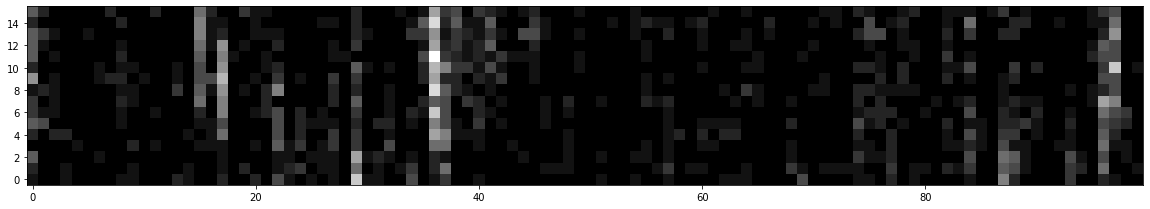

In [11]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 100, :]), origin='lower', cmap='gray')

### Split into train test sets

In [12]:
len_units = np.shape(resp_mne)[1]

In [13]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process.npy'))

In [14]:
exp_path = '/mnt/cube/srrudrar/temporal_cnn_model/stim_resp_16x16_256/'

In [15]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 256
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.078497
    2       0    0.075775
    3       0    0.073314
    4       0    0.072201
    5       0    0.069942
    6       0    0.068485
    7       0    0.067525
    8       0    0.066923
    9       0    0.066643
   10       0    0.066036
   11       0    0.065565
   12       0    0.064987
   13       0    0.064913
   14       0    0.064771
   15       0    0.064455
   16       0    0.064193
   17       0    0.063907
   18       0    0.063709
   19       0    0.063617
   20       0    0.063247
   21       0    0.063019
   22       0    0.062951
   23       0    0.063014
   24       1    0.062817
   25       0    0.062593
   26       0    0.062509
   27       0    0.062485
   28       0    0.062531
   29       1    0.062640
   30       2    0.062329
   31       0    0.062246
   32       0    0.062383
   33       1    0.062316
   34       2    0.062159
   35       0    0.062154
   36       0    0.062166
   37       1    0.062151
   38       

    2       0    0.098600
    3       0    0.095099
    4       0    0.093030
    5       0    0.090103
    6       0    0.089227
    7       0    0.086964
    8       0    0.085327
    9       0    0.083939
   10       0    0.083828
   11       0    0.083170
   12       0    0.082378
   13       0    0.082037
   14       0    0.081587
   15       0    0.081088
   16       0    0.080838
   17       0    0.079549
   18       0    0.078968
   19       0    0.078544
   20       0    0.078283
   21       0    0.077734
   22       0    0.077645
   23       0    0.077579
   24       0    0.077219
   25       0    0.077108
   26       0    0.077082
   27       0    0.076787
   28       0    0.076731
   29       0    0.076687
   30       0    0.076633
   31       0    0.076562
   32       0    0.076400
   33       0    0.076213
   34       0    0.076193
   35       0    0.076148
   36       0    0.075586
   37       0    0.075637
   38       1    0.075743
   39       2    0.075288
   40       

   61       1    0.057199
   62       0    0.057205
   63       1    0.057190
   64       0    0.057256
   65       1    0.057310
   66       2    0.057283
   67       3    0.057225
   68       4    0.057397
   69       5    0.057698
   70       6    0.057658
   71       7    0.057563
   72       8    0.057542
   73       9    0.057566
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.074349
    2       0    0.071087
    3       0    0.070047
    4       0    0.068359
    5       0    0.066920
    6       0    0.065886
    7       0    0.065429
    8       0    0.064896
    9       0    0.064511
   10       0    0.064500
   11       0    0.064063
   12       0    0.063802
   13       0    0.063567
   14       0    0.063456
   15       0    0.063345
   16       0    0.063225
   17       0    0.063087
   18       0    0.063012
   19       0    0.062804
   20       0    0.062393
   21       0    0.062458
   22       1    0.062444
   23       2    0.062306
   24       

    8       0    0.084473
    9       0    0.083660
   10       0    0.083246
   11       0    0.083036
   12       0    0.082019
   13       0    0.081642
   14       0    0.081468
   15       0    0.081117
   16       0    0.080719
   17       0    0.080568
   18       0    0.080366
   19       0    0.080015
   20       0    0.079722
   21       0    0.079543
   22       0    0.079277
   23       0    0.078980
   24       0    0.079022
   25       1    0.079041
   26       2    0.078465
   27       0    0.078413
   28       0    0.078209
   29       0    0.078117
   30       0    0.078112
   31       0    0.078135
   32       1    0.077993
   33       0    0.077733
   34       0    0.077748
   35       1    0.077775
   36       2    0.077458
   37       0    0.077395
   38       0    0.077366
   39       0    0.077390
   40       1    0.077383
   41       2    0.077328
   42       0    0.077342
   43       1    0.077345
   44       2    0.077283
   45       0    0.077261
   46       

   62       3    0.122570
   63       4    0.122527
   64       0    0.122526
   65       0    0.122547
   66       1    0.122578
   67       2    0.122547
   68       3    0.122535
   69       4    0.122535
   70       5    0.122531
   71       6    0.122551
   72       7    0.122540
   73       8    0.122547
   74       9    0.122576
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.142194
    2       0    0.138984
    3       0    0.136277
    4       0    0.134331
    5       0    0.133052
    6       0    0.131651
    7       0    0.130016
    8       0    0.129074
    9       0    0.128057
   10       0    0.127291
   11       0    0.126763
   12       0    0.126315
   13       0    0.125501
   14       0    0.125072
   15       0    0.124738
   16       0    0.124218
   17       0    0.124046
   18       0    0.123760
   19       0    0.123591
   20       0    0.123161
   21       0    0.122818
   22       0    0.122780
   23       0    0.122635
   24       

    4       0    0.036648
    5       0    0.036550
    6       0    0.035663
    7       0    0.035123
    8       0    0.034637
    9       0    0.034510
   10       0    0.034275
   11       0    0.034162
   12       0    0.033968
   13       0    0.033863
   14       0    0.033598
   15       0    0.033593
   16       0    0.033503
   17       0    0.033414
   18       0    0.033301
   19       0    0.033211
   20       0    0.033133
   21       0    0.033019
   22       0    0.033193
   23       1    0.033003
   24       0    0.033011
   25       1    0.032919
   26       0    0.032864
   27       0    0.032742
   28       0    0.032711
   29       0    0.032791
   30       1    0.032775
   31       2    0.032799
   32       3    0.032802
   33       4    0.032733
   34       5    0.032734
   35       6    0.032852
   36       7    0.032784
   37       8    0.032731
   38       9    0.032697
   39       0    0.032657
   40       0    0.032649
   41       0    0.032704
   42       

   19       0    0.050413
   20       1    0.050400
   21       0    0.050321
   22       0    0.050260
   23       0    0.050208
   24       0    0.050144
   25       0    0.050109
   26       0    0.050030
   27       0    0.049986
   28       0    0.049971
   29       0    0.050035
   30       1    0.049889
   31       0    0.049825
   32       0    0.049763
   33       0    0.049704
   34       0    0.049823
   35       1    0.049942
   36       2    0.049677
   37       0    0.049586
   38       0    0.049569
   39       0    0.049576
   40       1    0.049558
   41       0    0.049528
   42       0    0.049554
   43       1    0.049549
   44       2    0.049469
   45       0    0.049586
   46       1    0.049630
   47       2    0.049729
   48       3    0.049618
   49       4    0.049543
   50       5    0.049505
   51       6    0.049488
   52       7    0.049505
   53       8    0.049520
   54       9    0.049494
minimum of test set found
Iters   tally   ll(test) 
    1       

    5       0    0.098883
    6       0    0.097269
    7       0    0.096709
    8       0    0.096230
    9       0    0.095668
   10       0    0.095052
   11       0    0.094429
   12       0    0.094035
   13       0    0.093737
   14       0    0.093585
   15       0    0.093379
   16       0    0.093235
   17       0    0.093116
   18       0    0.092964
   19       0    0.092685
   20       0    0.092559
   21       0    0.092536
   22       0    0.092309
   23       0    0.092177
   24       0    0.092147
   25       0    0.091908
   26       0    0.091888
   27       0    0.091861
   28       0    0.091658
   29       0    0.091191
   30       0    0.091025
   31       0    0.090960
   32       0    0.090854
   33       0    0.090755
   34       0    0.090712
   35       0    0.090723
   36       1    0.090722
   37       2    0.090704
   38       0    0.090609
   39       0    0.090542
   40       0    0.090520
   41       0    0.090454
   42       0    0.090418
   43       

Iters   tally   ll(test) 
    1       0    0.098916
    2       0    0.095437
    3       0    0.093935
    4       0    0.092408
    5       0    0.091401
    6       0    0.090748
    7       0    0.090158
    8       0    0.089430
    9       0    0.088697
   10       0    0.088403
   11       0    0.088166
   12       0    0.087950
   13       0    0.087796
   14       0    0.087531
   15       0    0.087390
   16       0    0.087209
   17       0    0.086959
   18       0    0.086752
   19       0    0.086357
   20       0    0.086229
   21       0    0.086165
   22       0    0.086243
   23       1    0.085923
   24       0    0.085877
   25       0    0.085850
   26       0    0.085855
   27       1    0.085778
   28       0    0.085766
   29       0    0.085739
   30       0    0.085703
   31       0    0.085601
   32       0    0.085495
   33       0    0.085483
   34       0    0.085457
   35       0    0.085476
   36       1    0.085326
   37       0    0.085444
   38       

   50       0    0.210030
   51       0    0.209969
   52       0    0.209935
   53       0    0.209851
   54       0    0.209655
   55       0    0.209414
   56       0    0.209378
   57       0    0.209363
   58       0    0.209316
   59       0    0.209287
   60       0    0.209355
   61       1    0.209349
   62       2    0.209311
   63       3    0.209213
   64       0    0.209147
   65       0    0.209115
   66       0    0.209021
   67       0    0.208961
   68       0    0.208969
   69       1    0.209068
   70       2    0.209217
   71       3    0.209371
   72       4    0.209545
   73       5    0.209954
   74       6    0.209824
   75       7    0.209523
   76       8    0.209265
   77       9    0.209192
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.253618
    2       0    0.247880
    3       0    0.244209
    4       0    0.239649
    5       0    0.237522
    6       0    0.235891
    7       0    0.233833
    8       0    0.230088
    9       

   23       0    0.078325
   24       0    0.078054
   25       0    0.077905
   26       0    0.077795
   27       0    0.077676
   28       0    0.077582
   29       0    0.077559
   30       0    0.077600
   31       1    0.077595
   32       2    0.077570
   33       3    0.077519
   34       0    0.077551
   35       1    0.077503
   36       0    0.077580
   37       1    0.077619
   38       2    0.077342
   39       0    0.077136
   40       0    0.077128
   41       0    0.077096
   42       0    0.077023
   43       0    0.076921
   44       0    0.077121
   45       1    0.077128
   46       2    0.077072
   47       3    0.077130
   48       4    0.077463
   49       5    0.077759
   50       6    0.077558
   51       7    0.077508
   52       8    0.077595
   53       9    0.077491
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.021082
    2       0    0.020404
    3       0    0.019848
    4       0    0.019560
    5       0    0.019558
    6       

   53       7    0.102849
   54       8    0.102789
   55       9    0.102783
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.114791
    2       0    0.111500
    3       0    0.109538
    4       0    0.107810
    5       0    0.107135
    6       0    0.105806
    7       0    0.105385
    8       0    0.105011
    9       0    0.104537
   10       0    0.104148
   11       0    0.103936
   12       0    0.103678
   13       0    0.103607
   14       0    0.103454
   15       0    0.103474
   16       1    0.103092
   17       0    0.102951
   18       0    0.102768
   19       0    0.102676
   20       0    0.102650
   21       0    0.102597
   22       0    0.102560
   23       0    0.102526
   24       0    0.102481
   25       0    0.102456
   26       0    0.102376
   27       0    0.102295
   28       0    0.102287
   29       0    0.102279
   30       0    0.102255
   31       0    0.102207
   32       0    0.102122
   33       0    0.101974
   34       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.545440
    2       0    0.539193
    3       0    0.536338
    4       0    0.533164
    5       0    0.532326
    6       0    0.529664
    7       0    0.528580
    8       0    0.527050
    9       0    0.526744
   10       0    0.525604
   11       0    0.525269
   12       0    0.524449
   13       0    0.524139
   14       0    0.523637
   15       0    0.523374
   16       0    0.522958
   17       0    0.522726
   18       0    0.522509
   19       0    0.522331
   20       0    0.522104
   21       0    0.521999
   22       0    0.521734
   23       0    0.521704
   24       0    0.521684
   25       0    0.521263
   26       0    0.521123
   27       0    0.520956
   28       0    0.520939
   29       0    0.520859
   30       0    0.520787
   31       0    0.520756
   32       0    0.520751
   33       0    0.520734
   34       0    0.520598
   35       0    0.520602
   36       1    0.520595
   37       0    0.520537
   38       0    0.520537
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.546576
    2       0    0.540297
    3       0    0.537293
    4       0    0.534775
    5       0    0.533614
    6       0    0.531602
    7       0    0.530468
    8       0    0.529670
    9       0    0.529323
   10       0    0.528450
   11       0    0.527837
   12       0    0.527052
   13       0    0.526866
   14       0    0.526408
   15       0    0.525931
   16       0    0.525861
   17       0    0.525611
   18       0    0.525390
   19       0    0.525167
   20       0    0.525139
   21       0    0.525177
   22       1    0.524687
   23       0    0.524516
   24       0    0.524429
   25       0    0.524368
   26       0    0.524167
   27       0    0.524252
   28       1    0.524300
   29       2    0.524039
   30       0    0.523921
   31       0    0.523888
   32       0    0.523890
   33       1    0.523855
   34       0    0.523781
   35       0    0.523720
   36       0    0.523728
   37       1    0.523715
   38       0    0.523675
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.545287
    2       0    0.539456
    3       0    0.536540
    4       0    0.533832
    5       0    0.532913
    6       0    0.531198
    7       0    0.530796
    8       0    0.529979
    9       0    0.529531
   10       0    0.529024
   11       0    0.528730
   12       0    0.528281
   13       0    0.527712
   14       0    0.527065
   15       0    0.526946
   16       0    0.526678
   17       0    0.526109
   18       0    0.525131
   19       0    0.524985
   20       0    0.524976
   21       0    0.524766
   22       0    0.524644
   23       0    0.524194
   24       0    0.523816
   25       0    0.523259
   26       0    0.523421
   27       1    0.523599
   28       2    0.522856
   29       0    0.522756
   30       0    0.522774
   31       1    0.522713
   32       0    0.522654
   33       0    0.522601
   34       0    0.522436
   35       0    0.522482
   36       1    0.522381
   37       0    0.522101
   38       0    0.522099
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.547151
    2       0    0.540436
    3       0    0.537924
    4       0    0.535640
    5       0    0.534775
    6       0    0.531968
    7       0    0.530776
    8       0    0.529306
    9       0    0.528982
   10       0    0.528384
   11       0    0.527948
   12       0    0.527053
   13       0    0.526564
   14       0    0.525937
   15       0    0.525681
   16       0    0.525473
   17       0    0.525359
   18       0    0.525234
   19       0    0.524986
   20       0    0.524816
   21       0    0.524752
   22       0    0.524707
   23       0    0.524666
   24       0    0.524601
   25       0    0.524545
   26       0    0.524340
   27       0    0.524309
   28       0    0.524223
   29       0    0.523588
   30       0    0.523408
   31       0    0.523191
   32       0    0.523054
   33       0    0.522967
   34       0    0.522922
   35       0    0.522876
   36       0    0.522880
   37       1    0.522869
   38       0    0.522797
   39       

   33       0    0.499251
   34       0    0.499045
   35       0    0.498730
   36       0    0.498530
   37       0    0.498532
   38       1    0.498464
   39       0    0.498334
   40       0    0.498325
   41       0    0.498114
   42       0    0.498073
   43       0    0.497954
   44       0    0.497852
   45       0    0.497775
   46       0    0.497701
   47       0    0.497575
   48       0    0.497546
   49       0    0.497541
   50       0    0.497526
   51       0    0.497496
   52       0    0.497490
   53       0    0.497475
   54       0    0.497423
   55       0    0.497398
   56       0    0.497383
   57       0    0.497407
   58       1    0.497406
   59       2    0.497233
   60       0    0.497265
   61       1    0.497546
   62       2    0.498342
   63       3    0.499438
   64       4    0.500069
   65       5    0.500987
   66       6    0.501311
   67       7    0.501224
   68       8    0.501202
   69       9    0.501178
minimum of test set found
Iters   tall

   27       1    0.101682
   28       2    0.101705
   29       3    0.101253
   30       0    0.100975
   31       0    0.100821
   32       0    0.101033
   33       1    0.100988
   34       2    0.100885
   35       3    0.100821
   36       4    0.100692
   37       0    0.100606
   38       0    0.100527
   39       0    0.100519
   40       0    0.100526
   41       1    0.100325
   42       0    0.100232
   43       0    0.100208
   44       0    0.100106
   45       0    0.099935
   46       0    0.099875
   47       0    0.099874
   48       0    0.099883
   49       1    0.099723
   50       0    0.099694
   51       0    0.099731
   52       1    0.099750
   53       2    0.099705
   54       3    0.099691
   55       0    0.099723
   56       1    0.099790
   57       2    0.099797
   58       3    0.099632
   59       0    0.099595
   60       0    0.099612
   61       1    0.099666
   62       2    0.099663
   63       3    0.099590
   64       0    0.099596
   65       

   50       5    0.163941
   51       6    0.163940
   52       7    0.163800
   53       0    0.163836
   54       1    0.163867
   55       2    0.163793
   56       0    0.163793
   57       1    0.164017
   58       2    0.164300
   59       3    0.164125
   60       4    0.163994
   61       5    0.163859
   62       6    0.163839
   63       7    0.163890
   64       8    0.163919
   65       9    0.164054
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.379273
    2       0    0.376521
    3       0    0.373722
    4       0    0.371121
    5       0    0.369830
    6       0    0.367457
    7       0    0.365049
    8       0    0.364151
    9       0    0.362385
   10       0    0.362001
   11       0    0.360888
   12       0    0.359876
   13       0    0.359394
   14       0    0.358590
   15       0    0.358195
   16       0    0.357945
   17       0    0.357395
   18       0    0.356594
   19       0    0.356434
   20       0    0.356103
   21       

   32       0    0.355098
   33       0    0.355327
   34       1    0.355218
   35       2    0.355091
   36       0    0.355069
   37       0    0.354934
   38       0    0.354775
   39       0    0.354501
   40       0    0.354510
   41       1    0.354490
   42       0    0.354426
   43       0    0.354364
   44       0    0.354444
   45       1    0.354457
   46       2    0.354315
   47       0    0.354314
   48       0    0.354399
   49       1    0.354435
   50       2    0.354144
   51       0    0.354096
   52       0    0.354124
   53       1    0.354069
   54       0    0.354147
   55       1    0.354081
   56       2    0.354013
   57       0    0.353895
   58       0    0.353902
   59       1    0.353888
   60       0    0.353850
   61       0    0.353829
   62       0    0.353865
   63       1    0.353961
   64       2    0.353977
   65       3    0.353940
   66       4    0.354049
   67       5    0.353940
   68       6    0.353911
   69       7    0.353844
   70       

   47       0    0.164576
   48       0    0.164548
   49       0    0.164520
   50       0    0.164457
   51       0    0.164431
   52       0    0.164460
   53       1    0.164425
   54       0    0.164433
   55       1    0.164392
   56       0    0.164379
   57       0    0.164390
   58       1    0.164354
   59       0    0.164301
   60       0    0.164336
   61       1    0.164337
   62       2    0.164396
   63       3    0.164542
   64       4    0.164653
   65       5    0.164690
   66       6    0.164610
   67       7    0.164506
   68       8    0.164332
   69       9    0.164262
   70       0    0.164226
   71       0    0.164249
   72       1    0.164236
   73       2    0.164226
   74       0    0.164264
   75       1    0.164287
   76       2    0.164250
   77       3    0.164230
   78       4    0.164233
   79       5    0.164235
   80       6    0.164247
   81       7    0.164245
   82       8    0.164364
   83       9    0.164384
minimum of test set found
Iters   tall

Iters   tally   ll(test) 
    1       0    0.037123
    2       0    0.035446
    3       0    0.034216
    4       0    0.033523
    5       0    0.034547
    6       1    0.033112
    7       0    0.032363
    8       0    0.031797
    9       0    0.032445
   10       1    0.033004
   11       2    0.032529
   12       3    0.033472
   13       4    0.034789
   14       5    0.035051
   15       6    0.036456
   16       7    0.037791
   17       8    0.037847
   18       9    0.037310
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.044186
    2       0    0.042958
    3       0    0.040891
    4       0    0.043259
    5       1    0.043065
    6       2    0.040744
    7       0    0.039856
    8       0    0.039420
    9       0    0.038799
   10       0    0.038502
   11       0    0.038574
   12       1    0.038582
   13       2    0.038495
   14       0    0.038461
   15       0    0.039053
   16       1    0.040437
   17       2    0.041078
   18       

   35       0    0.497324
   36       0    0.497263
   37       0    0.497255
   38       0    0.497121
   39       0    0.497013
   40       0    0.497098
   41       1    0.497074
   42       2    0.497173
   43       3    0.496902
   44       0    0.496897
   45       0    0.496734
   46       0    0.496815
   47       1    0.496730
   48       0    0.496428
   49       0    0.496383
   50       0    0.496298
   51       0    0.496297
   52       0    0.496347
   53       1    0.496460
   54       2    0.496388
   55       3    0.496400
   56       4    0.496419
   57       5    0.496372
   58       6    0.496310
   59       7    0.496315
   60       8    0.496256
   61       0    0.496280
   62       1    0.496308
   63       2    0.496268
   64       3    0.496255
   65       0    0.496256
   66       1    0.496224
   67       0    0.496320
   68       1    0.496398
   69       2    0.496371
   70       3    0.496414
   71       4    0.496662
   72       5    0.497099
   73       

   19       0    0.084110
   20       0    0.083979
   21       0    0.083889
   22       0    0.083877
   23       0    0.083863
   24       0    0.083776
   25       0    0.083773
   26       0    0.083711
   27       0    0.083707
   28       0    0.083696
   29       0    0.083456
   30       0    0.083512
   31       1    0.083549
   32       2    0.083471
   33       3    0.083358
   34       0    0.083479
   35       1    0.083540
   36       2    0.083663
   37       3    0.083721
   38       4    0.083640
   39       5    0.083773
   40       6    0.083805
   41       7    0.083691
   42       8    0.083697
   43       9    0.083718
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.100446
    2       0    0.097995
    3       0    0.096077
    4       0    0.094235
    5       0    0.093168
    6       0    0.092952
    7       0    0.091804
    8       0    0.091117
    9       0    0.090690
   10       0    0.090376
   11       0    0.090152
   12       

   41       1    0.024923
   42       2    0.024957
   43       3    0.025009
   44       4    0.024987
   45       5    0.024900
   46       0    0.024880
   47       0    0.024863
   48       0    0.024870
   49       1    0.024842
   50       0    0.024805
   51       0    0.024844
   52       1    0.024880
   53       2    0.024852
   54       3    0.024840
   55       4    0.024817
   56       5    0.024813
   57       6    0.024835
   58       7    0.024827
   59       8    0.024791
   60       0    0.024815
   61       1    0.024832
   62       2    0.024819
   63       3    0.024827
   64       4    0.024818
   65       5    0.024801
   66       6    0.024839
   67       7    0.024851
   68       8    0.024827
   69       9    0.024823
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.029044
    2       0    0.028344
    3       0    0.027552
    4       0    0.027191
    5       0    0.026782
    6       0    0.026502
    7       0    0.026361
    8       

Iters   tally   ll(test) 
    1       0    0.222559
    2       0    0.217664
    3       0    0.212570
    4       0    0.210993
    5       0    0.208653
    6       0    0.207225
    7       0    0.206256
    8       0    0.205077
    9       0    0.204414
   10       0    0.203851
   11       0    0.203636
   12       0    0.203291
   13       0    0.203295
   14       1    0.203075
   15       0    0.202329
   16       0    0.202082
   17       0    0.201992
   18       0    0.200846
   19       0    0.200563
   20       0    0.200227
   21       0    0.199425
   22       0    0.199493
   23       1    0.199446
   24       2    0.199207
   25       0    0.198974
   26       0    0.198824
   27       0    0.198742
   28       0    0.198718
   29       0    0.198567
   30       0    0.198432
   31       0    0.198205
   32       0    0.198160
   33       0    0.198182
   34       1    0.198059
   35       0    0.197919
   36       0    0.197918
   37       0    0.198027
   38       

   20       0    0.169916
   21       0    0.169673
   22       0    0.169499
   23       0    0.169453
   24       0    0.169340
   25       0    0.169195
   26       0    0.168794
   27       0    0.168670
   28       0    0.168478
   29       0    0.168399
   30       0    0.168405
   31       1    0.168387
   32       0    0.168258
   33       0    0.168243
   34       0    0.168259
   35       1    0.168167
   36       0    0.168078
   37       0    0.168027
   38       0    0.168141
   39       1    0.168261
   40       2    0.168306
   41       3    0.168038
   42       4    0.168005
   43       0    0.167939
   44       0    0.167897
   45       0    0.167906
   46       1    0.167845
   47       0    0.167756
   48       0    0.167745
   49       0    0.167694
   50       0    0.167676
   51       0    0.167702
   52       1    0.167714
   53       2    0.167700
   54       3    0.167694
   55       4    0.167730
   56       5    0.167801
   57       6    0.167768
   58       

   44       1    0.288136
   45       2    0.288110
   46       3    0.288123
   47       4    0.288089
   48       0    0.288065
   49       0    0.287974
   50       0    0.287911
   51       0    0.287884
   52       0    0.287875
   53       0    0.287908
   54       1    0.287960
   55       2    0.287935
   56       3    0.287850
   57       0    0.287755
   58       0    0.287716
   59       0    0.287675
   60       0    0.287657
   61       0    0.287720
   62       1    0.287795
   63       2    0.287824
   64       3    0.287812
   65       4    0.287856
   66       5    0.287864
   67       6    0.287884
   68       7    0.287819
   69       8    0.287810
   70       9    0.287805
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.315849
    2       0    0.311842
    3       0    0.307037
    4       0    0.302682
    5       0    0.301195
    6       0    0.298995
    7       0    0.297829
    8       0    0.296173
    9       0    0.295500
   10       0    0.295252
   11       0    0.295425
   12       1    0.293762
   13       0    0.293019
   14       0    0.292380
   15       0    0.292420
   16       1    0.291740
   17       0    0.291150
   18       0    0.290991
   19       0    0.290912
   20       0    0.290637
   21       0    0.290346
   22       0    0.290273
   23       0    0.290092
   24       0    0.289919
   25       0    0.289860
   26       0    0.289682
   27       0    0.289405
   28       0    0.289294
   29       0    0.289204
   30       0    0.289143
   31       0    0.289050
   32       0    0.289001
   33       0    0.289006
   34       1    0.288999
   35       0    0.288897
   36       0    0.288861
   37       0    0.288856
   38       0    0.288797
   39       

   33       0    0.038463
   34       0    0.038450
   35       0    0.038380
   36       0    0.038335
   37       0    0.038322
   38       0    0.038239
   39       0    0.038237
   40       0    0.038248
   41       1    0.038252
   42       2    0.038232
   43       0    0.038231
   44       0    0.038228
   45       0    0.038243
   46       1    0.038221
   47       0    0.038182
   48       0    0.038153
   49       0    0.038142
   50       0    0.038128
   51       0    0.038137
   52       1    0.038131
   53       2    0.038085
   54       0    0.038059
   55       0    0.038071
   56       1    0.038054
   57       0    0.038029
   58       0    0.038045
   59       1    0.038066
   60       2    0.038063
   61       3    0.038067
   62       4    0.038057
   63       5    0.038041
   64       6    0.038053
   65       7    0.038031
   66       8    0.038026
   67       0    0.038022
   68       0    0.038017
   69       0    0.037992
   70       0    0.037981
   71       

    9       0    0.085361
   10       0    0.084910
   11       0    0.084558
   12       0    0.084353
   13       0    0.084269
   14       0    0.084065
   15       0    0.084057
   16       0    0.083852
   17       0    0.083592
   18       0    0.083260
   19       0    0.083287
   20       1    0.083207
   21       0    0.083087
   22       0    0.082922
   23       0    0.083005
   24       1    0.082950
   25       2    0.082804
   26       0    0.082759
   27       0    0.082693
   28       0    0.082727
   29       1    0.082661
   30       0    0.082634
   31       0    0.082600
   32       0    0.082543
   33       0    0.082567
   34       1    0.082519
   35       0    0.082434
   36       0    0.082449
   37       1    0.082443
   38       2    0.082424
   39       0    0.082474
   40       1    0.082489
   41       2    0.082421
   42       0    0.082370
   43       0    0.082393
   44       1    0.082394
   45       2    0.082392
   46       3    0.082404
   47       

   16       0    0.086205
   17       1    0.085660
   18       0    0.085522
   19       0    0.085455
   20       0    0.085369
   21       0    0.085246
   22       0    0.085241
   23       0    0.085295
   24       1    0.085211
   25       0    0.085187
   26       0    0.085188
   27       1    0.085284
   28       2    0.085266
   29       3    0.085218
   30       4    0.084945
   31       0    0.084817
   32       0    0.084768
   33       0    0.084749
   34       0    0.084788
   35       1    0.084765
   36       2    0.084777
   37       3    0.084772
   38       4    0.084690
   39       0    0.084651
   40       0    0.084655
   41       1    0.084676
   42       2    0.085057
   43       3    0.085196
   44       4    0.085190
   45       5    0.085251
   46       6    0.085202
   47       7    0.085228
   48       8    0.085292
   49       9    0.085192
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.101533
    2       0    0.098497
    3       

   42       0    0.138924
   43       0    0.138896
   44       0    0.138909
   45       1    0.138866
   46       0    0.138828
   47       0    0.138839
   48       1    0.138842
   49       2    0.138853
   50       3    0.138973
   51       4    0.139086
   52       5    0.139008
   53       6    0.138909
   54       7    0.138845
   55       8    0.138812
   56       0    0.138831
   57       1    0.138786
   58       0    0.138787
   59       1    0.138819
   60       2    0.138866
   61       3    0.138872
   62       4    0.138832
   63       5    0.138877
   64       6    0.138858
   65       7    0.138851
   66       8    0.138826
   67       9    0.138809
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.516085
    2       0    0.513351
    3       0    0.502159
    4       0    0.497037
    5       0    0.491693
    6       0    0.489200
    7       0    0.487282
    8       0    0.486010
    9       0    0.483873
   10       0    0.480700
   11       0    0.479288
   12       0    0.477998
   13       0    0.477030
   14       0    0.476485
   15       0    0.475788
   16       0    0.475077
   17       0    0.474300
   18       0    0.473786
   19       0    0.473306
   20       0    0.472623
   21       0    0.472501
   22       0    0.472219
   23       0    0.471923
   24       0    0.471883
   25       0    0.471667
   26       0    0.471518
   27       0    0.471436
   28       0    0.471096
   29       0    0.470887
   30       0    0.470781
   31       0    0.470738
   32       0    0.470579
   33       0    0.470576
   34       0    0.470499
   35       0    0.470283
   36       0    0.470348
   37       1    0.470091
   38       0    0.469929
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.517542
    2       0    0.514617
    3       0    0.500224
    4       0    0.497615
    5       0    0.492728
    6       0    0.490646
    7       0    0.487630
    8       0    0.484596
    9       0    0.482248
   10       0    0.481852
   11       0    0.479877
   12       0    0.478408
   13       0    0.477759
   14       0    0.476908
   15       0    0.475925
   16       0    0.475375
   17       0    0.474975
   18       0    0.475017
   19       1    0.474443
   20       0    0.473765
   21       0    0.473597
   22       0    0.473555
   23       0    0.473042
   24       0    0.472975
   25       0    0.472796
   26       0    0.472469
   27       0    0.472261
   28       0    0.472074
   29       0    0.472043
   30       0    0.471790
   31       0    0.471693
   32       0    0.471540
   33       0    0.471135
   34       0    0.471307
   35       1    0.470982
   36       0    0.471050
   37       1    0.470760
   38       0    0.470632
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.511044
    2       0    0.507702
    3       0    0.495782
    4       0    0.494476
    5       0    0.488278
    6       0    0.486271
    7       0    0.483448
    8       0    0.480484
    9       0    0.479363
   10       0    0.478533
   11       0    0.475714
   12       0    0.474546
   13       0    0.473718
   14       0    0.472806
   15       0    0.472234
   16       0    0.472029
   17       0    0.471066
   18       0    0.470682
   19       0    0.470245
   20       0    0.469417
   21       0    0.468912
   22       0    0.468587
   23       0    0.468223
   24       0    0.468074
   25       0    0.467904
   26       0    0.467882
   27       0    0.467874
   28       0    0.467573
   29       0    0.467342
   30       0    0.467740
   31       1    0.467632
   32       2    0.466923
   33       0    0.466672
   34       0    0.466395
   35       0    0.466047
   36       0    0.466026
   37       0    0.465977
   38       0    0.465934
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.516708
    2       0    0.514073
    3       0    0.503184
    4       0    0.497419
    5       0    0.491558
    6       0    0.489217
    7       0    0.487210
    8       0    0.485339
    9       0    0.483730
   10       0    0.482678
   11       0    0.480513
   12       0    0.479603
   13       0    0.479359
   14       0    0.479043
   15       0    0.478039
   16       0    0.477613
   17       0    0.476545
   18       0    0.475840
   19       0    0.474954
   20       0    0.474814
   21       0    0.474650
   22       0    0.474585
   23       0    0.474290
   24       0    0.473843
   25       0    0.473305
   26       0    0.472792
   27       0    0.472519
   28       0    0.472767
   29       1    0.473206
   30       2    0.472658
   31       3    0.472619
   32       4    0.472600
   33       5    0.472722
   34       6    0.472465
   35       0    0.472241
   36       0    0.471938
   37       0    0.471879
   38       0    0.471969
   39       

   54       0    0.108798
   55       1    0.108779
   56       2    0.108897
   57       3    0.108947
   58       4    0.108919
   59       5    0.109161
   60       6    0.109179
   61       7    0.109436
   62       8    0.109573
   63       9    0.109484
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.085768
    2       0    0.084224
    3       0    0.083551
    4       0    0.081490
    5       0    0.080062
    6       0    0.079048
    7       0    0.078601
    8       0    0.077904
    9       0    0.077214
   10       0    0.076813
   11       0    0.076299
   12       0    0.075963
   13       0    0.075790
   14       0    0.075634
   15       0    0.075356
   16       0    0.075229
   17       0    0.075179
   18       0    0.075089
   19       0    0.074992
   20       0    0.074856
   21       0    0.074695
   22       0    0.074784
   23       1    0.074684
   24       0    0.075078
   25       1    0.075137
   26       2    0.074796
   27       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.632334
    2       0    0.626806
    3       0    0.624394
    4       0    0.622035
    5       0    0.620083
    6       0    0.618764
    7       0    0.617822
    8       0    0.617166
    9       0    0.615803
   10       0    0.614976
   11       0    0.614906
   12       0    0.614868
   13       0    0.614058
   14       0    0.613597
   15       0    0.613336
   16       0    0.612830
   17       0    0.612705
   18       0    0.612548
   19       0    0.612256
   20       0    0.611882
   21       0    0.611850
   22       0    0.611383
   23       0    0.611380
   24       0    0.611556
   25       1    0.611136
   26       0    0.610982
   27       0    0.610653
   28       0    0.610796
   29       1    0.610637
   30       0    0.610496
   31       0    0.610367
   32       0    0.610353
   33       0    0.610324
   34       0    0.610115
   35       0    0.610107
   36       0    0.609917
   37       0    0.609650
   38       0    0.609654
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.631940
    2       0    0.626855
    3       0    0.624352
    4       0    0.621480
    5       0    0.620493
    6       0    0.620424
    7       0    0.617587
    8       0    0.616993
    9       0    0.616024
   10       0    0.615674
   11       0    0.615333
   12       0    0.614947
   13       0    0.613932
   14       0    0.612701
   15       0    0.612364
   16       0    0.612040
   17       0    0.611817
   18       0    0.611619
   19       0    0.611393
   20       0    0.611167
   21       0    0.610992
   22       0    0.610923
   23       0    0.610594
   24       0    0.610529
   25       0    0.610322
   26       0    0.609858
   27       0    0.609627
   28       0    0.609568
   29       0    0.609504
   30       0    0.609364
   31       0    0.609294
   32       0    0.609262
   33       0    0.609207
   34       0    0.609184
   35       0    0.609232
   36       1    0.609175
   37       0    0.609100
   38       0    0.609029
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.629525
    2       0    0.624373
    3       0    0.621776
    4       0    0.618566
    5       0    0.616988
    6       0    0.615040
    7       0    0.614454
    8       0    0.613339
    9       0    0.612720
   10       0    0.611992
   11       0    0.611586
   12       0    0.611007
   13       0    0.610643
   14       0    0.609732
   15       0    0.609342
   16       0    0.609314
   17       0    0.609332
   18       1    0.608807
   19       0    0.608449
   20       0    0.608313
   21       0    0.608160
   22       0    0.608098
   23       0    0.608052
   24       0    0.607861
   25       0    0.607724
   26       0    0.607694
   27       0    0.607594
   28       0    0.607540
   29       0    0.607514
   30       0    0.607500
   31       0    0.607341
   32       0    0.607235
   33       0    0.607118
   34       0    0.606990
   35       0    0.606948
   36       0    0.606889
   37       0    0.606846
   38       0    0.606787
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.629953
    2       0    0.625259
    3       0    0.622508
    4       0    0.619234
    5       0    0.618228
    6       0    0.616923
    7       0    0.615591
    8       0    0.614949
    9       0    0.614059
   10       0    0.613755
   11       0    0.612953
   12       0    0.612599
   13       0    0.611903
   14       0    0.611281
   15       0    0.610907
   16       0    0.610665
   17       0    0.610323
   18       0    0.610085
   19       0    0.609974
   20       0    0.609464
   21       0    0.609284
   22       0    0.608911
   23       0    0.608770
   24       0    0.608414
   25       0    0.608264
   26       0    0.608065
   27       0    0.607989
   28       0    0.607914
   29       0    0.607877
   30       0    0.607868
   31       0    0.607823
   32       0    0.607761
   33       0    0.607709
   34       0    0.607658
   35       0    0.607662
   36       1    0.607774
   37       2    0.607691
   38       3    0.607459
   39       

   52       5    0.056427
   53       6    0.056442
   54       7    0.056392
   55       8    0.056369
   56       9    0.056366
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.534440
    2       0    0.530252
    3       0    0.519914
    4       0    0.511416
    5       0    0.507148
    6       0    0.504942
    7       0    0.502670
    8       0    0.499867
    9       0    0.498948
   10       0    0.497195
   11       0    0.496016
   12       0    0.494023
   13       0    0.493333
   14       0    0.492805
   15       0    0.491995
   16       0    0.491328
   17       0    0.490590
   18       0    0.489911
   19       0    0.489250
   20       0    0.489159
   21       0    0.488632
   22       0    0.488390
   23       0    0.488282
   24       0    0.488097
   25       0    0.487666
   26       0    0.487428
   27       0    0.487333
   28       0    0.487207
   29       0    0.487063
   30       0    0.486726
   31       0    0.486564
   32       0    0.486357
   33       0    0.486109
   34       0    0.486060
   35       0    0.485935
   36       0    0.485862
   37       0    0.485788
   38       0    0.485755
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.537716
    2       0    0.532063
    3       0    0.521695
    4       0    0.513160
    5       0    0.508564
    6       0    0.507288
    7       0    0.504985
    8       0    0.502600
    9       0    0.501415
   10       0    0.499917
   11       0    0.497921
   12       0    0.497348
   13       0    0.496851
   14       0    0.495489
   15       0    0.494206
   16       0    0.493020
   17       0    0.492769
   18       0    0.491956
   19       0    0.491392
   20       0    0.491234
   21       0    0.490895
   22       0    0.490700
   23       0    0.490428
   24       0    0.490249
   25       0    0.490014
   26       0    0.489829
   27       0    0.489423
   28       0    0.488981
   29       0    0.488606
   30       0    0.488287
   31       0    0.488173
   32       0    0.488122
   33       0    0.488231
   34       1    0.488174
   35       2    0.488132
   36       3    0.487909
   37       0    0.487743
   38       0    0.487669
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.533453
    2       0    0.528584
    3       0    0.517685
    4       0    0.510895
    5       0    0.508251
    6       0    0.505651
    7       0    0.503069
    8       0    0.501941
    9       0    0.499782
   10       0    0.498477
   11       0    0.498107
   12       0    0.496778
   13       0    0.495280
   14       0    0.493624
   15       0    0.493271
   16       0    0.492494
   17       0    0.491935
   18       0    0.491693
   19       0    0.491306
   20       0    0.491008
   21       0    0.490449
   22       0    0.489604
   23       0    0.489506
   24       0    0.488756
   25       0    0.488027
   26       0    0.487595
   27       0    0.487291
   28       0    0.487236
   29       0    0.487090
   30       0    0.486998
   31       0    0.486689
   32       0    0.486680
   33       0    0.486566
   34       0    0.486433
   35       0    0.486392
   36       0    0.486450
   37       1    0.486447
   38       2    0.486211
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.529885
    2       0    0.524832
    3       0    0.514647
    4       0    0.508722
    5       0    0.505913
    6       0    0.502727
    7       0    0.500716
    8       0    0.497722
    9       0    0.495876
   10       0    0.494319
   11       0    0.492927
   12       0    0.492002
   13       0    0.491805
   14       0    0.490667
   15       0    0.489845
   16       0    0.489346
   17       0    0.488914
   18       0    0.488535
   19       0    0.488004
   20       0    0.487382
   21       0    0.486974
   22       0    0.486670
   23       0    0.486526
   24       0    0.486228
   25       0    0.485617
   26       0    0.485175
   27       0    0.485087
   28       0    0.484637
   29       0    0.484491
   30       0    0.484352
   31       0    0.484356
   32       1    0.484385
   33       2    0.484183
   34       0    0.484077
   35       0    0.484016
   36       0    0.484003
   37       0    0.484063
   38       1    0.483817
   39       

   15       0    0.124071
   16       0    0.123562
   17       0    0.121936
   18       0    0.121753
   19       0    0.121150
   20       0    0.120809
   21       0    0.120777
   22       0    0.120427
   23       0    0.120381
   24       0    0.120129
   25       0    0.119774
   26       0    0.119632
   27       0    0.119454
   28       0    0.119224
   29       0    0.119110
   30       0    0.118976
   31       0    0.118856
   32       0    0.118724
   33       0    0.118577
   34       0    0.118404
   35       0    0.118318
   36       0    0.118218
   37       0    0.118193
   38       0    0.118112
   39       0    0.117979
   40       0    0.117890
   41       0    0.118048
   42       1    0.118202
   43       2    0.117898
   44       3    0.117622
   45       0    0.117557
   46       0    0.117435
   47       0    0.117360
   48       0    0.117381
   49       1    0.117377
   50       2    0.117404
   51       3    0.117382
   52       4    0.117299
   53       

   15       0    0.099197
   16       0    0.099033
   17       0    0.098643
   18       0    0.098368
   19       0    0.098327
   20       0    0.098198
   21       0    0.098220
   22       1    0.098067
   23       0    0.098010
   24       0    0.097948
   25       0    0.097896
   26       0    0.097832
   27       0    0.097804
   28       0    0.097732
   29       0    0.097756
   30       1    0.097749
   31       2    0.097445
   32       0    0.097237
   33       0    0.097221
   34       0    0.097158
   35       0    0.097044
   36       0    0.096997
   37       0    0.097021
   38       1    0.096962
   39       0    0.096848
   40       0    0.096828
   41       0    0.096884
   42       1    0.096713
   43       0    0.096673
   44       0    0.096690
   45       1    0.096657
   46       0    0.096584
   47       0    0.096586
   48       1    0.096615
   49       2    0.096539
   50       0    0.096629
   51       1    0.096806
   52       2    0.096590
   53       

   12       0    0.081522
   13       0    0.081206
   14       0    0.081021
   15       0    0.080958
   16       0    0.080898
   17       0    0.080756
   18       0    0.080560
   19       0    0.080511
   20       0    0.080299
   21       0    0.079278
   22       0    0.078748
   23       0    0.078700
   24       0    0.078479
   25       0    0.078379
   26       0    0.078324
   27       0    0.078362
   28       1    0.078404
   29       2    0.078311
   30       0    0.078269
   31       0    0.078145
   32       0    0.078079
   33       0    0.078005
   34       0    0.078020
   35       1    0.078005
   36       2    0.077967
   37       0    0.078025
   38       1    0.078107
   39       2    0.078049
   40       3    0.077977
   41       4    0.077878
   42       0    0.077793
   43       0    0.077724
   44       0    0.077625
   45       0    0.077620
   46       0    0.077639
   47       1    0.077659
   48       2    0.077685
   49       3    0.077698
   50       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.375245
    2       0    0.373598
    3       0    0.369532
    4       0    0.362452
    5       0    0.359607
    6       0    0.356477
    7       0    0.355229
    8       0    0.354160
    9       0    0.353055
   10       0    0.351796
   11       0    0.351099
   12       0    0.350237
   13       0    0.349408
   14       0    0.348461
   15       0    0.347894
   16       0    0.347694
   17       0    0.346998
   18       0    0.346820
   19       0    0.346569
   20       0    0.346394
   21       0    0.346317
   22       0    0.345971
   23       0    0.345395
   24       0    0.345194
   25       0    0.345286
   26       1    0.344478
   27       0    0.344244
   28       0    0.344061
   29       0    0.343958
   30       0    0.343897
   31       0    0.343851
   32       0    0.343752
   33       0    0.343826
   34       1    0.343833
   35       2    0.343677
   36       0    0.343607
   37       0    0.343510
   38       0    0.343471
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.370996
    2       0    0.368415
    3       0    0.362342
    4       0    0.358955
    5       0    0.355118
    6       0    0.353748
    7       0    0.351897
    8       0    0.350435
    9       0    0.349337
   10       0    0.347727
   11       0    0.347058
   12       0    0.346627
   13       0    0.346020
   14       0    0.345657
   15       0    0.345574
   16       0    0.344693
   17       0    0.343608
   18       0    0.343213
   19       0    0.342879
   20       0    0.342648
   21       0    0.342448
   22       0    0.342153
   23       0    0.342035
   24       0    0.342000
   25       0    0.341984
   26       0    0.341802
   27       0    0.341653
   28       0    0.341587
   29       0    0.341328
   30       0    0.341166
   31       0    0.340987
   32       0    0.340773
   33       0    0.340609
   34       0    0.340532
   35       0    0.340513
   36       0    0.340325
   37       0    0.340254
   38       0    0.340274
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.378242
    2       0    0.376137
    3       0    0.368400
    4       0    0.364653
    5       0    0.361005
    6       0    0.359644
    7       0    0.357836
    8       0    0.356719
    9       0    0.355461
   10       0    0.354210
   11       0    0.353401
   12       0    0.352563
   13       0    0.351672
   14       0    0.350951
   15       0    0.350847
   16       0    0.350419
   17       0    0.350192
   18       0    0.350094
   19       0    0.349873
   20       0    0.349251
   21       0    0.348803
   22       0    0.348340
   23       0    0.347345
   24       0    0.347140
   25       0    0.347094
   26       0    0.346917
   27       0    0.346873
   28       0    0.346856
   29       0    0.346680
   30       0    0.346656
   31       0    0.346561
   32       0    0.346449
   33       0    0.346483
   34       1    0.346287
   35       0    0.346372
   36       1    0.346086
   37       0    0.345841
   38       0    0.345704
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.370232
    2       0    0.367418
    3       0    0.361613
    4       0    0.358513
    5       0    0.354873
    6       0    0.353907
    7       0    0.352000
    8       0    0.350794
    9       0    0.349578
   10       0    0.347784
   11       0    0.347027
   12       0    0.346676
   13       0    0.346500
   14       0    0.346276
   15       0    0.345805
   16       0    0.345275
   17       0    0.344597
   18       0    0.344133
   19       0    0.343863
   20       0    0.343706
   21       0    0.343643
   22       0    0.343301
   23       0    0.342907
   24       0    0.342691
   25       0    0.342749
   26       1    0.342453
   27       0    0.342391
   28       0    0.342313
   29       0    0.342288
   30       0    0.342220
   31       0    0.342093
   32       0    0.342073
   33       0    0.342039
   34       0    0.342001
   35       0    0.342047
   36       1    0.341878
   37       0    0.341562
   38       0    0.341392
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.377389
    2       0    0.372203
    3       0    0.366822
    4       0    0.361242
    5       0    0.359642
    6       0    0.358363
    7       0    0.356983
    8       0    0.355845
    9       0    0.355083
   10       0    0.354062
   11       0    0.353441
   12       0    0.353071
   13       0    0.351941
   14       0    0.350198
   15       0    0.348846
   16       0    0.348570
   17       0    0.348050
   18       0    0.347839
   19       0    0.347620
   20       0    0.347404
   21       0    0.347422
   22       1    0.347108
   23       0    0.346859
   24       0    0.346500
   25       0    0.346440
   26       0    0.346007
   27       0    0.345633
   28       0    0.345575
   29       0    0.345483
   30       0    0.345417
   31       0    0.345452
   32       1    0.345368
   33       0    0.345236
   34       0    0.345148
   35       0    0.345065
   36       0    0.344984
   37       0    0.344935
   38       0    0.345006
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.379791
    2       0    0.374328
    3       0    0.367027
    4       0    0.362555
    5       0    0.361407
    6       0    0.360495
    7       0    0.358786
    8       0    0.357440
    9       0    0.356603
   10       0    0.355612
   11       0    0.354508
   12       0    0.353992
   13       0    0.353251
   14       0    0.351701
   15       0    0.350743
   16       0    0.350447
   17       0    0.350054
   18       0    0.349833
   19       0    0.349771
   20       0    0.349428
   21       0    0.349203
   22       0    0.348931
   23       0    0.348659
   24       0    0.348577
   25       0    0.348480
   26       0    0.347296
   27       0    0.346868
   28       0    0.346524
   29       0    0.346561
   30       1    0.346499
   31       0    0.346404
   32       0    0.346278
   33       0    0.346231
   34       0    0.346109
   35       0    0.346023
   36       0    0.345905
   37       0    0.345831
   38       0    0.345736
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.382081
    2       0    0.377561
    3       0    0.371234
    4       0    0.363741
    5       0    0.362239
    6       0    0.359824
    7       0    0.358853
    8       0    0.357114
    9       0    0.355488
   10       0    0.354201
   11       0    0.353289
   12       0    0.353041
   13       0    0.352144
   14       0    0.351901
   15       0    0.351305
   16       0    0.350868
   17       0    0.350394
   18       0    0.350058
   19       0    0.349837
   20       0    0.349283
   21       0    0.349144
   22       0    0.349037
   23       0    0.348895
   24       0    0.348581
   25       0    0.348478
   26       0    0.348473
   27       0    0.348481
   28       1    0.348317
   29       0    0.348153
   30       0    0.347849
   31       0    0.347676
   32       0    0.347560
   33       0    0.347399
   34       0    0.347391
   35       0    0.347402
   36       1    0.347392
   37       2    0.347280
   38       0    0.347253
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.382808
    2       0    0.378021
    3       0    0.371925
    4       0    0.364564
    5       0    0.362088
    6       0    0.360652
    7       0    0.358692
    8       0    0.356512
    9       0    0.355843
   10       0    0.354738
   11       0    0.354204
   12       0    0.353874
   13       0    0.353471
   14       0    0.352622
   15       0    0.352376
   16       0    0.352250
   17       0    0.351923
   18       0    0.350958
   19       0    0.350546
   20       0    0.350248
   21       0    0.349293
   22       0    0.348774
   23       0    0.348593
   24       0    0.348477
   25       0    0.348422
   26       0    0.348342
   27       0    0.348309
   28       0    0.348252
   29       0    0.347960
   30       0    0.347612
   31       0    0.347403
   32       0    0.346909
   33       0    0.346698
   34       0    0.346500
   35       0    0.346404
   36       0    0.346306
   37       0    0.346271
   38       0    0.346202
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.580825
    2       0    0.574088
    3       0    0.569250
    4       0    0.567114
    5       0    0.564717
    6       0    0.561627
    7       0    0.560855
    8       0    0.559018
    9       0    0.558178
   10       0    0.557332
   11       0    0.556699
   12       0    0.556170
   13       0    0.555886
   14       0    0.555721
   15       0    0.555080
   16       0    0.553966
   17       0    0.553698
   18       0    0.553545
   19       0    0.553417
   20       0    0.553148
   21       0    0.553091
   22       0    0.552811
   23       0    0.552725
   24       0    0.552669
   25       0    0.552123
   26       0    0.551842
   27       0    0.551628
   28       0    0.551571
   29       0    0.551461
   30       0    0.551441
   31       0    0.551398
   32       0    0.551278
   33       0    0.551221
   34       0    0.551259
   35       1    0.551262
   36       2    0.551035
   37       0    0.550996
   38       0    0.550896
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.581991
    2       0    0.576411
    3       0    0.572646
    4       0    0.569623
    5       0    0.567158
    6       0    0.564108
    7       0    0.562766
    8       0    0.560651
    9       0    0.559617
   10       0    0.559086
   11       0    0.559067
   12       0    0.558210
   13       0    0.557718
   14       0    0.557257
   15       0    0.556803
   16       0    0.556736
   17       0    0.556420
   18       0    0.556045
   19       0    0.555456
   20       0    0.555215
   21       0    0.554852
   22       0    0.554533
   23       0    0.554182
   24       0    0.553966
   25       0    0.553684
   26       0    0.553569
   27       0    0.553511
   28       0    0.553395
   29       0    0.553162
   30       0    0.553028
   31       0    0.552965
   32       0    0.552883
   33       0    0.552788
   34       0    0.552700
   35       0    0.552425
   36       0    0.552564
   37       1    0.552601
   38       2    0.552100
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.492941
    2       0    0.485391
    3       0    0.472975
    4       0    0.467248
    5       0    0.466830
    6       0    0.460639
    7       0    0.459324
    8       0    0.457779
    9       0    0.455836
   10       0    0.453187
   11       0    0.448400
   12       0    0.446693
   13       0    0.445713
   14       0    0.444157
   15       0    0.443150
   16       0    0.442939
   17       0    0.441871
   18       0    0.440998
   19       0    0.440274
   20       0    0.439632
   21       0    0.439062
   22       0    0.438416
   23       0    0.438192
   24       0    0.437874
   25       0    0.437579
   26       0    0.437427
   27       0    0.437141
   28       0    0.436984
   29       0    0.436954
   30       0    0.436855
   31       0    0.436647
   32       0    0.436409
   33       0    0.436190
   34       0    0.436046
   35       0    0.435950
   36       0    0.435744
   37       0    0.435487
   38       0    0.435286
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.486441
    2       0    0.479773
    3       0    0.463828
    4       0    0.460876
    5       0    0.456723
    6       0    0.454828
    7       0    0.450598
    8       0    0.447864
    9       0    0.445623
   10       0    0.443936
   11       0    0.443015
   12       0    0.441555
   13       0    0.440847
   14       0    0.440133
   15       0    0.439276
   16       0    0.438233
   17       0    0.437941
   18       0    0.437726
   19       0    0.437086
   20       0    0.436783
   21       0    0.436641
   22       0    0.436231
   23       0    0.435924
   24       0    0.435780
   25       0    0.435376
   26       0    0.435303
   27       0    0.435162
   28       0    0.434828
   29       0    0.434617
   30       0    0.434597
   31       0    0.434484
   32       0    0.434322
   33       0    0.434253
   34       0    0.434183
   35       0    0.434042
   36       0    0.434067
   37       1    0.434004
   38       0    0.433818
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.486931
    2       0    0.478989
    3       0    0.464773
    4       0    0.459467
    5       0    0.456560
    6       0    0.454530
    7       0    0.452092
    8       0    0.450661
    9       0    0.448664
   10       0    0.444953
   11       0    0.442481
   12       0    0.441385
   13       0    0.440344
   14       0    0.438903
   15       0    0.438151
   16       0    0.437335
   17       0    0.436497
   18       0    0.435969
   19       0    0.435516
   20       0    0.435049
   21       0    0.434754
   22       0    0.434448
   23       0    0.434039
   24       0    0.433835
   25       0    0.433506
   26       0    0.433185
   27       0    0.432953
   28       0    0.432518
   29       0    0.432044
   30       0    0.431932
   31       0    0.432181
   32       1    0.432182
   33       2    0.432270
   34       3    0.431998
   35       4    0.431645
   36       0    0.431490
   37       0    0.431266
   38       0    0.431314
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.490225
    2       0    0.482895
    3       0    0.468433
    4       0    0.464183
    5       0    0.461187
    6       0    0.458654
    7       0    0.456623
    8       0    0.454106
    9       0    0.452960
   10       0    0.451714
   11       0    0.449226
   12       0    0.447271
   13       0    0.444328
   14       0    0.443497
   15       0    0.443009
   16       0    0.442467
   17       0    0.441429
   18       0    0.440221
   19       0    0.439598
   20       0    0.438996
   21       0    0.438551
   22       0    0.437778
   23       0    0.437439
   24       0    0.436901
   25       0    0.436562
   26       0    0.436364
   27       0    0.436327
   28       0    0.436449
   29       1    0.435837
   30       0    0.435665
   31       0    0.435587
   32       0    0.435400
   33       0    0.435170
   34       0    0.435016
   35       0    0.434989
   36       0    0.434775
   37       0    0.434727
   38       0    0.434451
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.322105
    2       0    0.316926
    3       0    0.309946
    4       0    0.307083
    5       0    0.304059
    6       0    0.302118
    7       0    0.299974
    8       0    0.297729
    9       0    0.296393
   10       0    0.296042
   11       0    0.295121
   12       0    0.294275
   13       0    0.293726
   14       0    0.292919
   15       0    0.292401
   16       0    0.291985
   17       0    0.291697
   18       0    0.291298
   19       0    0.291156
   20       0    0.290884
   21       0    0.290611
   22       0    0.290446
   23       0    0.290169
   24       0    0.289861
   25       0    0.289653
   26       0    0.289531
   27       0    0.289334
   28       0    0.289270
   29       0    0.289153
   30       0    0.289035
   31       0    0.288958
   32       0    0.288842
   33       0    0.288795
   34       0    0.288701
   35       0    0.288612
   36       0    0.288574
   37       0    0.288562
   38       0    0.288531
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.323677
    2       0    0.318769
    3       0    0.311529
    4       0    0.309060
    5       0    0.305669
    6       0    0.303334
    7       0    0.302593
    8       0    0.302104
    9       0    0.300294
   10       0    0.299120
   11       0    0.298652
   12       0    0.297966
   13       0    0.297205
   14       0    0.296794
   15       0    0.296646
   16       0    0.296159
   17       0    0.295948
   18       0    0.295745
   19       0    0.295474
   20       0    0.295353
   21       0    0.295234
   22       0    0.295235
   23       1    0.295070
   24       0    0.294373
   25       0    0.294061
   26       0    0.294059
   27       0    0.293295
   28       0    0.292951
   29       0    0.292871
   30       0    0.292733
   31       0    0.292598
   32       0    0.292526
   33       0    0.292364
   34       0    0.292295
   35       0    0.292292
   36       0    0.292098
   37       0    0.291930
   38       0    0.291924
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.320031
    2       0    0.314815
    3       0    0.308543
    4       0    0.306052
    5       0    0.303095
    6       0    0.300981
    7       0    0.299473
    8       0    0.298798
    9       0    0.298047
   10       0    0.297025
   11       0    0.295999
   12       0    0.295441
   13       0    0.295285
   14       0    0.294432
   15       0    0.294101
   16       0    0.293851
   17       0    0.293547
   18       0    0.292939
   19       0    0.292789
   20       0    0.292590
   21       0    0.292192
   22       0    0.291964
   23       0    0.291738
   24       0    0.291577
   25       0    0.291690
   26       1    0.291808
   27       2    0.291636
   28       3    0.291425
   29       0    0.291168
   30       0    0.290945
   31       0    0.290882
   32       0    0.290720
   33       0    0.290537
   34       0    0.290433
   35       0    0.290434
   36       1    0.290413
   37       0    0.290360
   38       0    0.290435
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.317887
    2       0    0.311883
    3       0    0.305566
    4       0    0.303101
    5       0    0.299553
    6       0    0.298308
    7       0    0.296282
    8       0    0.295335
    9       0    0.294605
   10       0    0.293777
   11       0    0.292867
   12       0    0.292324
   13       0    0.291900
   14       0    0.291312
   15       0    0.290990
   16       0    0.290382
   17       0    0.290041
   18       0    0.290042
   19       1    0.289602
   20       0    0.289379
   21       0    0.289231
   22       0    0.289132
   23       0    0.288978
   24       0    0.288736
   25       0    0.288506
   26       0    0.287855
   27       0    0.287455
   28       0    0.287322
   29       0    0.287339
   30       1    0.287233
   31       0    0.287122
   32       0    0.287029
   33       0    0.286827
   34       0    0.286656
   35       0    0.286733
   36       1    0.286783
   37       2    0.286424
   38       0    0.286204
   39       

    4       0    0.024265
    5       0    0.023220
    6       0    0.023345
    7       1    0.022862
    8       0    0.022243
    9       0    0.022248
   10       1    0.022017
   11       0    0.021759
   12       0    0.021599
   13       0    0.021788
   14       1    0.021767
   15       2    0.021404
   16       0    0.021324
   17       0    0.021237
   18       0    0.021292
   19       1    0.021221
   20       0    0.021206
   21       0    0.021268
   22       1    0.021113
   23       0    0.021203
   24       1    0.021137
   25       2    0.021162
   26       3    0.021048
   27       0    0.021104
   28       1    0.020984
   29       0    0.021002
   30       1    0.020898
   31       0    0.020920
   32       1    0.020886
   33       0    0.020881
   34       0    0.020927
   35       1    0.020838
   36       0    0.020869
   37       1    0.020841
   38       2    0.020875
   39       3    0.020799
   40       0    0.020794
   41       0    0.020862
   42       

   17       0    0.120410
   18       0    0.120079
   19       0    0.120282
   20       1    0.119772
   21       0    0.119866
   22       1    0.119528
   23       0    0.119226
   24       0    0.119181
   25       0    0.119106
   26       0    0.119081
   27       0    0.118946
   28       0    0.118924
   29       0    0.118773
   30       0    0.118706
   31       0    0.118730
   32       1    0.118605
   33       0    0.118567
   34       0    0.118584
   35       1    0.118495
   36       0    0.118394
   37       0    0.118351
   38       0    0.118409
   39       1    0.118398
   40       2    0.118357
   41       3    0.118386
   42       4    0.118353
   43       5    0.118318
   44       0    0.118361
   45       1    0.118366
   46       2    0.118391
   47       3    0.118492
   48       4    0.118508
   49       5    0.118457
   50       6    0.118523
   51       7    0.118550
   52       8    0.118493
   53       9    0.118519
minimum of test set found
Iters   tall

   25       0    0.395401
   26       0    0.395170
   27       0    0.395051
   28       0    0.394941
   29       0    0.394939
   30       0    0.394650
   31       0    0.394506
   32       0    0.394332
   33       0    0.393989
   34       0    0.393893
   35       0    0.393799
   36       0    0.393672
   37       0    0.393488
   38       0    0.393352
   39       0    0.393351
   40       0    0.393278
   41       0    0.393119
   42       0    0.393012
   43       0    0.392942
   44       0    0.392964
   45       1    0.392976
   46       2    0.392933
   47       0    0.392868
   48       0    0.392728
   49       0    0.392642
   50       0    0.392587
   51       0    0.392411
   52       0    0.392343
   53       0    0.392435
   54       1    0.392465
   55       2    0.392282
   56       0    0.392208
   57       0    0.392278
   58       1    0.392274
   59       2    0.392238
   60       3    0.392375
   61       4    0.392626
   62       5    0.392456
   63       

   51       0    0.225551
   52       0    0.225507
   53       0    0.225513
   54       1    0.225511
   55       2    0.225493
   56       0    0.225450
   57       0    0.225451
   58       1    0.225483
   59       2    0.225535
   60       3    0.225481
   61       4    0.225419
   62       0    0.225422
   63       1    0.225421
   64       2    0.225494
   65       3    0.225528
   66       4    0.225472
   67       5    0.225436
   68       6    0.225448
   69       7    0.225532
   70       8    0.225667
   71       9    0.225932
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.257063
    2       0    0.248590
    3       0    0.245865
    4       0    0.242589
    5       0    0.238843
    6       0    0.238041
    7       0    0.237729
    8       0    0.237535
    9       0    0.236391
   10       0    0.235421
   11       0    0.234811
   12       0    0.234458
   13       0    0.233674
   14       0    0.233286
   15       0    0.231986
   16       

   35       0    0.051748
   36       0    0.051617
   37       0    0.051561
   38       0    0.051536
   39       0    0.051495
   40       0    0.051482
   41       0    0.051473
   42       0    0.051528
   43       1    0.051553
   44       2    0.051601
   45       3    0.051563
   46       4    0.051588
   47       5    0.051787
   48       6    0.051755
   49       7    0.051826
   50       8    0.051701
   51       9    0.051642
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.059289
    2       0    0.058356
    3       0    0.056355
    4       0    0.055617
    5       0    0.053020
    6       0    0.051859
    7       0    0.050842
    8       0    0.050054
    9       0    0.049803
   10       0    0.049182
   11       0    0.048953
   12       0    0.048800
   13       0    0.048468
   14       0    0.048288
   15       0    0.047954
   16       0    0.047840
   17       0    0.047764
   18       0    0.047662
   19       0    0.047715
   20       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.260747
    2       0    0.258442
    3       0    0.254366
    4       0    0.252288
    5       0    0.250308
    6       0    0.249584
    7       0    0.247997
    8       0    0.246687
    9       0    0.245328
   10       0    0.244947
   11       0    0.244024
   12       0    0.243806
   13       0    0.243301
   14       0    0.242970
   15       0    0.242334
   16       0    0.241703
   17       0    0.241258
   18       0    0.241004
   19       0    0.240710
   20       0    0.240606
   21       0    0.240651
   22       1    0.240198
   23       0    0.239991
   24       0    0.239964
   25       0    0.239899
   26       0    0.239646
   27       0    0.239563
   28       0    0.239199
   29       0    0.238983
   30       0    0.238831
   31       0    0.238935
   32       1    0.238712
   33       0    0.238374
   34       0    0.237919
   35       0    0.237824
   36       0    0.237753
   37       0    0.237743
   38       0    0.237645
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.258541
    2       0    0.255186
    3       0    0.252545
    4       0    0.249516
    5       0    0.248046
    6       0    0.247158
    7       0    0.246414
    8       0    0.244793
    9       0    0.243854
   10       0    0.243549
   11       0    0.242413
   12       0    0.241857
   13       0    0.241474
   14       0    0.240744
   15       0    0.240174
   16       0    0.239920
   17       0    0.239596
   18       0    0.239401
   19       0    0.238891
   20       0    0.237947
   21       0    0.237606
   22       0    0.237222
   23       0    0.236860
   24       0    0.236673
   25       0    0.236600
   26       0    0.236455
   27       0    0.236343
   28       0    0.236306
   29       0    0.236067
   30       0    0.235946
   31       0    0.235834
   32       0    0.235762
   33       0    0.235711
   34       0    0.235590
   35       0    0.235581
   36       0    0.235511
   37       0    0.235475
   38       0    0.235449
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.266330
    2       0    0.262867
    3       0    0.260185
    4       0    0.256523
    5       0    0.254957
    6       0    0.254201
    7       0    0.253354
    8       0    0.251460
    9       0    0.250086
   10       0    0.249131
   11       0    0.248283
   12       0    0.247949
   13       0    0.246979
   14       0    0.246123
   15       0    0.245896
   16       0    0.245551
   17       0    0.245276
   18       0    0.244315
   19       0    0.244112
   20       0    0.243697
   21       0    0.243529
   22       0    0.243287
   23       0    0.243278
   24       0    0.243066
   25       0    0.242735
   26       0    0.242559
   27       0    0.242339
   28       0    0.242195
   29       0    0.241563
   30       0    0.241426
   31       0    0.241147
   32       0    0.240970
   33       0    0.240608
   34       0    0.240525
   35       0    0.240389
   36       0    0.240359
   37       0    0.240303
   38       0    0.240308
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.260830
    2       0    0.257535
    3       0    0.254321
    4       0    0.252882
    5       0    0.251535
    6       0    0.250052
    7       0    0.248296
    8       0    0.246997
    9       0    0.246719
   10       0    0.245706
   11       0    0.244900
   12       0    0.244192
   13       0    0.243166
   14       0    0.241306
   15       0    0.240073
   16       0    0.239488
   17       0    0.239313
   18       0    0.239053
   19       0    0.238642
   20       0    0.238502
   21       0    0.238395
   22       0    0.237929
   23       0    0.237752
   24       0    0.237588
   25       0    0.237533
   26       0    0.237363
   27       0    0.236995
   28       0    0.236829
   29       0    0.236715
   30       0    0.236659
   31       0    0.236484
   32       0    0.236333
   33       0    0.236236
   34       0    0.235985
   35       0    0.235784
   36       0    0.235499
   37       0    0.235508
   38       1    0.235427
   39       

   55       0    0.594140
   56       0    0.594052
   57       0    0.594095
   58       1    0.594156
   59       2    0.594153
   60       3    0.594040
   61       0    0.594091
   62       1    0.594293
   63       2    0.594392
   64       3    0.594535
   65       4    0.595012
   66       5    0.595406
   67       6    0.595061
   68       7    0.595009
   69       8    0.594952
   70       9    0.594841
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.624440
    2       0    0.619246
    3       0    0.617269
    4       0    0.612241
    5       0    0.611194
    6       0    0.609477
    7       0    0.608504
    8       0    0.607297
    9       0    0.605561
   10       0    0.604009
   11       0    0.603395
   12       0    0.602578
   13       0    0.602069
   14       0    0.601618
   15       0    0.601392
   16       0    0.601047
   17       0    0.600782
   18       0    0.600705
   19       0    0.600622
   20       0    0.600062
   21       

   23       0    0.341440
   24       0    0.341332
   25       0    0.341260
   26       0    0.341063
   27       0    0.340918
   28       0    0.340760
   29       0    0.340675
   30       0    0.340651
   31       0    0.340575
   32       0    0.340543
   33       0    0.340476
   34       0    0.340436
   35       0    0.340434
   36       0    0.340400
   37       0    0.340447
   38       1    0.340010
   39       0    0.339964
   40       0    0.339841
   41       0    0.339743
   42       0    0.339687
   43       0    0.339692
   44       1    0.339684
   45       0    0.339758
   46       1    0.339723
   47       2    0.339747
   48       3    0.339883
   49       4    0.339750
   50       5    0.339678
   51       0    0.339479
   52       0    0.339600
   53       1    0.339506
   54       2    0.339459
   55       0    0.339413
   56       0    0.339416
   57       1    0.339345
   58       0    0.339309
   59       0    0.339343
   60       1    0.339358
   61       

   23       0    0.130479
   24       0    0.130368
   25       0    0.130282
   26       0    0.130144
   27       0    0.130124
   28       0    0.130088
   29       0    0.129963
   30       0    0.129812
   31       0    0.129765
   32       0    0.129691
   33       0    0.129679
   34       0    0.129647
   35       0    0.129556
   36       0    0.129532
   37       0    0.129526
   38       0    0.129548
   39       1    0.129522
   40       0    0.129492
   41       0    0.129451
   42       0    0.129371
   43       0    0.129314
   44       0    0.129326
   45       1    0.129410
   46       2    0.129540
   47       3    0.129573
   48       4    0.129606
   49       5    0.129656
   50       6    0.129676
   51       7    0.129603
   52       8    0.129607
   53       9    0.129596
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.144336
    2       0    0.141475
    3       0    0.139756
    4       0    0.138368
    5       0    0.137353
    6       

   47       0    0.105462
   48       0    0.105457
   49       0    0.105427
   50       0    0.105353
   51       0    0.105311
   52       0    0.105288
   53       0    0.105265
   54       0    0.105274
   55       1    0.105262
   56       0    0.105185
   57       0    0.105171
   58       0    0.105151
   59       0    0.105136
   60       0    0.105146
   61       1    0.105127
   62       0    0.105103
   63       0    0.105097
   64       0    0.105091
   65       0    0.105086
   66       0    0.105093
   67       1    0.105110
   68       2    0.105116
   69       3    0.105185
   70       4    0.105124
   71       5    0.105085
   72       0    0.105050
   73       0    0.105011
   74       0    0.104991
   75       0    0.104978
   76       0    0.104971
   77       0    0.104967
   78       0    0.104922
   79       0    0.104912
   80       0    0.104877
   81       0    0.104865
   82       0    0.104852
   83       0    0.104851
   84       0    0.104846
   85       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.428432
    2       0    0.420734
    3       0    0.413829
    4       0    0.411807
    5       0    0.408969
    6       0    0.407805
    7       0    0.406802
    8       0    0.405311
    9       0    0.404544
   10       0    0.403444
   11       0    0.402821
   12       0    0.401538
   13       0    0.400758
   14       0    0.400512
   15       0    0.400252
   16       0    0.400036
   17       0    0.399818
   18       0    0.399234
   19       0    0.398765
   20       0    0.398218
   21       0    0.398135
   22       0    0.397949
   23       0    0.397748
   24       0    0.397678
   25       0    0.397705
   26       1    0.397781
   27       2    0.397609
   28       0    0.397263
   29       0    0.397028
   30       0    0.396890
   31       0    0.396957
   32       1    0.396920
   33       2    0.397020
   34       3    0.397337
   35       4    0.397788
   36       5    0.397937
   37       6    0.398264
   38       7    0.398492
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.428878
    2       0    0.422843
    3       0    0.415895
    4       0    0.412504
    5       0    0.411820
    6       0    0.408360
    7       0    0.407327
    8       0    0.405600
    9       0    0.404194
   10       0    0.403048
   11       0    0.402161
   12       0    0.400836
   13       0    0.400018
   14       0    0.399608
   15       0    0.399033
   16       0    0.398747
   17       0    0.398331
   18       0    0.398212
   19       0    0.398379
   20       1    0.397882
   21       0    0.397353
   22       0    0.397165
   23       0    0.397027
   24       0    0.396832
   25       0    0.396593
   26       0    0.396367
   27       0    0.396374
   28       1    0.396364
   29       0    0.396076
   30       0    0.395912
   31       0    0.395937
   32       1    0.395894
   33       0    0.395646
   34       0    0.395706
   35       1    0.395702
   36       2    0.395612
   37       0    0.395575
   38       0    0.395381
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.423391
    2       0    0.417484
    3       0    0.413525
    4       0    0.411158
    5       0    0.407848
    6       0    0.405858
    7       0    0.403851
    8       0    0.402870
    9       0    0.401612
   10       0    0.400266
   11       0    0.399116
   12       0    0.398459
   13       0    0.398087
   14       0    0.397735
   15       0    0.396757
   16       0    0.395945
   17       0    0.395641
   18       0    0.395204
   19       0    0.395013
   20       0    0.394934
   21       0    0.394767
   22       0    0.394627
   23       0    0.394609
   24       0    0.394446
   25       0    0.394087
   26       0    0.393882
   27       0    0.393851
   28       0    0.393723
   29       0    0.393646
   30       0    0.393641
   31       0    0.393637
   32       0    0.393383
   33       0    0.393209
   34       0    0.393210
   35       1    0.393167
   36       0    0.393045
   37       0    0.393062
   38       1    0.393050
   39       

Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.490269
    2       0    0.484952
    3       0    0.479520
    4       0    0.476613
    5       0    0.475802
    6       0    0.473497
    7       0    0.472726
    8       0    0.471942
    9       0    0.471370
   10       0    0.471244
   11       0    0.468594
   12       0    0.467433
   13       0    0.467200
   14       0    0.467206
   15       1    0.466725
   16       0    0.466368
   17       0    0.465893
   18       0    0.465696
   19       0    0.465520
   20       0    0.464923
   21       0    0.464602
   22       0    0.464450
   23       0    0.464239
   24       0    0.464002
   25       0    0.463894
   26       0    0.463722
   27       0    0.463120
   28       0    0.463032
   29       0    0.462980
   30       0    0.462929
   31       0    0.462862
   32       0    0.462866
   33       1    0.462900
   34       2    0.462721
   35       0    0.462625
   36       0    0.462535
   37       0    0.462431
   38       0    0.462387
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.494601
    2       0    0.488101
    3       0    0.482424
    4       0    0.479420
    5       0    0.477783
    6       0    0.476308
    7       0    0.474924
    8       0    0.474270
    9       0    0.473766
   10       0    0.472605
   11       0    0.472264
   12       0    0.471626
   13       0    0.471083
   14       0    0.471148
   15       1    0.470825
   16       0    0.470103
   17       0    0.469356
   18       0    0.469180
   19       0    0.469068
   20       0    0.468871
   21       0    0.468547
   22       0    0.468348
   23       0    0.468273
   24       0    0.468151
   25       0    0.468168
   26       1    0.468229
   27       2    0.468086
   28       0    0.468321
   29       1    0.468448
   30       2    0.468273
   31       3    0.468068
   32       0    0.467898
   33       0    0.467692
   34       0    0.467605
   35       0    0.467510
   36       0    0.467475
   37       0    0.467478
   38       1    0.467464
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.488761
    2       0    0.482937
    3       0    0.476835
    4       0    0.473301
    5       0    0.472127
    6       0    0.470889
    7       0    0.469525
    8       0    0.467941
    9       0    0.467078
   10       0    0.466100
   11       0    0.465712
   12       0    0.465408
   13       0    0.465386
   14       0    0.465647
   15       1    0.464724
   16       0    0.464616
   17       0    0.464236
   18       0    0.463993
   19       0    0.463726
   20       0    0.463276
   21       0    0.463079
   22       0    0.462756
   23       0    0.462561
   24       0    0.462202
   25       0    0.462097
   26       0    0.462019
   27       0    0.461918
   28       0    0.461834
   29       0    0.461787
   30       0    0.461812
   31       1    0.461811
   32       2    0.461861
   33       3    0.461558
   34       0    0.461286
   35       0    0.461180
   36       0    0.461105
   37       0    0.461108
   38       1    0.461114
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.638801
    2       0    0.630446
    3       0    0.623750
    4       0    0.621036
    5       0    0.617549
    6       0    0.616356
    7       0    0.612556
    8       0    0.610733
    9       0    0.608044
   10       0    0.607399
   11       0    0.606443
   12       0    0.605748
   13       0    0.604289
   14       0    0.603640
   15       0    0.602560
   16       0    0.601715
   17       0    0.600864
   18       0    0.600720
   19       0    0.600238
   20       0    0.600126
   21       0    0.599710
   22       0    0.599332
   23       0    0.599277
   24       0    0.599087
   25       0    0.598615
   26       0    0.598414
   27       0    0.598293
   28       0    0.598182
   29       0    0.598118
   30       0    0.598011
   31       0    0.597955
   32       0    0.597912
   33       0    0.598121
   34       1    0.597633
   35       0    0.597220
   36       0    0.596739
   37       0    0.596556
   38       0    0.596403
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.638541
    2       0    0.630178
    3       0    0.623153
    4       0    0.620127
    5       0    0.616374
    6       0    0.615055
    7       0    0.611369
    8       0    0.608448
    9       0    0.607355
   10       0    0.606321
   11       0    0.605648
   12       0    0.604716
   13       0    0.604344
   14       0    0.603792
   15       0    0.602236
   16       0    0.601520
   17       0    0.601214
   18       0    0.600757
   19       0    0.599686
   20       0    0.599029
   21       0    0.598794
   22       0    0.598332
   23       0    0.598144
   24       0    0.598126
   25       0    0.597669
   26       0    0.597583
   27       0    0.597486
   28       0    0.597266
   29       0    0.596833
   30       0    0.596685
   31       0    0.596438
   32       0    0.596209
   33       0    0.596122
   34       0    0.596059
   35       0    0.596037
   36       0    0.595887
   37       0    0.595879
   38       0    0.595816
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.635966
    2       0    0.628511
    3       0    0.621359
    4       0    0.619381
    5       0    0.615052
    6       0    0.612896
    7       0    0.610313
    8       0    0.609259
    9       0    0.606846
   10       0    0.604460
   11       0    0.603770
   12       0    0.603102
   13       0    0.602528
   14       0    0.601924
   15       0    0.601449
   16       0    0.600543
   17       0    0.599163
   18       0    0.599030
   19       0    0.597937
   20       0    0.597883
   21       0    0.597713
   22       0    0.597609
   23       0    0.597278
   24       0    0.597047
   25       0    0.596837
   26       0    0.596637
   27       0    0.596201
   28       0    0.596030
   29       0    0.595895
   30       0    0.595728
   31       0    0.595527
   32       0    0.595476
   33       0    0.595229
   34       0    0.595156
   35       0    0.595159
   36       1    0.595097
   37       0    0.594891
   38       0    0.594831
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.637141
    2       0    0.629221
    3       0    0.622339
    4       0    0.619411
    5       0    0.615732
    6       0    0.614529
    7       0    0.612365
    8       0    0.610537
    9       0    0.609984
   10       0    0.605985
   11       0    0.604976
   12       0    0.603655
   13       0    0.603447
   14       0    0.602417
   15       0    0.601695
   16       0    0.601432
   17       0    0.601247
   18       0    0.600392
   19       0    0.599722
   20       0    0.599225
   21       0    0.598442
   22       0    0.598297
   23       0    0.598003
   24       0    0.597905
   25       0    0.597808
   26       0    0.597684
   27       0    0.597242
   28       0    0.597250
   29       1    0.597333
   30       2    0.596919
   31       0    0.596623
   32       0    0.596424
   33       0    0.595959
   34       0    0.595834
   35       0    0.595768
   36       0    0.595679
   37       0    0.595639
   38       0    0.595576
   39       

   52       1    0.217685
   53       2    0.217669
   54       3    0.217697
   55       4    0.217659
   56       0    0.217597
   57       0    0.217616
   58       1    0.217649
   59       2    0.217659
   60       3    0.217740
   61       4    0.217763
   62       5    0.217762
   63       6    0.217673
   64       7    0.217662
   65       8    0.217744
   66       9    0.217762
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.589704
    2       0    0.582718
    3       0    0.579426
    4       0    0.577820
    5       0    0.573678
    6       0    0.572058
    7       0    0.570970
    8       0    0.568747
    9       0    0.567953
   10       0    0.565480
   11       0    0.564672
   12       0    0.563736
   13       0    0.563397
   14       0    0.563082
   15       0    0.562865
   16       0    0.562255
   17       0    0.561852
   18       0    0.561576
   19       0    0.561188
   20       0    0.560867
   21       0    0.560740
   22       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.498316
    2       0    0.490359
    3       0    0.480685
    4       0    0.475202
    5       0    0.472702
    6       0    0.469562
    7       0    0.467428
    8       0    0.464732
    9       0    0.461982
   10       0    0.460783
   11       0    0.459519
   12       0    0.459048
   13       0    0.458281
   14       0    0.455522
   15       0    0.453529
   16       0    0.451194
   17       0    0.450077
   18       0    0.449802
   19       0    0.449198
   20       0    0.448585
   21       0    0.448399
   22       0    0.447923
   23       0    0.447632
   24       0    0.447647
   25       1    0.447396
   26       0    0.447069
   27       0    0.446907
   28       0    0.446757
   29       0    0.446308
   30       0    0.446085
   31       0    0.446091
   32       1    0.445687
   33       0    0.445317
   34       0    0.445316
   35       0    0.444848
   36       0    0.445001
   37       1    0.445119
   38       2    0.445180
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.506535
    2       0    0.499090
    3       0    0.488171
    4       0    0.480086
    5       0    0.478845
    6       0    0.475417
    7       0    0.473756
    8       0    0.471123
    9       0    0.466228
   10       0    0.465529
   11       0    0.463642
   12       0    0.462229
   13       0    0.460713
   14       0    0.459383
   15       0    0.458142
   16       0    0.457112
   17       0    0.455776
   18       0    0.454752
   19       0    0.454535
   20       0    0.454377
   21       0    0.453767
   22       0    0.452951
   23       0    0.452459
   24       0    0.451937
   25       0    0.451619
   26       0    0.451498
   27       0    0.451349
   28       0    0.451207
   29       0    0.451048
   30       0    0.450887
   31       0    0.450574
   32       0    0.450355
   33       0    0.450299
   34       0    0.450164
   35       0    0.449933
   36       0    0.449916
   37       0    0.450049
   38       1    0.449864
   39       

   57       2    0.156217
   58       3    0.156912
   59       4    0.158279
   60       5    0.159066
   61       6    0.159517
   62       7    0.160085
   63       8    0.160535
   64       9    0.160673
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.176815
    2       0    0.172031
    3       0    0.169969
    4       0    0.169094
    5       0    0.165770
    6       0    0.164923
    7       0    0.163874
    8       0    0.163136
    9       0    0.162655
   10       0    0.162091
   11       0    0.161516
   12       0    0.161437
   13       0    0.161147
   14       0    0.160849
   15       0    0.160467
   16       0    0.159942
   17       0    0.159820
   18       0    0.159089
   19       0    0.158682
   20       0    0.158450
   21       0    0.158455
   22       1    0.158617
   23       2    0.158546
   24       3    0.158388
   25       0    0.158222
   26       0    0.157985
   27       0    0.157948
   28       0    0.158009
   29       

    8       0    0.112780
    9       0    0.112047
   10       0    0.111401
   11       0    0.110614
   12       0    0.109833
   13       0    0.109400
   14       0    0.109143
   15       0    0.108761
   16       0    0.108737
   17       0    0.108652
   18       0    0.108557
   19       0    0.108371
   20       0    0.108209
   21       0    0.108151
   22       0    0.108250
   23       1    0.107676
   24       0    0.107364
   25       0    0.107287
   26       0    0.107256
   27       0    0.107073
   28       0    0.106999
   29       0    0.106987
   30       0    0.106972
   31       0    0.106814
   32       0    0.106726
   33       0    0.106729
   34       1    0.106638
   35       0    0.106646
   36       1    0.106692
   37       2    0.106572
   38       0    0.106521
   39       0    0.106522
   40       1    0.106529
   41       2    0.106528
   42       3    0.106382
   43       0    0.106316
   44       0    0.106231
   45       0    0.106171
   46       

   42       1    0.156017
   43       2    0.155888
   44       0    0.155815
   45       0    0.155795
   46       0    0.155806
   47       1    0.155912
   48       2    0.156039
   49       3    0.155912
   50       4    0.156365
   51       5    0.156621
   52       6    0.156615
   53       7    0.156559
   54       8    0.156687
   55       9    0.156680
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.247626
    2       0    0.243837
    3       0    0.241686
    4       0    0.239972
    5       0    0.238300
    6       0    0.237035
    7       0    0.236126
    8       0    0.235561
    9       0    0.234881
   10       0    0.234328
   11       0    0.233546
   12       0    0.233207
   13       0    0.232928
   14       0    0.232441
   15       0    0.232145
   16       0    0.231856
   17       0    0.232024
   18       1    0.232001
   19       2    0.231386
   20       0    0.231209
   21       0    0.230840
   22       0    0.230641
   23       

   47       6    0.458518
   48       7    0.458489
   49       8    0.458537
   50       9    0.458468
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.494671
    2       0    0.489434
    3       0    0.484904
    4       0    0.481639
    5       0    0.480636
    6       0    0.478061
    7       0    0.476687
    8       0    0.476020
    9       0    0.475179
   10       0    0.474103
   11       0    0.471656
   12       0    0.470902
   13       0    0.469575
   14       0    0.469047
   15       0    0.468589
   16       0    0.468128
   17       0    0.467385
   18       0    0.467191
   19       0    0.466934
   20       0    0.466661
   21       0    0.466472
   22       0    0.465624
   23       0    0.465146
   24       0    0.464667
   25       0    0.464189
   26       0    0.463925
   27       0    0.463854
   28       0    0.463486
   29       0    0.463402
   30       0    0.463340
   31       0    0.463314
   32       0    0.463223
   33       

   49       4    0.209037
   50       5    0.209205
   51       6    0.209960
   52       7    0.210251
   53       8    0.210303
   54       9    0.210609
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.235174
    2       0    0.230672
    3       0    0.225947
    4       0    0.224246
    5       0    0.221898
    6       0    0.220789
    7       0    0.218882
    8       0    0.218057
    9       0    0.217498
   10       0    0.217179
   11       0    0.216105
   12       0    0.215926
   13       0    0.215818
   14       0    0.215643
   15       0    0.215235
   16       0    0.215185
   17       0    0.214836
   18       0    0.214500
   19       0    0.214169
   20       0    0.214266
   21       1    0.214369
   22       2    0.214006
   23       0    0.213773
   24       0    0.213536
   25       0    0.213298
   26       0    0.213093
   27       0    0.213052
   28       0    0.213010
   29       0    0.212869
   30       0    0.212840
   31       

   42       6    0.383760
   43       7    0.383675
   44       0    0.383677
   45       1    0.383633
   46       0    0.383523
   47       0    0.383488
   48       0    0.383421
   49       0    0.383350
   50       0    0.383387
   51       1    0.383383
   52       2    0.383299
   53       0    0.383279
   54       0    0.383271
   55       0    0.383231
   56       0    0.383217
   57       0    0.383227
   58       1    0.383221
   59       2    0.383288
   60       3    0.383352
   61       4    0.383309
   62       5    0.383201
   63       0    0.383251
   64       1    0.383237
   65       2    0.383107
   66       0    0.383124
   67       1    0.383157
   68       2    0.383144
   69       3    0.383139
   70       4    0.383139
   71       5    0.383117
   72       6    0.383116
   73       7    0.383126
   74       8    0.383135
   75       9    0.383177
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.418643
    2       0    0.411734
    3       

   25       0    0.110556
   26       0    0.110553
   27       0    0.110607
   28       1    0.110520
   29       0    0.110463
   30       0    0.110409
   31       0    0.110400
   32       0    0.110364
   33       0    0.110325
   34       0    0.110313
   35       0    0.110338
   36       1    0.110398
   37       2    0.110477
   38       3    0.110583
   39       4    0.110609
   40       5    0.110684
   41       6    0.110601
   42       7    0.110618
   43       8    0.110630
   44       9    0.110556
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.252634
    2       0    0.247183
    3       0    0.239931
    4       0    0.236243
    5       0    0.232273
    6       0    0.231202
    7       0    0.229615
    8       0    0.228115
    9       0    0.227582
   10       0    0.226701
   11       0    0.223599
   12       0    0.221848
   13       0    0.220979
   14       0    0.220676
   15       0    0.219647
   16       0    0.218408
   17       0    0.217292
   18       0    0.216772
   19       0    0.216612
   20       0    0.216257
   21       0    0.216146
   22       0    0.215827
   23       0    0.215673
   24       0    0.215220
   25       0    0.214683
   26       0    0.214119
   27       0    0.212805
   28       0    0.212448
   29       0    0.212163
   30       0    0.212223
   31       1    0.212086
   32       0    0.211858
   33       0    0.211792
   34       0    0.211785
   35       0    0.211653
   36       0    0.211628
   37       0    0.211576
   38       0    0.211512
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.259563
    2       0    0.250754
    3       0    0.246817
    4       0    0.241518
    5       0    0.238367
    6       0    0.236057
    7       0    0.232582
    8       0    0.231976
    9       0    0.228402
   10       0    0.227230
   11       0    0.226906
   12       0    0.225515
   13       0    0.224574
   14       0    0.223875
   15       0    0.223750
   16       0    0.222615
   17       0    0.221508
   18       0    0.221370
   19       0    0.221202
   20       0    0.220596
   21       0    0.219844
   22       0    0.219505
   23       0    0.218793
   24       0    0.218814
   25       1    0.218913
   26       2    0.218452
   27       0    0.218105
   28       0    0.218184
   29       1    0.218127
   30       2    0.217875
   31       0    0.217689
   32       0    0.217284
   33       0    0.216805
   34       0    0.216590
   35       0    0.215890
   36       0    0.215596
   37       0    0.215370
   38       0    0.215350
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.263932
    2       0    0.257703
    3       0    0.249658
    4       0    0.244909
    5       0    0.242940
    6       0    0.239229
    7       0    0.237474
    8       0    0.235439
    9       0    0.234274
   10       0    0.232865
   11       0    0.230994
   12       0    0.230333
   13       0    0.229015
   14       0    0.227432
   15       0    0.227203
   16       0    0.227112
   17       0    0.226759
   18       0    0.226327
   19       0    0.226262
   20       0    0.225939
   21       0    0.225152
   22       0    0.224639
   23       0    0.224229
   24       0    0.223949
   25       0    0.223949
   26       0    0.223793
   27       0    0.222912
   28       0    0.222690
   29       0    0.222362
   30       0    0.222185
   31       0    0.222160
   32       0    0.221701
   33       0    0.222045
   34       1    0.221831
   35       2    0.221450
   36       0    0.221241
   37       0    0.220781
   38       0    0.220650
   39       

   18       0    0.096639
   19       0    0.096588
   20       0    0.096248
   21       0    0.095816
   22       0    0.095949
   23       1    0.095754
   24       0    0.095670
   25       0    0.095483
   26       0    0.095308
   27       0    0.095395
   28       1    0.095423
   29       2    0.095164
   30       0    0.095011
   31       0    0.094878
   32       0    0.094897
   33       1    0.094868
   34       0    0.094745
   35       0    0.094815
   36       1    0.094870
   37       2    0.094751
   38       3    0.094674
   39       0    0.094830
   40       1    0.094465
   41       0    0.094622
   42       1    0.094551
   43       2    0.094380
   44       0    0.094456
   45       1    0.094375
   46       0    0.094307
   47       0    0.094584
   48       1    0.094654
   49       2    0.094407
   50       3    0.094455
   51       4    0.094477
   52       5    0.094372
   53       6    0.094464
   54       7    0.094525
   55       8    0.094369
   56       

   24       0    0.202035
   25       0    0.201733
   26       0    0.202009
   27       1    0.202072
   28       2    0.201940
   29       3    0.201495
   30       0    0.201338
   31       0    0.201287
   32       0    0.201544
   33       1    0.201644
   34       2    0.201416
   35       3    0.201156
   36       0    0.201111
   37       0    0.201074
   38       0    0.200953
   39       0    0.201008
   40       1    0.201100
   41       2    0.201198
   42       3    0.201330
   43       4    0.201299
   44       5    0.201338
   45       6    0.201530
   46       7    0.201990
   47       8    0.202285
   48       9    0.202786
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.232794
    2       0    0.228408
    3       0    0.224744
    4       0    0.217264
    5       0    0.215069
    6       0    0.212575
    7       0    0.211364
    8       0    0.209427
    9       0    0.207909
   10       0    0.206952
   11       0    0.205873
   12       

   44       0    0.188766
   45       0    0.188800
   46       1    0.188808
   47       2    0.188733
   48       0    0.188644
   49       0    0.188662
   50       1    0.188652
   51       2    0.189032
   52       3    0.189180
   53       4    0.189538
   54       5    0.189433
   55       6    0.189303
   56       7    0.188972
   57       8    0.188928
   58       9    0.188938
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.216011
    2       0    0.206837
    3       0    0.204931
    4       0    0.202417
    5       0    0.201443
    6       0    0.200048
    7       0    0.198423
    8       0    0.196878
    9       0    0.195533
   10       0    0.194178
   11       0    0.192937
   12       0    0.192265
   13       0    0.191664
   14       0    0.190939
   15       0    0.190240
   16       0    0.189991
   17       0    0.189574
   18       0    0.189277
   19       0    0.189149
   20       0    0.188973
   21       0    0.188442
   22       

   53       7    0.139430
   54       8    0.139439
   55       9    0.139413
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.146233
    2       0    0.144302
    3       0    0.143531
    4       0    0.142955
    5       0    0.142651
    6       0    0.142318
    7       0    0.141693
    8       0    0.141367
    9       0    0.141066
   10       0    0.140771
   11       0    0.140820
   12       1    0.140522
   13       0    0.140378
   14       0    0.140261
   15       0    0.140156
   16       0    0.139961
   17       0    0.139790
   18       0    0.139839
   19       1    0.139677
   20       0    0.139561
   21       0    0.139506
   22       0    0.139529
   23       1    0.139491
   24       0    0.139392
   25       0    0.139403
   26       1    0.139395
   27       2    0.139321
   28       0    0.139290
   29       0    0.139269
   30       0    0.139150
   31       0    0.139133
   32       0    0.139061
   33       0    0.139235
   34       

    4       0    0.108795
    5       0    0.106504
    6       0    0.104826
    7       0    0.103572
    8       0    0.103212
    9       0    0.102134
   10       0    0.101510
   11       0    0.101292
   12       0    0.100573
   13       0    0.100359
   14       0    0.100136
   15       0    0.099870
   16       0    0.099731
   17       0    0.099642
   18       0    0.099347
   19       0    0.099150
   20       0    0.098876
   21       0    0.098355
   22       0    0.098207
   23       0    0.097667
   24       0    0.097682
   25       1    0.097263
   26       0    0.097020
   27       0    0.096749
   28       0    0.096640
   29       0    0.096654
   30       1    0.096619
   31       0    0.096520
   32       0    0.096491
   33       0    0.096406
   34       0    0.096386
   35       0    0.096397
   36       1    0.096384
   37       0    0.096284
   38       0    0.096253
   39       0    0.096131
   40       0    0.096093
   41       0    0.096024
   42       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.293186
    2       0    0.287091
    3       0    0.279740
    4       0    0.276032
    5       0    0.273685
    6       0    0.272952
    7       0    0.271099
    8       0    0.269426
    9       0    0.268846
   10       0    0.268405
   11       0    0.267825
   12       0    0.267192
   13       0    0.266448
   14       0    0.266144
   15       0    0.266152
   16       1    0.265213
   17       0    0.264605
   18       0    0.264410
   19       0    0.264337
   20       0    0.264262
   21       0    0.264057
   22       0    0.263892
   23       0    0.263811
   24       0    0.263715
   25       0    0.263455
   26       0    0.263256
   27       0    0.263190
   28       0    0.263184
   29       0    0.262938
   30       0    0.262782
   31       0    0.262642
   32       0    0.262641
   33       0    0.262674
   34       1    0.263098
   35       2    0.262804
   36       3    0.262633
   37       0    0.262581
   38       0    0.262575
   39       

    4       0    0.046154
    5       0    0.045716
    6       0    0.045531
    7       0    0.044902
    8       0    0.044439
    9       0    0.044412
   10       0    0.044275
   11       0    0.044015
   12       0    0.043956
   13       0    0.043901
   14       0    0.043834
   15       0    0.043718
   16       0    0.043453
   17       0    0.043266
   18       0    0.043073
   19       0    0.042863
   20       0    0.042777
   21       0    0.042693
   22       0    0.042599
   23       0    0.042571
   24       0    0.042615
   25       1    0.042620
   26       2    0.042517
   27       0    0.042481
   28       0    0.042409
   29       0    0.042388
   30       0    0.042369
   31       0    0.042336
   32       0    0.042352
   33       1    0.042245
   34       0    0.042213
   35       0    0.042133
   36       0    0.042162
   37       1    0.042011
   38       0    0.041931
   39       0    0.041939
   40       1    0.041889
   41       0    0.041879
   42       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.607812
    2       0    0.600141
    3       0    0.594956
    4       0    0.591119
    5       0    0.588315
    6       0    0.585754
    7       0    0.584040
    8       0    0.582076
    9       0    0.580995
   10       0    0.580363
   11       0    0.578358
   12       0    0.577563
   13       0    0.576778
   14       0    0.576425
   15       0    0.576533
   16       1    0.575132
   17       0    0.574680
   18       0    0.574509
   19       0    0.574451
   20       0    0.573977
   21       0    0.573881
   22       0    0.573673
   23       0    0.573395
   24       0    0.573141
   25       0    0.572978
   26       0    0.572939
   27       0    0.572926
   28       0    0.572742
   29       0    0.572660
   30       0    0.572531
   31       0    0.572336
   32       0    0.572719
   33       1    0.572435
   34       2    0.572155
   35       0    0.571733
   36       0    0.572182
   37       1    0.572156
   38       2    0.571767
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.608808
    2       0    0.599852
    3       0    0.595060
    4       0    0.591762
    5       0    0.589640
    6       0    0.587346
    7       0    0.584352
    8       0    0.583116
    9       0    0.581640
   10       0    0.580571
   11       0    0.580188
   12       0    0.579313
   13       0    0.578570
   14       0    0.578258
   15       0    0.577400
   16       0    0.576637
   17       0    0.576477
   18       0    0.576034
   19       0    0.575614
   20       0    0.575732
   21       1    0.574962
   22       0    0.574482
   23       0    0.574342
   24       0    0.573393
   25       0    0.573152
   26       0    0.572881
   27       0    0.572881
   28       0    0.572774
   29       0    0.572607
   30       0    0.572356
   31       0    0.572205
   32       0    0.571949
   33       0    0.571726
   34       0    0.571224
   35       0    0.571095
   36       0    0.570949
   37       0    0.570765
   38       0    0.570757
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.607748
    2       0    0.599353
    3       0    0.593326
    4       0    0.590172
    5       0    0.586902
    6       0    0.584043
    7       0    0.582252
    8       0    0.580897
    9       0    0.579770
   10       0    0.579161
   11       0    0.578098
   12       0    0.577433
   13       0    0.576740
   14       0    0.576250
   15       0    0.575741
   16       0    0.575410
   17       0    0.574950
   18       0    0.574515
   19       0    0.573319
   20       0    0.572977
   21       0    0.572815
   22       0    0.572890
   23       1    0.572509
   24       0    0.572094
   25       0    0.571959
   26       0    0.571577
   27       0    0.571413
   28       0    0.571351
   29       0    0.571187
   30       0    0.570885
   31       0    0.570544
   32       0    0.570399
   33       0    0.570186
   34       0    0.570045
   35       0    0.569958
   36       0    0.569945
   37       0    0.569899
   38       0    0.569753
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.606530
    2       0    0.599923
    3       0    0.594174
    4       0    0.590963
    5       0    0.586541
    6       0    0.585284
    7       0    0.584140
    8       0    0.580853
    9       0    0.578779
   10       0    0.577995
   11       0    0.577098
   12       0    0.576179
   13       0    0.575613
   14       0    0.574668
   15       0    0.574203
   16       0    0.573692
   17       0    0.573487
   18       0    0.572984
   19       0    0.572671
   20       0    0.572402
   21       0    0.571883
   22       0    0.571534
   23       0    0.571405
   24       0    0.571131
   25       0    0.570840
   26       0    0.570659
   27       0    0.570364
   28       0    0.570220
   29       0    0.570137
   30       0    0.570073
   31       0    0.569925
   32       0    0.569858
   33       0    0.569904
   34       1    0.569651
   35       0    0.569656
   36       1    0.569467
   37       0    0.569890
   38       1    0.570127
   39       

   43       1    0.144763
   44       2    0.144727
   45       0    0.144695
   46       0    0.144670
   47       0    0.144657
   48       0    0.145324
   49       1    0.145130
   50       2    0.144807
   51       3    0.144742
   52       4    0.144776
   53       5    0.144807
   54       6    0.144744
   55       7    0.144727
   56       8    0.144701
   57       9    0.144669
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.111480
    2       0    0.107400
    3       0    0.106598
    4       0    0.104713
    5       0    0.104116
    6       0    0.102749
    7       0    0.101671
    8       0    0.100566
    9       0    0.099853
   10       0    0.099489
   11       0    0.098184
   12       0    0.097878
   13       0    0.097145
   14       0    0.096689
   15       0    0.096526
   16       0    0.096236
   17       0    0.095891
   18       0    0.095884
   19       0    0.095785
   20       0    0.095684
   21       0    0.095101
   22       

   24       0    0.095409
   25       0    0.095342
   26       0    0.095182
   27       0    0.094980
   28       0    0.094912
   29       0    0.094869
   30       0    0.094648
   31       0    0.094581
   32       0    0.094507
   33       0    0.094335
   34       0    0.094313
   35       0    0.094192
   36       0    0.094099
   37       0    0.093964
   38       0    0.093959
   39       0    0.093934
   40       0    0.093806
   41       0    0.093782
   42       0    0.093752
   43       0    0.093781
   44       1    0.093770
   45       2    0.093771
   46       3    0.093687
   47       0    0.093695
   48       1    0.093682
   49       0    0.093619
   50       0    0.093562
   51       0    0.093573
   52       1    0.093557
   53       0    0.093471
   54       0    0.093478
   55       1    0.093476
   56       2    0.093488
   57       3    0.093431
   58       0    0.093467
   59       1    0.093462
   60       2    0.093449
   61       3    0.093495
   62       

   29       2    0.147098
   30       0    0.146936
   31       0    0.146878
   32       0    0.146873
   33       0    0.146825
   34       0    0.146848
   35       1    0.146784
   36       0    0.146698
   37       0    0.146681
   38       0    0.146628
   39       0    0.146617
   40       0    0.146613
   41       0    0.146594
   42       0    0.146655
   43       1    0.146662
   44       2    0.146586
   45       0    0.146440
   46       0    0.146358
   47       0    0.146367
   48       1    0.146348
   49       0    0.146356
   50       1    0.146343
   51       0    0.146366
   52       1    0.146358
   53       2    0.146386
   54       3    0.146388
   55       4    0.146353
   56       5    0.146331
   57       0    0.146330
   58       0    0.146320
   59       0    0.146376
   60       1    0.146383
   61       2    0.146331
   62       3    0.146337
   63       4    0.146335
   64       5    0.146366
   65       6    0.146389
   66       7    0.146378
   67       

   58       2    0.189037
   59       3    0.188995
   60       4    0.189151
   61       5    0.189179
   62       6    0.188990
   63       7    0.189029
   64       8    0.188936
   65       0    0.188875
   66       0    0.188899
   67       1    0.188849
   68       0    0.188812
   69       0    0.188919
   70       1    0.188871
   71       2    0.188821
   72       3    0.188926
   73       4    0.188834
   74       5    0.188889
   75       6    0.188846
   76       7    0.188766
   77       0    0.189032
   78       1    0.189159
   79       2    0.189093
   80       3    0.189022
   81       4    0.189028
   82       5    0.188920
   83       6    0.188950
   84       7    0.189059
   85       8    0.189158
   86       9    0.189132
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.110479
    2       0    0.110076
    3       0    0.109301
    4       0    0.107951
    5       0    0.107322
    6       0    0.107050
    7       0    0.106865
    8       

   20       0    0.089147
   21       0    0.088953
   22       0    0.088773
   23       0    0.088767
   24       0    0.088711
   25       0    0.088486
   26       0    0.088310
   27       0    0.088170
   28       0    0.088112
   29       0    0.088058
   30       0    0.087999
   31       0    0.087952
   32       0    0.087923
   33       0    0.087953
   34       1    0.088035
   35       2    0.088134
   36       3    0.088301
   37       4    0.088327
   38       5    0.088420
   39       6    0.088330
   40       7    0.088287
   41       8    0.088262
   42       9    0.088360
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.099160
    2       0    0.096938
    3       0    0.094530
    4       0    0.093402
    5       0    0.092130
    6       0    0.090985
    7       0    0.090566
    8       0    0.089932
    9       0    0.089278
   10       0    0.088981
   11       0    0.088620
   12       0    0.088367
   13       0    0.088080
   14       

   52       0    0.053092
   53       0    0.053200
   54       1    0.053194
   55       2    0.053194
   56       3    0.053151
   57       4    0.053171
   58       5    0.053158
   59       6    0.053125
   60       7    0.053148
   61       8    0.053167
   62       9    0.053141
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.059489
    2       0    0.058561
    3       0    0.057424
    4       0    0.056977
    5       0    0.056179
    6       0    0.054723
    7       0    0.054249
    8       0    0.053995
    9       0    0.053607
   10       0    0.053120
   11       0    0.053025
   12       0    0.052968
   13       0    0.052772
   14       0    0.052104
   15       0    0.051866
   16       0    0.051856
   17       0    0.051627
   18       0    0.051539
   19       0    0.051458
   20       0    0.051343
   21       0    0.051267
   22       0    0.051211
   23       0    0.051159
   24       0    0.051075
   25       0    0.051068
   26       

   36       0    0.473254
   37       0    0.473194
   38       0    0.473136
   39       0    0.473077
   40       0    0.473009
   41       0    0.472971
   42       0    0.472950
   43       0    0.472898
   44       0    0.472861
   45       0    0.472861
   46       0    0.472829
   47       0    0.472786
   48       0    0.472779
   49       0    0.472768
   50       0    0.472700
   51       0    0.472652
   52       0    0.472640
   53       0    0.472656
   54       1    0.472637
   55       0    0.472531
   56       0    0.472474
   57       0    0.472497
   58       1    0.472496
   59       2    0.472476
   60       3    0.472378
   61       0    0.472332
   62       0    0.472326
   63       0    0.472317
   64       0    0.472286
   65       0    0.472310
   66       1    0.472379
   67       2    0.472314
   68       3    0.472303
   69       4    0.472305
   70       5    0.472277
   71       0    0.472265
   72       0    0.472265
   73       1    0.472248
   74       

    1       0    0.075609
    2       0    0.073545
    3       0    0.072517
    4       0    0.069326
    5       0    0.067040
    6       0    0.066807
    7       0    0.066039
    8       0    0.065399
    9       0    0.064853
   10       0    0.064841
   11       0    0.063694
   12       0    0.063005
   13       0    0.063268
   14       1    0.063141
   15       2    0.062453
   16       0    0.062368
   17       0    0.062235
   18       0    0.062131
   19       0    0.062207
   20       1    0.062179
   21       2    0.061825
   22       0    0.061706
   23       0    0.061576
   24       0    0.061405
   25       0    0.061232
   26       0    0.061158
   27       0    0.060963
   28       0    0.061111
   29       1    0.061050
   30       2    0.061126
   31       3    0.061208
   32       4    0.061124
   33       5    0.061134
   34       6    0.061153
   35       7    0.060662
   36       0    0.060679
   37       1    0.060587
   38       0    0.060548
   39       

   33       0    0.221529
   34       0    0.221308
   35       0    0.221255
   36       0    0.221175
   37       0    0.221256
   38       1    0.221139
   39       0    0.220915
   40       0    0.220760
   41       0    0.220825
   42       1    0.220801
   43       2    0.220766
   44       3    0.220730
   45       0    0.220592
   46       0    0.220553
   47       0    0.220419
   48       0    0.220465
   49       1    0.220067
   50       0    0.220070
   51       1    0.220077
   52       2    0.220153
   53       3    0.220092
   54       4    0.220188
   55       5    0.220188
   56       6    0.220082
   57       7    0.220071
   58       8    0.219946
   59       0    0.219908
   60       0    0.219885
   61       0    0.219819
   62       0    0.219807
   63       0    0.219861
   64       1    0.219853
   65       2    0.219768
   66       0    0.219747
   67       0    0.219781
   68       1    0.219753
   69       2    0.219707
   70       0    0.219684
   71       

   55       9    0.285695
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.309766
    2       0    0.303820
    3       0    0.298148
    4       0    0.296378
    5       0    0.294626
    6       0    0.293488
    7       0    0.291935
    8       0    0.290099
    9       0    0.289694
   10       0    0.289053
   11       0    0.288368
   12       0    0.287584
   13       0    0.287281
   14       0    0.287097
   15       0    0.286199
   16       0    0.286073
   17       0    0.285797
   18       0    0.285692
   19       0    0.285467
   20       0    0.285352
   21       0    0.285275
   22       0    0.285020
   23       0    0.284775
   24       0    0.284735
   25       0    0.284784
   26       1    0.285206
   27       2    0.285527
   28       3    0.283705
   29       0    0.283364
   30       0    0.283094
   31       0    0.282954
   32       0    0.282840
   33       0    0.282799
   34       0    0.282686
   35       0    0.282650
   36       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.492950
    2       0    0.485362
    3       0    0.481992
    4       0    0.479791
    5       0    0.478119
    6       0    0.476856
    7       0    0.476527
    8       0    0.474920
    9       0    0.473434
   10       0    0.473000
   11       0    0.472846
   12       0    0.472557
   13       0    0.471800
   14       0    0.471230
   15       0    0.471091
   16       0    0.470792
   17       0    0.470765
   18       0    0.470815
   19       1    0.470248
   20       0    0.469964
   21       0    0.469784
   22       0    0.469521
   23       0    0.469286
   24       0    0.468740
   25       0    0.468638
   26       0    0.468221
   27       0    0.468163
   28       0    0.468094
   29       0    0.468018
   30       0    0.467980
   31       0    0.467913
   32       0    0.467786
   33       0    0.467773
   34       0    0.467704
   35       0    0.467574
   36       0    0.467467
   37       0    0.467379
   38       0    0.467267
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.491494
    2       0    0.484916
    3       0    0.482690
    4       0    0.480182
    5       0    0.478882
    6       0    0.477841
    7       0    0.477240
    8       0    0.476386
    9       0    0.475603
   10       0    0.475361
   11       0    0.474905
   12       0    0.473596
   13       0    0.471753
   14       0    0.471251
   15       0    0.470797
   16       0    0.470647
   17       0    0.470570
   18       0    0.470511
   19       0    0.469978
   20       0    0.469692
   21       0    0.469561
   22       0    0.469450
   23       0    0.469312
   24       0    0.468964
   25       0    0.468846
   26       0    0.468671
   27       0    0.468486
   28       0    0.468336
   29       0    0.468255
   30       0    0.468313
   31       1    0.468001
   32       0    0.467890
   33       0    0.467709
   34       0    0.467672
   35       0    0.467625
   36       0    0.467589
   37       0    0.467597
   38       1    0.467608
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.494537
    2       0    0.487569
    3       0    0.484882
    4       0    0.482627
    5       0    0.481039
    6       0    0.479561
    7       0    0.478354
    8       0    0.476295
    9       0    0.475345
   10       0    0.474998
   11       0    0.473733
   12       0    0.473322
   13       0    0.472875
   14       0    0.472602
   15       0    0.472252
   16       0    0.471957
   17       0    0.471638
   18       0    0.471249
   19       0    0.471048
   20       0    0.470927
   21       0    0.470301
   22       0    0.470233
   23       0    0.470045
   24       0    0.469991
   25       0    0.469980
   26       0    0.469931
   27       0    0.469750
   28       0    0.469743
   29       0    0.469651
   30       0    0.469600
   31       0    0.469298
   32       0    0.469164
   33       0    0.469066
   34       0    0.469001
   35       0    0.468957
   36       0    0.468895
   37       0    0.468805
   38       0    0.468759
   39       

    1       0    0.253780
    2       0    0.248736
    3       0    0.244001
    4       0    0.242577
    5       0    0.240517
    6       0    0.239292
    7       0    0.237851
    8       0    0.236590
    9       0    0.235919
   10       0    0.234848
   11       0    0.232022
   12       0    0.231447
   13       0    0.231102
   14       0    0.230713
   15       0    0.230200
   16       0    0.229176
   17       0    0.228938
   18       0    0.229027
   19       1    0.229058
   20       2    0.228653
   21       0    0.228342
   22       0    0.228147
   23       0    0.228027
   24       0    0.227880
   25       0    0.227504
   26       0    0.227358
   27       0    0.227326
   28       0    0.227139
   29       0    0.226979
   30       0    0.226825
   31       0    0.226355
   32       0    0.226183
   33       0    0.225924
   34       0    0.225851
   35       0    0.225768
   36       0    0.225553
   37       0    0.225575
   38       1    0.225555
   39       

   64       0    0.047704
   65       0    0.047697
   66       0    0.047687
   67       0    0.047681
   68       0    0.047684
   69       1    0.047688
   70       2    0.047693
   71       3    0.047694
   72       4    0.047690
   73       5    0.047694
   74       6    0.047698
   75       7    0.047675
   76       0    0.047664
   77       0    0.047680
   78       1    0.047684
   79       2    0.047690
   80       3    0.047682
   81       4    0.047687
   82       5    0.047713
   83       6    0.047719
   84       7    0.047718
   85       8    0.047708
   86       9    0.047699
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.130955
    2       0    0.128233
    3       0    0.127636
    4       0    0.126018
    5       0    0.125329
    6       0    0.124985
    7       0    0.124572
    8       0    0.124325
    9       0    0.124150
   10       0    0.123822
   11       0    0.123604
   12       0    0.122627
   13       0    0.122273
   14       0    0.121737
   15       0    0.121423
   16       0    0.121290
   17       0    0.121128
   18       0    0.121125
   19       0    0.120769
   20       0    0.120662
   21       0    0.120451
   22       0    0.120190
   23       0    0.119938
   24       0    0.119495
   25       0    0.119263
   26       0    0.119067
   27       0    0.118916
   28       0    0.118882
   29       0    0.118708
   30       0    0.118639
   31       0    0.118630
   32       0    0.118585
   33       0    0.118473
   34       0    0.118417
   35       0    0.118405
   36       0    0.118362
   37       0    0.118352
   38       0    0.118280
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.130297
    2       0    0.129212
    3       0    0.128061
    4       0    0.127088
    5       0    0.126141
    6       0    0.125069
    7       0    0.124903
    8       0    0.124078
    9       0    0.123837
   10       0    0.122667
   11       0    0.122408
   12       0    0.122153
   13       0    0.121908
   14       0    0.121496
   15       0    0.121038
   16       0    0.120817
   17       0    0.120620
   18       0    0.120427
   19       0    0.119981
   20       0    0.119598
   21       0    0.119295
   22       0    0.119211
   23       0    0.119058
   24       0    0.119012
   25       0    0.118836
   26       0    0.118836
   27       0    0.118897
   28       1    0.118894
   29       2    0.118864
   30       3    0.118647
   31       0    0.118530
   32       0    0.118336
   33       0    0.118277
   34       0    0.118166
   35       0    0.118113
   36       0    0.118124
   37       1    0.118130
   38       2    0.118063
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.132245
    2       0    0.130951
    3       0    0.129870
    4       0    0.128469
    5       0    0.127806
    6       0    0.127060
    7       0    0.126230
    8       0    0.125431
    9       0    0.125216
   10       0    0.124452
   11       0    0.124364
   12       0    0.123810
   13       0    0.123762
   14       0    0.123652
   15       0    0.123490
   16       0    0.122565
   17       0    0.122437
   18       0    0.122329
   19       0    0.122128
   20       0    0.122109
   21       0    0.122034
   22       0    0.121964
   23       0    0.121728
   24       0    0.121706
   25       0    0.121442
   26       0    0.120854
   27       0    0.120659
   28       0    0.120274
   29       0    0.120184
   30       0    0.119982
   31       0    0.119807
   32       0    0.119749
   33       0    0.119737
   34       0    0.119660
   35       0    0.119654
   36       0    0.119669
   37       1    0.119673
   38       2    0.119599
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.128562
    2       0    0.127761
    3       0    0.126477
    4       0    0.126057
    5       0    0.125367
    6       0    0.124045
    7       0    0.122889
    8       0    0.122398
    9       0    0.122038
   10       0    0.121804
   11       0    0.121753
   12       0    0.121539
   13       0    0.121459
   14       0    0.121437
   15       0    0.120901
   16       0    0.120729
   17       0    0.120342
   18       0    0.120086
   19       0    0.120079
   20       0    0.119827
   21       0    0.119494
   22       0    0.119388
   23       0    0.119287
   24       0    0.119125
   25       0    0.119121
   26       0    0.119090
   27       0    0.118912
   28       0    0.118838
   29       0    0.118608
   30       0    0.118595
   31       0    0.118622
   32       1    0.118631
   33       2    0.118484
   34       0    0.118465
   35       0    0.118445
   36       0    0.118396
   37       0    0.118381
   38       0    0.118370
   39       

   43       1    0.306255
   44       2    0.306109
   45       0    0.305953
   46       0    0.306217
   47       1    0.306462
   48       2    0.306391
   49       3    0.306292
   50       4    0.306284
   51       5    0.306381
   52       6    0.306411
   53       7    0.306353
   54       8    0.306284
   55       9    0.306277
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.325202
    2       0    0.319872
    3       0    0.318411
    4       0    0.314922
    5       0    0.313044
    6       0    0.312569
    7       0    0.311665
    8       0    0.310380
    9       0    0.309907
   10       0    0.309401
   11       0    0.308782
   12       0    0.308220
   13       0    0.308105
   14       0    0.308008
   15       0    0.307672
   16       0    0.307441
   17       0    0.307348
   18       0    0.307455
   19       1    0.306872
   20       0    0.306430
   21       0    0.306151
   22       0    0.306110
   23       0    0.305920
   24       

   35       0    0.500727
   36       0    0.500819
   37       1    0.501011
   38       2    0.500944
   39       3    0.501042
   40       4    0.501153
   41       5    0.501041
   42       6    0.500812
   43       7    0.500615
   44       0    0.500499
   45       0    0.500378
   46       0    0.500382
   47       1    0.500198
   48       0    0.500080
   49       0    0.500028
   50       0    0.499962
   51       0    0.499949
   52       0    0.499908
   53       0    0.499848
   54       0    0.499828
   55       0    0.499816
   56       0    0.499806
   57       0    0.499811
   58       1    0.499845
   59       2    0.499854
   60       3    0.499879
   61       4    0.499887
   62       5    0.499962
   63       6    0.499950
   64       7    0.499931
   65       8    0.499901
   66       9    0.499929
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.528474
    2       0    0.523190
    3       0    0.518649
    4       0    0.517097
    5       

   18       0    0.041093
   19       0    0.040961
   20       0    0.040876
   21       0    0.040587
   22       0    0.040520
   23       0    0.040641
   24       1    0.040625
   25       2    0.040570
   26       3    0.040194
   27       0    0.040320
   28       1    0.040183
   29       0    0.039734
   30       0    0.039281
   31       0    0.039373
   32       1    0.039283
   33       2    0.039367
   34       3    0.039201
   35       0    0.039264
   36       1    0.039247
   37       2    0.039260
   38       3    0.039325
   39       4    0.039270
   40       5    0.039149
   41       0    0.039169
   42       1    0.039207
   43       2    0.039115
   44       0    0.039144
   45       1    0.039097
   46       0    0.039025
   47       0    0.039108
   48       1    0.039113
   49       2    0.039041
   50       3    0.039073
   51       4    0.039156
   52       5    0.039154
   53       6    0.039057
   54       7    0.039099
   55       8    0.039106
   56       

   23       1    0.025064
   24       0    0.025041
   25       0    0.025056
   26       1    0.025005
   27       0    0.024926
   28       0    0.024927
   29       1    0.024872
   30       0    0.024934
   31       1    0.024981
   32       2    0.024885
   33       3    0.024815
   34       0    0.024825
   35       1    0.024802
   36       0    0.024796
   37       0    0.024782
   38       0    0.024773
   39       0    0.024731
   40       0    0.024859
   41       1    0.024920
   42       2    0.024809
   43       3    0.024753
   44       4    0.024758
   45       5    0.024723
   46       0    0.024742
   47       1    0.024756
   48       2    0.024790
   49       3    0.024787
   50       4    0.024753
   51       5    0.024762
   52       6    0.024784
   53       7    0.024763
   54       8    0.024801
   55       9    0.024840
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.028542
    2       0    0.027333
    3       0    0.026575
    4       

   28       0    0.015551
   29       0    0.015413
   30       0    0.015354
   31       0    0.015262
   32       0    0.015284
   33       1    0.015247
   34       0    0.015291
   35       1    0.015297
   36       2    0.015255
   37       3    0.015263
   38       4    0.015246
   39       0    0.015218
   40       0    0.015212
   41       0    0.015186
   42       0    0.015185
   43       0    0.015199
   44       1    0.015235
   45       2    0.015179
   46       0    0.015124
   47       0    0.015057
   48       0    0.015049
   49       0    0.015010
   50       0    0.014977
   51       0    0.014986
   52       1    0.014970
   53       0    0.015005
   54       1    0.015008
   55       2    0.014952
   56       0    0.014952
   57       0    0.014901
   58       0    0.014877
   59       0    0.014918
   60       1    0.014968
   61       2    0.014946
   62       3    0.014954
   63       4    0.014907
   64       5    0.014889
   65       6    0.014885
   66       

   20       0    0.136266
   21       0    0.136259
   22       0    0.136055
   23       0    0.135692
   24       0    0.135404
   25       0    0.135619
   26       1    0.135451
   27       2    0.135388
   28       0    0.135450
   29       1    0.134980
   30       0    0.135022
   31       1    0.134648
   32       0    0.134734
   33       1    0.134484
   34       0    0.134825
   35       1    0.134604
   36       2    0.134245
   37       0    0.134448
   38       1    0.134426
   39       2    0.134064
   40       0    0.133976
   41       0    0.134062
   42       1    0.133908
   43       0    0.133923
   44       1    0.133802
   45       0    0.133746
   46       0    0.133863
   47       1    0.133624
   48       0    0.133467
   49       0    0.133563
   50       1    0.133671
   51       2    0.133642
   52       3    0.133791
   53       4    0.133662
   54       5    0.133591
   55       6    0.133559
   56       7    0.133371
   57       0    0.133332
   58       

    7       0    0.153630
    8       0    0.152875
    9       0    0.151100
   10       0    0.149440
   11       0    0.149063
   12       0    0.148329
   13       0    0.147987
   14       0    0.147744
   15       0    0.147216
   16       0    0.146574
   17       0    0.146420
   18       0    0.145837
   19       0    0.145846
   20       1    0.145638
   21       0    0.145411
   22       0    0.145278
   23       0    0.145079
   24       0    0.145034
   25       0    0.144923
   26       0    0.144940
   27       1    0.144920
   28       0    0.144796
   29       0    0.144746
   30       0    0.144756
   31       1    0.144596
   32       0    0.144241
   33       0    0.144184
   34       0    0.144192
   35       1    0.144178
   36       0    0.144198
   37       1    0.144061
   38       0    0.143998
   39       0    0.143962
   40       0    0.144092
   41       1    0.144282
   42       2    0.144606
   43       3    0.144417
   44       4    0.144295
   45       

   33       1    0.097730
   34       2    0.097618
   35       0    0.097574
   36       0    0.097697
   37       1    0.097676
   38       2    0.097561
   39       0    0.097547
   40       0    0.097410
   41       0    0.097520
   42       1    0.098079
   43       2    0.098250
   44       3    0.098150
   45       4    0.098116
   46       5    0.098270
   47       6    0.098227
   48       7    0.098096
   49       8    0.098067
   50       9    0.098014
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.381699
    2       0    0.367177
    3       0    0.360776
    4       0    0.355462
    5       0    0.352536
    6       0    0.350931
    7       0    0.348342
    8       0    0.345689
    9       0    0.344632
   10       0    0.342308
   11       0    0.341440
   12       0    0.340317
   13       0    0.339948
   14       0    0.339291
   15       0    0.338795
   16       0    0.338398
   17       0    0.338416
   18       1    0.338330
   19       

   35       0    0.335274
   36       0    0.335241
   37       0    0.335107
   38       0    0.335135
   39       1    0.335188
   40       2    0.334977
   41       0    0.334848
   42       0    0.334806
   43       0    0.334766
   44       0    0.334599
   45       0    0.334604
   46       1    0.334596
   47       0    0.334484
   48       0    0.334198
   49       0    0.334063
   50       0    0.333925
   51       0    0.333891
   52       0    0.333915
   53       1    0.333893
   54       2    0.333811
   55       0    0.333823
   56       1    0.333677
   57       0    0.333569
   58       0    0.333557
   59       0    0.333530
   60       0    0.333408
   61       0    0.333379
   62       0    0.333341
   63       0    0.333323
   64       0    0.333316
   65       0    0.333316
   66       1    0.333320
   67       2    0.333344
   68       3    0.333336
   69       4    0.333507
   70       5    0.333770
   71       6    0.334044
   72       7    0.334304
   73       

   31       0    0.377411
   32       0    0.377236
   33       0    0.376875
   34       0    0.376478
   35       0    0.376435
   36       0    0.376384
   37       0    0.376042
   38       0    0.375909
   39       0    0.375805
   40       0    0.375760
   41       0    0.375662
   42       0    0.375628
   43       0    0.375503
   44       0    0.375404
   45       0    0.375425
   46       1    0.375432
   47       2    0.375354
   48       0    0.375334
   49       0    0.375307
   50       0    0.375302
   51       0    0.375371
   52       1    0.375379
   53       2    0.375808
   54       3    0.376388
   55       4    0.375940
   56       5    0.375613
   57       6    0.375523
   58       7    0.375370
   59       8    0.375272
   60       0    0.375216
   61       0    0.375197
   62       0    0.375155
   63       0    0.375098
   64       0    0.375045
   65       0    0.374967
   66       0    0.374980
   67       1    0.374999
   68       2    0.375020
   69       

   56       0    0.428194
   57       0    0.428225
   58       1    0.428257
   59       2    0.428394
   60       3    0.428398
   61       4    0.428412
   62       5    0.428685
   63       6    0.428985
   64       7    0.428808
   65       8    0.428713
   66       9    0.428638
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.392838
    2       0    0.386037
    3       0    0.383858
    4       0    0.380545
    5       0    0.379817
    6       0    0.378383
    7       0    0.377397
    8       0    0.374832
    9       0    0.374172
   10       0    0.372140
   11       0    0.371665
   12       0    0.371473
   13       0    0.371235
   14       0    0.370571
   15       0    0.369770
   16       0    0.369388
   17       0    0.369079
   18       0    0.368921
   19       0    0.368689
   20       0    0.368484
   21       0    0.368044
   22       0    0.367835
   23       0    0.367648
   24       0    0.367540
   25       0    0.366991
   26       

   26       0    0.067403
   27       0    0.067337
   28       0    0.067277
   29       0    0.067182
   30       0    0.067186
   31       1    0.067221
   32       2    0.067174
   33       0    0.067091
   34       0    0.067029
   35       0    0.066988
   36       0    0.066958
   37       0    0.066952
   38       0    0.066948
   39       0    0.067004
   40       1    0.067032
   41       2    0.067302
   42       3    0.067273
   43       4    0.067366
   44       5    0.067269
   45       6    0.067237
   46       7    0.067289
   47       8    0.067272
   48       9    0.067191
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.084272
    2       0    0.082808
    3       0    0.081525
    4       0    0.078790
    5       0    0.076092
    6       0    0.074563
    7       0    0.074086
    8       0    0.073396
    9       0    0.072433
   10       0    0.071874
   11       0    0.071604
   12       0    0.071096
   13       0    0.070777
   14       

   34       0    0.109028
   35       0    0.109006
   36       0    0.108894
   37       0    0.108886
   38       0    0.108917
   39       1    0.108822
   40       0    0.108615
   41       0    0.108493
   42       0    0.108432
   43       0    0.108412
   44       0    0.108737
   45       1    0.108623
   46       2    0.108514
   47       3    0.108501
   48       4    0.108428
   49       5    0.108375
   50       0    0.108388
   51       1    0.108394
   52       2    0.108409
   53       3    0.108431
   54       4    0.108456
   55       5    0.108488
   56       6    0.108442
   57       7    0.108401
   58       8    0.108453
   59       9    0.108463
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.134754
    2       0    0.132891
    3       0    0.127025
    4       0    0.124805
    5       0    0.124114
    6       0    0.123011
    7       0    0.121205
    8       0    0.120128
    9       0    0.119877
   10       0    0.119605
   11       

    7       0    0.118721
    8       0    0.118055
    9       0    0.116833
   10       0    0.115916
   11       0    0.114966
   12       0    0.114371
   13       0    0.114016
   14       0    0.113007
   15       0    0.112804
   16       0    0.112575
   17       0    0.112462
   18       0    0.112110
   19       0    0.111597
   20       0    0.110844
   21       0    0.110658
   22       0    0.110552
   23       0    0.110335
   24       0    0.110258
   25       0    0.109695
   26       0    0.109531
   27       0    0.109199
   28       0    0.109033
   29       0    0.108714
   30       0    0.108530
   31       0    0.108398
   32       0    0.108248
   33       0    0.108157
   34       0    0.108109
   35       0    0.107961
   36       0    0.107862
   37       0    0.107790
   38       0    0.107783
   39       0    0.107713
   40       0    0.107680
   41       0    0.107549
   42       0    0.107540
   43       0    0.107545
   44       1    0.107605
   45       

   32       0    0.035987
   33       1    0.035957
   34       2    0.036193
   35       3    0.036233
   36       4    0.036228
   37       5    0.036575
   38       6    0.036788
   39       7    0.036676
   40       8    0.036618
   41       9    0.036540
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.044376
    2       0    0.041473
    3       0    0.040163
    4       0    0.039576
    5       0    0.038824
    6       0    0.037961
    7       0    0.037693
    8       0    0.037508
    9       0    0.037346
   10       0    0.037113
   11       0    0.036533
   12       0    0.036378
   13       0    0.036473
   14       1    0.036041
   15       0    0.035736
   16       0    0.035581
   17       0    0.035679
   18       1    0.035705
   19       2    0.035629
   20       3    0.035443
   21       0    0.035554
   22       1    0.035621
   23       2    0.035445
   24       3    0.035448
   25       4    0.035430
   26       0    0.035395
   27       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.561641
    2       0    0.553835
    3       0    0.547340
    4       0    0.544727
    5       0    0.542828
    6       0    0.541290
    7       0    0.538478
    8       0    0.536788
    9       0    0.535749
   10       0    0.535195
   11       0    0.534788
   12       0    0.533083
   13       0    0.532088
   14       0    0.532018
   15       0    0.530520
   16       0    0.529717
   17       0    0.529287
   18       0    0.528725
   19       0    0.528662
   20       0    0.528239
   21       0    0.527847
   22       0    0.527520
   23       0    0.527217
   24       0    0.527277
   25       1    0.527205
   26       0    0.526608
   27       0    0.526532
   28       0    0.526444
   29       0    0.526280
   30       0    0.526211
   31       0    0.526129
   32       0    0.526143
   33       1    0.526017
   34       0    0.525993
   35       0    0.526062
   36       1    0.525353
   37       0    0.525350
   38       0    0.525429
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.565910
    2       0    0.556917
    3       0    0.550728
    4       0    0.546909
    5       0    0.543326
    6       0    0.541508
    7       0    0.540594
    8       0    0.538974
    9       0    0.538289
   10       0    0.537167
   11       0    0.536623
   12       0    0.535959
   13       0    0.535349
   14       0    0.534563
   15       0    0.533982
   16       0    0.533755
   17       0    0.533114
   18       0    0.532691
   19       0    0.531898
   20       0    0.531439
   21       0    0.530833
   22       0    0.530746
   23       0    0.530714
   24       0    0.530518
   25       0    0.530432
   26       0    0.530139
   27       0    0.529998
   28       0    0.529855
   29       0    0.529810
   30       0    0.529696
   31       0    0.529566
   32       0    0.529485
   33       0    0.529218
   34       0    0.529149
   35       0    0.529026
   36       0    0.529005
   37       0    0.528948
   38       0    0.528731
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.564995
    2       0    0.555711
    3       0    0.548934
    4       0    0.545070
    5       0    0.543487
    6       0    0.540023
    7       0    0.537143
    8       0    0.536154
    9       0    0.534797
   10       0    0.534248
   11       0    0.533389
   12       0    0.532088
   13       0    0.531834
   14       0    0.531238
   15       0    0.530974
   16       0    0.530675
   17       0    0.530504
   18       0    0.530357
   19       0    0.529988
   20       0    0.529566
   21       0    0.529335
   22       0    0.528933
   23       0    0.528544
   24       0    0.528422
   25       0    0.528274
   26       0    0.528014
   27       0    0.527864
   28       0    0.527744
   29       0    0.527713
   30       0    0.527467
   31       0    0.527594
   32       1    0.527508
   33       2    0.527456
   34       0    0.527256
   35       0    0.527359
   36       1    0.527566
   37       2    0.526904
   38       0    0.526703
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.564105
    2       0    0.554977
    3       0    0.549184
    4       0    0.546783
    5       0    0.546284
    6       0    0.545536
    7       0    0.541249
    8       0    0.539240
    9       0    0.538527
   10       0    0.537874
   11       0    0.537356
   12       0    0.536846
   13       0    0.534765
   14       0    0.533336
   15       0    0.532821
   16       0    0.532696
   17       0    0.532310
   18       0    0.531872
   19       0    0.531024
   20       0    0.530482
   21       0    0.529868
   22       0    0.529737
   23       0    0.529532
   24       0    0.529250
   25       0    0.528868
   26       0    0.528774
   27       0    0.528717
   28       0    0.528781
   29       1    0.528827
   30       2    0.528543
   31       0    0.528427
   32       0    0.528419
   33       0    0.528191
   34       0    0.528028
   35       0    0.528002
   36       0    0.527993
   37       0    0.527760
   38       0    0.527531
   39       

   46       0    0.089287
   47       1    0.089392
   48       2    0.089359
   49       3    0.089310
   50       4    0.089281
   51       0    0.089319
   52       1    0.089308
   53       2    0.089306
   54       3    0.089371
   55       4    0.089408
   56       5    0.089320
   57       6    0.089291
   58       7    0.089285
   59       8    0.089265
   60       0    0.089278
   61       1    0.089305
   62       2    0.089351
   63       3    0.089284
   64       4    0.089286
   65       5    0.089354
   66       6    0.089592
   67       7    0.089555
   68       8    0.089393
   69       9    0.089337
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.107167
    2       0    0.105606
    3       0    0.103611
    4       0    0.102436
    5       0    0.102044
    6       0    0.101290
    7       0    0.100600
    8       0    0.100366
    9       0    0.099942
   10       0    0.099416
   11       0    0.099268
   12       0    0.099008
   13       

   23       0    0.575255
   24       0    0.575025
   25       0    0.574935
   26       0    0.574822
   27       0    0.574766
   28       0    0.574752
   29       0    0.574672
   30       0    0.574652
   31       0    0.574267
   32       0    0.574818
   33       1    0.575216
   34       2    0.574815
   35       3    0.574529
   36       4    0.574417
   37       5    0.574288
   38       6    0.574200
   39       0    0.574158
   40       0    0.574124
   41       0    0.573829
   42       0    0.573805
   43       0    0.573798
   44       0    0.573796
   45       0    0.573700
   46       0    0.573639
   47       0    0.573503
   48       0    0.573448
   49       0    0.573427
   50       0    0.573384
   51       0    0.573286
   52       0    0.573095
   53       0    0.573061
   54       0    0.573043
   55       0    0.572884
   56       0    0.572790
   57       0    0.572781
   58       0    0.572774
   59       0    0.572716
   60       0    0.572719
   61       

   45       1    0.122823
   46       2    0.122802
   47       3    0.122845
   48       4    0.122880
   49       5    0.122763
   50       0    0.122732
   51       0    0.122740
   52       1    0.122729
   53       0    0.122738
   54       1    0.122683
   55       0    0.122702
   56       1    0.122676
   57       0    0.122708
   58       1    0.122651
   59       0    0.122699
   60       1    0.122773
   61       2    0.122790
   62       3    0.122644
   63       0    0.122617
   64       0    0.122633
   65       1    0.122615
   66       0    0.122598
   67       0    0.122604
   68       1    0.122624
   69       2    0.122627
   70       3    0.122600
   71       4    0.122614
   72       5    0.122625
   73       6    0.122616
   74       7    0.122621
   75       8    0.122731
   76       9    0.122822
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.140821
    2       0    0.137299
    3       0    0.136705
    4       0    0.133152
    5       

   53       0    0.146851
   54       0    0.146803
   55       0    0.146725
   56       0    0.146670
   57       0    0.146657
   58       0    0.146648
   59       0    0.146646
   60       0    0.146689
   61       1    0.146769
   62       2    0.146750
   63       3    0.146671
   64       4    0.146574
   65       0    0.146525
   66       0    0.146478
   67       0    0.146522
   68       1    0.146555
   69       2    0.146518
   70       3    0.146521
   71       4    0.146549
   72       5    0.146621
   73       6    0.147329
   74       7    0.147936
   75       8    0.147380
   76       9    0.147114
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.163883
    2       0    0.159016
    3       0    0.156479
    4       0    0.155538
    5       0    0.154118
    6       0    0.153095
    7       0    0.152772
    8       0    0.152448
    9       0    0.151190
   10       0    0.150850
   11       0    0.150455
   12       0    0.150203
   13       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.499878
    2       0    0.497092
    3       0    0.487483
    4       0    0.482652
    5       0    0.478638
    6       0    0.476393
    7       0    0.474928
    8       0    0.474196
    9       0    0.472404
   10       0    0.470124
   11       0    0.468401
   12       0    0.467692
   13       0    0.467357
   14       0    0.466019
   15       0    0.465665
   16       0    0.465024
   17       0    0.464600
   18       0    0.464358
   19       0    0.464030
   20       0    0.463827
   21       0    0.463232
   22       0    0.462600
   23       0    0.461903
   24       0    0.461500
   25       0    0.461143
   26       0    0.460963
   27       0    0.460672
   28       0    0.460565
   29       0    0.460433
   30       0    0.460328
   31       0    0.460283
   32       0    0.460224
   33       0    0.460167
   34       0    0.459968
   35       0    0.459954
   36       0    0.459729
   37       0    0.459645
   38       0    0.459603
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.502728
    2       0    0.498935
    3       0    0.486965
    4       0    0.483408
    5       0    0.481189
    6       0    0.480634
    7       0    0.477095
    8       0    0.475621
    9       0    0.473660
   10       0    0.472940
   11       0    0.471999
   12       0    0.471339
   13       0    0.470597
   14       0    0.469074
   15       0    0.468130
   16       0    0.467059
   17       0    0.466290
   18       0    0.466160
   19       0    0.465829
   20       0    0.465748
   21       0    0.465436
   22       0    0.465185
   23       0    0.465092
   24       0    0.464885
   25       0    0.464725
   26       0    0.464053
   27       0    0.463894
   28       0    0.464066
   29       1    0.464218
   30       2    0.463775
   31       0    0.463542
   32       0    0.463366
   33       0    0.463250
   34       0    0.463402
   35       1    0.463060
   36       0    0.462883
   37       0    0.462626
   38       0    0.462581
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.503295
    2       0    0.500088
    3       0    0.488868
    4       0    0.485556
    5       0    0.482090
    6       0    0.479963
    7       0    0.479079
    8       0    0.476543
    9       0    0.475972
   10       0    0.474485
   11       0    0.471439
   12       0    0.469714
   13       0    0.469131
   14       0    0.468635
   15       0    0.468133
   16       0    0.467604
   17       0    0.467116
   18       0    0.466987
   19       0    0.466436
   20       0    0.466151
   21       0    0.465881
   22       0    0.465732
   23       0    0.465637
   24       0    0.465368
   25       0    0.465235
   26       0    0.465214
   27       0    0.465034
   28       0    0.464870
   29       0    0.464705
   30       0    0.464381
   31       0    0.463849
   32       0    0.463678
   33       0    0.463706
   34       1    0.463711
   35       2    0.463784
   36       3    0.463679
   37       4    0.463824
   38       5    0.464070
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.497498
    2       0    0.493707
    3       0    0.483665
    4       0    0.480002
    5       0    0.476775
    6       0    0.475632
    7       0    0.472669
    8       0    0.471227
    9       0    0.470235
   10       0    0.469838
   11       0    0.468188
   12       0    0.467689
   13       0    0.467271
   14       0    0.466668
   15       0    0.466043
   16       0    0.465479
   17       0    0.464495
   18       0    0.463551
   19       0    0.463329
   20       0    0.462359
   21       0    0.462295
   22       0    0.462011
   23       0    0.461791
   24       0    0.461474
   25       0    0.461180
   26       0    0.460801
   27       0    0.460645
   28       0    0.460352
   29       0    0.460206
   30       0    0.459698
   31       0    0.459295
   32       0    0.459151
   33       0    0.459133
   34       0    0.459103
   35       0    0.459252
   36       1    0.459132
   37       2    0.458928
   38       0    0.458820
   39       

   31       0    0.075423
   32       1    0.075534
   33       2    0.075287
   34       3    0.075233
   35       4    0.075156
   36       0    0.075135
   37       0    0.075136
   38       1    0.075140
   39       2    0.075152
   40       3    0.075132
   41       0    0.075030
   42       0    0.075030
   43       0    0.075057
   44       1    0.075041
   45       2    0.075074
   46       3    0.075064
   47       4    0.075001
   48       0    0.074969
   49       0    0.074960
   50       0    0.075064
   51       1    0.075161
   52       2    0.075046
   53       3    0.075062
   54       4    0.075091
   55       5    0.075085
   56       6    0.075098
   57       7    0.075177
   58       8    0.075215
   59       9    0.075162
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.090557
    2       0    0.088246
    3       0    0.084005
    4       0    0.082208
    5       0    0.081481
    6       0    0.080324
    7       0    0.079014
    8       

    3       0    0.555019
    4       0    0.550538
    5       0    0.549089
    6       0    0.548670
    7       0    0.545876
    8       0    0.543817
    9       0    0.542988
   10       0    0.542283
   11       0    0.541970
   12       0    0.541449
   13       0    0.540490
   14       0    0.540238
   15       0    0.539265
   16       0    0.537669
   17       0    0.536808
   18       0    0.536033
   19       0    0.536221
   20       1    0.535709
   21       0    0.534955
   22       0    0.534730
   23       0    0.534375
   24       0    0.534323
   25       0    0.534180
   26       0    0.533721
   27       0    0.532679
   28       0    0.532707
   29       1    0.532599
   30       0    0.532271
   31       0    0.531984
   32       0    0.531789
   33       0    0.531645
   34       0    0.531568
   35       0    0.531446
   36       0    0.531408
   37       0    0.531451
   38       1    0.531410
   39       2    0.531231
   40       0    0.531101
   41       

   16       0    0.364170
   17       0    0.363859
   18       0    0.363712
   19       0    0.363477
   20       0    0.362888
   21       0    0.362429
   22       0    0.361918
   23       0    0.361237
   24       0    0.361082
   25       0    0.360834
   26       0    0.360483
   27       0    0.360116
   28       0    0.359799
   29       0    0.359684
   30       0    0.359541
   31       0    0.359616
   32       1    0.359601
   33       2    0.359219
   34       0    0.358929
   35       0    0.358752
   36       0    0.358691
   37       0    0.358595
   38       0    0.358563
   39       0    0.358504
   40       0    0.358554
   41       1    0.358586
   42       2    0.358605
   43       3    0.358175
   44       0    0.358122
   45       0    0.357974
   46       0    0.357970
   47       0    0.358038
   48       1    0.357985
   49       2    0.358049
   50       3    0.358122
   51       4    0.358477
   52       5    0.358357
   53       6    0.358289
   54       

   42       0    0.137388
   43       0    0.137436
   44       1    0.137061
   45       0    0.137079
   46       1    0.137424
   47       2    0.136573
   48       0    0.136457
   49       0    0.136452
   50       0    0.136457
   51       1    0.136489
   52       2    0.136451
   53       0    0.136424
   54       0    0.136402
   55       0    0.136384
   56       0    0.136345
   57       0    0.136355
   58       1    0.136350
   59       2    0.136250
   60       0    0.136220
   61       0    0.136226
   62       1    0.136197
   63       0    0.136103
   64       0    0.136118
   65       1    0.136099
   66       0    0.136112
   67       1    0.136084
   68       0    0.136029
   69       0    0.136010
   70       0    0.136016
   71       1    0.135971
   72       0    0.135975
   73       1    0.135983
   74       2    0.135932
   75       0    0.135900
   76       0    0.135915
   77       1    0.135936
   78       2    0.135926
   79       3    0.135951
   80       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.161355
    2       0    0.155984
    3       0    0.155783
    4       0    0.154577
    5       0    0.147874
    6       0    0.147669
    7       0    0.147384
    8       0    0.145649
    9       0    0.145198
   10       0    0.143985
   11       0    0.143266
   12       0    0.143426
   13       1    0.143566
   14       2    0.142639
   15       0    0.142249
   16       0    0.141444
   17       0    0.141128
   18       0    0.140980
   19       0    0.140864
   20       0    0.140076
   21       0    0.139478
   22       0    0.138177
   23       0    0.137391
   24       0    0.137235
   25       0    0.136753
   26       0    0.136408
   27       0    0.136299
   28       0    0.136195
   29       0    0.136418
   30       1    0.136346
   31       2    0.136107
   32       0    0.135656
   33       0    0.135088
   34       0    0.134993
   35       0    0.134909
   36       0    0.134884
   37       0    0.134810
   38       0    0.134870
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.161831
    2       0    0.153294
    3       0    0.150295
    4       0    0.148219
    5       0    0.146503
    6       0    0.145689
    7       0    0.143972
    8       0    0.142538
    9       0    0.139561
   10       0    0.138693
   11       0    0.138598
   12       0    0.138325
   13       0    0.138068
   14       0    0.137738
   15       0    0.137548
   16       0    0.137220
   17       0    0.137076
   18       0    0.136597
   19       0    0.136427
   20       0    0.136337
   21       0    0.136078
   22       0    0.135988
   23       0    0.135398
   24       0    0.135143
   25       0    0.134895
   26       0    0.134574
   27       0    0.134179
   28       0    0.134164
   29       0    0.134140
   30       0    0.134160
   31       1    0.134182
   32       2    0.133913
   33       0    0.133704
   34       0    0.133189
   35       0    0.133014
   36       0    0.132875
   37       0    0.132531
   38       0    0.132537
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.161286
    2       0    0.156637
    3       0    0.156388
    4       0    0.149600
    5       0    0.148212
    6       0    0.146410
    7       0    0.145580
    8       0    0.144013
    9       0    0.142961
   10       0    0.142613
   11       0    0.142296
   12       0    0.141446
   13       0    0.140507
   14       0    0.139313
   15       0    0.139062
   16       0    0.137805
   17       0    0.138006
   18       1    0.137312
   19       0    0.137168
   20       0    0.136270
   21       0    0.136201
   22       0    0.135318
   23       0    0.135179
   24       0    0.134858
   25       0    0.134989
   26       1    0.134980
   27       2    0.134727
   28       0    0.134258
   29       0    0.134162
   30       0    0.133793
   31       0    0.133586
   32       0    0.133475
   33       0    0.133240
   34       0    0.133225
   35       0    0.132904
   36       0    0.132791
   37       0    0.132619
   38       0    0.132443
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.160735
    2       0    0.154136
    3       0    0.152518
    4       0    0.151140
    5       0    0.148248
    6       0    0.146588
    7       0    0.145597
    8       0    0.145215
    9       0    0.143782
   10       0    0.143328
   11       0    0.143240
   12       0    0.142545
   13       0    0.141956
   14       0    0.140840
   15       0    0.140407
   16       0    0.139669
   17       0    0.139422
   18       0    0.139335
   19       0    0.138729
   20       0    0.138328
   21       0    0.138100
   22       0    0.137467
   23       0    0.137317
   24       0    0.137055
   25       0    0.136967
   26       0    0.136910
   27       0    0.136429
   28       0    0.136303
   29       0    0.135363
   30       0    0.135175
   31       0    0.135101
   32       0    0.135284
   33       1    0.135157
   34       2    0.134785
   35       0    0.134718
   36       0    0.134781
   37       1    0.134697
   38       0    0.134645
   39       

    8       0    0.087170
    9       0    0.086663
   10       0    0.086491
   11       0    0.086201
   12       0    0.085961
   13       0    0.085852
   14       0    0.085854
   15       1    0.085890
   16       2    0.085546
   17       0    0.085290
   18       0    0.084777
   19       0    0.084521
   20       0    0.084477
   21       0    0.084270
   22       0    0.084201
   23       0    0.084076
   24       0    0.084002
   25       0    0.083829
   26       0    0.083848
   27       1    0.083777
   28       0    0.083753
   29       0    0.083816
   30       1    0.083687
   31       0    0.083547
   32       0    0.083578
   33       1    0.083476
   34       0    0.083468
   35       0    0.083511
   36       1    0.083458
   37       0    0.083491
   38       1    0.083512
   39       2    0.083412
   40       0    0.083314
   41       0    0.083270
   42       0    0.083317
   43       1    0.083343
   44       2    0.083324
   45       3    0.083301
   46       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.346163
    2       0    0.339643
    3       0    0.336044
    4       0    0.335447
    5       0    0.333977
    6       0    0.333422
    7       0    0.332195
    8       0    0.331682
    9       0    0.331085
   10       0    0.330669
   11       0    0.330351
   12       0    0.329433
   13       0    0.329174
   14       0    0.328768
   15       0    0.328057
   16       0    0.327666
   17       0    0.327502
   18       0    0.327289
   19       0    0.327305
   20       1    0.327173
   21       0    0.327022
   22       0    0.326915
   23       0    0.326578
   24       0    0.326428
   25       0    0.326396
   26       0    0.326538
   27       1    0.326533
   28       2    0.326093
   29       0    0.326010
   30       0    0.325880
   31       0    0.325619
   32       0    0.325603
   33       0    0.325769
   34       1    0.325516
   35       0    0.326232
   36       1    0.326023
   37       2    0.325883
   38       3    0.325784
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.346515
    2       0    0.341427
    3       0    0.338288
    4       0    0.337166
    5       0    0.335973
    6       0    0.335240
    7       0    0.334560
    8       0    0.333408
    9       0    0.332294
   10       0    0.331998
   11       0    0.331008
   12       0    0.330501
   13       0    0.329975
   14       0    0.329474
   15       0    0.329115
   16       0    0.329053
   17       0    0.328932
   18       0    0.328533
   19       0    0.328439
   20       0    0.328389
   21       0    0.328309
   22       0    0.327784
   23       0    0.327667
   24       0    0.327310
   25       0    0.327194
   26       0    0.327060
   27       0    0.326971
   28       0    0.327043
   29       1    0.327096
   30       2    0.327193
   31       3    0.327302
   32       4    0.327383
   33       5    0.327108
   34       6    0.327074
   35       7    0.326822
   36       0    0.326656
   37       0    0.326563
   38       0    0.326519
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.344896
    2       0    0.338196
    3       0    0.334992
    4       0    0.333821
    5       0    0.332751
    6       0    0.331079
    7       0    0.330006
    8       0    0.329588
    9       0    0.328631
   10       0    0.328375
   11       0    0.328259
   12       0    0.327613
   13       0    0.327343
   14       0    0.326882
   15       0    0.326710
   16       0    0.326101
   17       0    0.325918
   18       0    0.325495
   19       0    0.325127
   20       0    0.325089
   21       0    0.324872
   22       0    0.324839
   23       0    0.324751
   24       0    0.324489
   25       0    0.324443
   26       0    0.324138
   27       0    0.323977
   28       0    0.323877
   29       0    0.323832
   30       0    0.323648
   31       0    0.323703
   32       1    0.323640
   33       0    0.323542
   34       0    0.323410
   35       0    0.323291
   36       0    0.323184
   37       0    0.323217
   38       1    0.323247
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.345586
    2       0    0.339810
    3       0    0.336403
    4       0    0.334339
    5       0    0.333080
    6       0    0.332580
    7       0    0.331383
    8       0    0.331077
    9       0    0.330203
   10       0    0.329507
   11       0    0.329293
   12       0    0.328837
   13       0    0.328750
   14       0    0.328131
   15       0    0.327605
   16       0    0.327516
   17       0    0.327316
   18       0    0.326837
   19       0    0.326672
   20       0    0.326588
   21       0    0.326054
   22       0    0.326026
   23       0    0.325756
   24       0    0.325781
   25       1    0.325827
   26       2    0.325961
   27       3    0.326005
   28       4    0.325941
   29       5    0.325849
   30       6    0.326109
   31       7    0.326007
   32       8    0.325861
   33       9    0.325461
   34       0    0.325464
   35       1    0.325578
   36       2    0.325806
   37       3    0.325891
   38       4    0.325787
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.186468
    2       0    0.180838
    3       0    0.177972
    4       0    0.175581
    5       0    0.171866
    6       0    0.170919
    7       0    0.169960
    8       0    0.168070
    9       0    0.167502
   10       0    0.166529
   11       0    0.166269
   12       0    0.165618
   13       0    0.165495
   14       0    0.165027
   15       0    0.164831
   16       0    0.164333
   17       0    0.163748
   18       0    0.163272
   19       0    0.163191
   20       0    0.162964
   21       0    0.162746
   22       0    0.162177
   23       0    0.161546
   24       0    0.161510
   25       0    0.161515
   26       1    0.161401
   27       0    0.161195
   28       0    0.161103
   29       0    0.160941
   30       0    0.160837
   31       0    0.161072
   32       1    0.160814
   33       0    0.160499
   34       0    0.160409
   35       0    0.160374
   36       0    0.160037
   37       0    0.159991
   38       0    0.159872
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.189717
    2       0    0.181612
    3       0    0.179785
    4       0    0.176478
    5       0    0.174232
    6       0    0.173579
    7       0    0.172407
    8       0    0.171787
    9       0    0.171036
   10       0    0.170461
   11       0    0.169976
   12       0    0.169282
   13       0    0.168882
   14       0    0.168772
   15       0    0.168257
   16       0    0.167836
   17       0    0.167579
   18       0    0.166832
   19       0    0.166167
   20       0    0.165601
   21       0    0.165317
   22       0    0.164939
   23       0    0.164774
   24       0    0.164824
   25       1    0.164442
   26       0    0.164458
   27       1    0.164352
   28       0    0.164349
   29       0    0.164227
   30       0    0.164208
   31       0    0.164232
   32       1    0.164152
   33       0    0.164007
   34       0    0.164004
   35       0    0.163910
   36       0    0.163543
   37       0    0.163463
   38       0    0.163147
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.189436
    2       0    0.182384
    3       0    0.181457
    4       0    0.177256
    5       0    0.174591
    6       0    0.173604
    7       0    0.172391
    8       0    0.171745
    9       0    0.170872
   10       0    0.170662
   11       0    0.170164
   12       0    0.169944
   13       0    0.169666
   14       0    0.168907
   15       0    0.168566
   16       0    0.168152
   17       0    0.167755
   18       0    0.167836
   19       1    0.167531
   20       0    0.168040
   21       1    0.167734
   22       2    0.167234
   23       0    0.166892
   24       0    0.166813
   25       0    0.166564
   26       0    0.166707
   27       1    0.166254
   28       0    0.166322
   29       1    0.166101
   30       0    0.166197
   31       1    0.165788
   32       0    0.165787
   33       0    0.165366
   34       0    0.165498
   35       1    0.165256
   36       0    0.165317
   37       1    0.164961
   38       0    0.164974
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.190184
    2       0    0.183387
    3       0    0.180632
    4       0    0.177039
    5       0    0.174868
    6       0    0.174192
    7       0    0.172846
    8       0    0.171578
    9       0    0.170733
   10       0    0.170029
   11       0    0.169926
   12       0    0.169394
   13       0    0.169108
   14       0    0.168598
   15       0    0.167940
   16       0    0.167730
   17       0    0.167375
   18       0    0.167314
   19       0    0.166934
   20       0    0.166709
   21       0    0.166649
   22       0    0.166300
   23       0    0.166105
   24       0    0.165884
   25       0    0.165652
   26       0    0.165649
   27       0    0.164495
   28       0    0.163867
   29       0    0.163796
   30       0    0.163678
   31       0    0.163510
   32       0    0.163407
   33       0    0.163324
   34       0    0.163450
   35       1    0.163515
   36       2    0.163361
   37       3    0.163186
   38       0    0.163042
   39       

    8       0    0.353226
    9       0    0.352738
   10       0    0.352395
   11       0    0.351860
   12       0    0.351565
   13       0    0.351445
   14       0    0.351249
   15       0    0.350209
   16       0    0.349322
   17       0    0.348940
   18       0    0.348744
   19       0    0.348471
   20       0    0.348376
   21       0    0.348169
   22       0    0.347895
   23       0    0.347495
   24       0    0.347189
   25       0    0.347026
   26       0    0.346862
   27       0    0.346802
   28       0    0.346796
   29       0    0.346786
   30       0    0.346596
   31       0    0.346423
   32       0    0.346499
   33       1    0.346571
   34       2    0.346288
   35       0    0.346134
   36       0    0.346122
   37       0    0.346026
   38       0    0.345942
   39       0    0.345896
   40       0    0.345889
   41       0    0.345812
   42       0    0.345823
   43       1    0.345826
   44       2    0.345790
   45       0    0.345776
   46       

   30       0    0.251953
   31       0    0.251869
   32       0    0.251779
   33       0    0.251730
   34       0    0.251701
   35       0    0.251691
   36       0    0.251712
   37       1    0.251709
   38       2    0.251555
   39       0    0.251504
   40       0    0.251538
   41       1    0.251638
   42       2    0.251448
   43       0    0.251338
   44       0    0.251294
   45       0    0.251321
   46       1    0.251317
   47       2    0.251279
   48       0    0.251257
   49       0    0.251215
   50       0    0.251150
   51       0    0.251197
   52       1    0.251170
   53       2    0.251135
   54       0    0.251237
   55       1    0.251163
   56       2    0.251087
   57       0    0.251123
   58       1    0.251214
   59       2    0.251208
   60       3    0.251242
   61       4    0.251248
   62       5    0.251257
   63       6    0.251234
   64       7    0.251246
   65       8    0.251268
   66       9    0.251255
minimum of test set found
Iters   tall

    6       0    0.252575
    7       0    0.250184
    8       0    0.248733
    9       0    0.248124
   10       0    0.247558
   11       0    0.246458
   12       0    0.245404
   13       0    0.245137
   14       0    0.244651
   15       0    0.244098
   16       0    0.243929
   17       0    0.243449
   18       0    0.242198
   19       0    0.242043
   20       0    0.241762
   21       0    0.241549
   22       0    0.240865
   23       0    0.240558
   24       0    0.240481
   25       0    0.239723
   26       0    0.239367
   27       0    0.238994
   28       0    0.238617
   29       0    0.238563
   30       0    0.238379
   31       0    0.238302
   32       0    0.238322
   33       1    0.238412
   34       2    0.237966
   35       0    0.238864
   36       1    0.239022
   37       2    0.239013
   38       3    0.238879
   39       4    0.238963
   40       5    0.238947
   41       6    0.238753
   42       7    0.238830
   43       8    0.238687
   44       

   74       5    0.192610
   75       6    0.192554
   76       7    0.192537
   77       8    0.192532
   78       9    0.192567
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.221113
    2       0    0.215408
    3       0    0.210671
    4       0    0.209209
    5       0    0.206525
    6       0    0.205265
    7       0    0.204661
    8       0    0.203750
    9       0    0.202118
   10       0    0.201363
   11       0    0.200800
   12       0    0.199972
   13       0    0.199325
   14       0    0.198729
   15       0    0.198209
   16       0    0.197573
   17       0    0.197076
   18       0    0.196315
   19       0    0.195926
   20       0    0.195574
   21       0    0.195492
   22       0    0.195301
   23       0    0.195296
   24       0    0.195138
   25       0    0.194962
   26       0    0.194774
   27       0    0.194701
   28       0    0.194640
   29       0    0.194553
   30       0    0.194425
   31       0    0.194350
   32       

   30       2    0.141357
   31       0    0.141220
   32       0    0.141497
   33       1    0.141518
   34       2    0.141466
   35       3    0.141486
   36       4    0.141415
   37       5    0.141215
   38       0    0.141150
   39       0    0.141152
   40       1    0.141068
   41       0    0.140991
   42       0    0.141076
   43       1    0.141079
   44       2    0.140973
   45       0    0.141063
   46       1    0.141089
   47       2    0.140988
   48       3    0.141011
   49       4    0.141025
   50       5    0.140992
   51       6    0.141116
   52       7    0.141134
   53       8    0.141220
   54       9    0.141295
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.494038
    2       0    0.485560
    3       0    0.477006
    4       0    0.473637
    5       0    0.471524
    6       0    0.470520
    7       0    0.466336
    8       0    0.464337
    9       0    0.462809
   10       0    0.462001
   11       0    0.460993
   12       

   41       0    0.460769
   42       0    0.460744
   43       0    0.460731
   44       0    0.460597
   45       0    0.460400
   46       0    0.460165
   47       0    0.460164
   48       0    0.460193
   49       1    0.460164
   50       2    0.459893
   51       0    0.459754
   52       0    0.459630
   53       0    0.459477
   54       0    0.458958
   55       0    0.458841
   56       0    0.458844
   57       1    0.458974
   58       2    0.458853
   59       3    0.458774
   60       0    0.458768
   61       0    0.458716
   62       0    0.458725
   63       1    0.458740
   64       2    0.458852
   65       3    0.459238
   66       4    0.459499
   67       5    0.459630
   68       6    0.459464
   69       7    0.459403
   70       8    0.459402
   71       9    0.459436
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.129817
    2       0    0.127583
    3       0    0.124486
    4       0    0.122828
    5       0    0.122404
    6       

   65       0    0.110107
   66       0    0.110137
   67       1    0.110071
   68       0    0.110039
   69       0    0.110030
   70       0    0.109998
   71       0    0.109999
   72       1    0.109992
   73       0    0.109959
   74       0    0.109941
   75       0    0.109943
   76       1    0.109940
   77       0    0.109916
   78       0    0.109913
   79       0    0.109902
   80       0    0.109884
   81       0    0.109891
   82       1    0.109904
   83       2    0.109904
   84       3    0.109880
   85       0    0.109868
   86       0    0.109875
   87       1    0.109866
   88       0    0.109927
   89       1    0.109960
   90       2    0.109937
   91       3    0.109991
   92       4    0.110006
   93       5    0.110078
   94       6    0.110122
   95       7    0.110110
   96       8    0.110109
   97       9    0.110037
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.127079
    2       0    0.124939
    3       0    0.122090
    4       

   55       7    0.237926
   56       8    0.237681
   57       9    0.237705
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.265820
    2       0    0.261221
    3       0    0.256412
    4       0    0.254022
    5       0    0.253246
    6       0    0.250375
    7       0    0.247971
    8       0    0.246707
    9       0    0.245252
   10       0    0.244985
   11       0    0.244430
   12       0    0.243778
   13       0    0.243515
   14       0    0.242920
   15       0    0.242414
   16       0    0.241745
   17       0    0.241012
   18       0    0.240851
   19       0    0.240370
   20       0    0.240052
   21       0    0.240184
   22       1    0.239949
   23       0    0.239551
   24       0    0.239345
   25       0    0.239304
   26       0    0.239136
   27       0    0.239036
   28       0    0.238705
   29       0    0.239091
   30       1    0.240005
   31       2    0.239172
   32       3    0.238667
   33       0    0.238333
   34       

   60       9    0.094755
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.105266
    2       0    0.103008
    3       0    0.100822
    4       0    0.098852
    5       0    0.098128
    6       0    0.097784
    7       0    0.096903
    8       0    0.095853
    9       0    0.095691
   10       0    0.095417
   11       0    0.095373
   12       0    0.095198
   13       0    0.094750
   14       0    0.094602
   15       0    0.094424
   16       0    0.094319
   17       0    0.093954
   18       0    0.093322
   19       0    0.093205
   20       0    0.092853
   21       0    0.092785
   22       0    0.092568
   23       0    0.092476
   24       0    0.092402
   25       0    0.092312
   26       0    0.092363
   27       1    0.092300
   28       0    0.092162
   29       0    0.092122
   30       0    0.092068
   31       0    0.091999
   32       0    0.091944
   33       0    0.091866
   34       0    0.091734
   35       0    0.091717
   36       

   59       0    0.155407
   60       0    0.155391
   61       0    0.155386
   62       0    0.155357
   63       0    0.155360
   64       1    0.155427
   65       2    0.155380
   66       3    0.155266
   67       0    0.155230
   68       0    0.155231
   69       1    0.155208
   70       0    0.155210
   71       1    0.155242
   72       2    0.155259
   73       3    0.155253
   74       4    0.155239
   75       5    0.155199
   76       0    0.155208
   77       1    0.155192
   78       0    0.155242
   79       1    0.155275
   80       2    0.155366
   81       3    0.155434
   82       4    0.155370
   83       5    0.155322
   84       6    0.155297
   85       7    0.155293
   86       8    0.155274
   87       9    0.155269
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.178622
    2       0    0.173444
    3       0    0.170301
    4       0    0.168667
    5       0    0.167874
    6       0    0.165054
    7       0    0.164467
    8       

   73       5    0.093018
   74       6    0.092898
   75       7    0.092940
   76       8    0.092931
   77       9    0.092869
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.109186
    2       0    0.107585
    3       0    0.105170
    4       0    0.103738
    5       0    0.102926
    6       0    0.101623
    7       0    0.100442
    8       0    0.099783
    9       0    0.099217
   10       0    0.098405
   11       0    0.098022
   12       0    0.096664
   13       0    0.095899
   14       0    0.095820
   15       0    0.095270
   16       0    0.094983
   17       0    0.094975
   18       0    0.094354
   19       0    0.094047
   20       0    0.093921
   21       0    0.093102
   22       0    0.093055
   23       0    0.092822
   24       0    0.092605
   25       0    0.092539
   26       0    0.092460
   27       0    0.092347
   28       0    0.092416
   29       1    0.092263
   30       0    0.092216
   31       0    0.092101
   32       

   70       6    0.110132
   71       7    0.110162
   72       8    0.110090
   73       9    0.109985
   74       0    0.110065
   75       1    0.110000
   76       2    0.109948
   77       0    0.109982
   78       1    0.109995
   79       2    0.109936
   80       0    0.109932
   81       0    0.110008
   82       1    0.109974
   83       2    0.109963
   84       3    0.109983
   85       4    0.109890
   86       0    0.109911
   87       1    0.109983
   88       2    0.109974
   89       3    0.109856
   90       0    0.109940
   91       1    0.110159
   92       2    0.110057
   93       3    0.109957
   94       4    0.109981
   95       5    0.109950
   96       6    0.109920
   97       7    0.109936
   98       8    0.109940
   99       9    0.109906
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.122395
    2       0    0.120065
    3       0    0.117904
    4       0    0.116057
    5       0    0.115084
    6       0    0.114194
    7       

    2       0    0.087233
    3       0    0.086323
    4       0    0.085840
    5       0    0.085471
    6       0    0.084961
    7       0    0.084793
    8       0    0.084404
    9       0    0.084122
   10       0    0.083988
   11       0    0.083692
   12       0    0.083413
   13       0    0.083295
   14       0    0.083194
   15       0    0.082918
   16       0    0.082778
   17       0    0.082503
   18       0    0.082424
   19       0    0.082391
   20       0    0.082251
   21       0    0.082140
   22       0    0.082079
   23       0    0.082056
   24       0    0.082000
   25       0    0.081971
   26       0    0.081938
   27       0    0.081896
   28       0    0.081906
   29       1    0.081896
   30       2    0.081858
   31       0    0.081861
   32       1    0.081843
   33       0    0.081771
   34       0    0.081742
   35       0    0.081738
   36       0    0.081710
   37       0    0.081665
   38       0    0.081894
   39       1    0.082008
   40       

   53       0    0.134927
   54       0    0.134946
   55       1    0.134954
   56       2    0.135020
   57       3    0.135049
   58       4    0.135055
   59       5    0.135089
   60       6    0.135116
   61       7    0.135236
   62       8    0.135215
   63       9    0.135159
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.124467
    2       0    0.123758
    3       0    0.123709
    4       0    0.121658
    5       0    0.120887
    6       0    0.120631
    7       0    0.120309
    8       0    0.120289
    9       0    0.119739
   10       0    0.119346
   11       0    0.118951
   12       0    0.118831
   13       0    0.118723
   14       0    0.118664
   15       0    0.118577
   16       0    0.118305
   17       0    0.118121
   18       0    0.117887
   19       0    0.117466
   20       0    0.117299
   21       0    0.117190
   22       0    0.117124
   23       0    0.117026
   24       0    0.117012
   25       0    0.116951
   26       

   67       4    0.288149
   68       0    0.288154
   69       1    0.288223
   70       2    0.288417
   71       3    0.288459
   72       4    0.288569
   73       5    0.288811
   74       6    0.288571
   75       7    0.288473
   76       8    0.288389
   77       9    0.288349
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.308533
    2       0    0.306454
    3       0    0.305626
    4       0    0.299845
    5       0    0.297745
    6       0    0.296817
    7       0    0.296141
    8       0    0.295836
    9       0    0.294386
   10       0    0.293078
   11       0    0.292682
   12       0    0.292181
   13       0    0.291572
   14       0    0.290205
   15       0    0.289875
   16       0    0.289470
   17       0    0.289080
   18       0    0.288999
   19       0    0.288370
   20       0    0.288142
   21       0    0.287767
   22       0    0.287627
   23       0    0.287124
   24       0    0.286644
   25       0    0.286446
   26       

   33       0    0.102471
   34       0    0.102424
   35       0    0.102499
   36       1    0.102446
   37       2    0.102379
   38       0    0.102321
   39       0    0.102320
   40       0    0.102303
   41       0    0.102324
   42       1    0.102389
   43       2    0.102416
   44       3    0.102346
   45       4    0.102372
   46       5    0.102372
   47       6    0.102340
   48       7    0.102350
   49       8    0.102360
   50       9    0.102321
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.108204
    2       0    0.107166
    3       0    0.106276
    4       0    0.106121
    5       0    0.105808
    6       0    0.105078
    7       0    0.104548
    8       0    0.104193
    9       0    0.104074
   10       0    0.103769
   11       0    0.103595
   12       0    0.103355
   13       0    0.103266
   14       0    0.103109
   15       0    0.102944
   16       0    0.102905
   17       0    0.102808
   18       0    0.102730
   19       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.182008
    2       0    0.176758
    3       0    0.171844
    4       0    0.164215
    5       0    0.159199
    6       0    0.157927
    7       0    0.155017
    8       0    0.153920
    9       0    0.151813
   10       0    0.151287
   11       0    0.150809
   12       0    0.150526
   13       0    0.149730
   14       0    0.148486
   15       0    0.147554
   16       0    0.147546
   17       0    0.146665
   18       0    0.145376
   19       0    0.145082
   20       0    0.143340
   21       0    0.143042
   22       0    0.142017
   23       0    0.141804
   24       0    0.141519
   25       0    0.141459
   26       0    0.140980
   27       0    0.140654
   28       0    0.140544
   29       0    0.140474
   30       0    0.140524
   31       1    0.140383
   32       0    0.140079
   33       0    0.140051
   34       0    0.140022
   35       0    0.139872
   36       0    0.139853
   37       0    0.139702
   38       0    0.139817
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.184460
    2       0    0.178468
    3       0    0.174877
    4       0    0.167833
    5       0    0.165809
    6       0    0.163410
    7       0    0.161561
    8       0    0.161005
    9       0    0.160782
   10       0    0.158715
   11       0    0.157529
   12       0    0.156957
   13       0    0.156543
   14       0    0.155226
   15       0    0.154937
   16       0    0.152722
   17       0    0.151285
   18       0    0.149915
   19       0    0.148595
   20       0    0.148180
   21       0    0.147496
   22       0    0.147319
   23       0    0.146654
   24       0    0.146282
   25       0    0.146283
   26       1    0.145437
   27       0    0.145302
   28       0    0.145081
   29       0    0.144955
   30       0    0.144309
   31       0    0.144104
   32       0    0.143872
   33       0    0.143776
   34       0    0.143617
   35       0    0.143380
   36       0    0.143227
   37       0    0.143142
   38       0    0.142930
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.179965
    2       0    0.175708
    3       0    0.172505
    4       0    0.163154
    5       0    0.160202
    6       0    0.158423
    7       0    0.155058
    8       0    0.154560
    9       0    0.151939
   10       0    0.150766
   11       0    0.149368
   12       0    0.148868
   13       0    0.148858
   14       0    0.148118
   15       0    0.146878
   16       0    0.146668
   17       0    0.146242
   18       0    0.145958
   19       0    0.145053
   20       0    0.144374
   21       0    0.143973
   22       0    0.143756
   23       0    0.143653
   24       0    0.143379
   25       0    0.143075
   26       0    0.142858
   27       0    0.142855
   28       0    0.142210
   29       0    0.142038
   30       0    0.141622
   31       0    0.141509
   32       0    0.141320
   33       0    0.140977
   34       0    0.140891
   35       0    0.140273
   36       0    0.140114
   37       0    0.139782
   38       0    0.139517
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.185157
    2       0    0.179159
    3       0    0.174391
    4       0    0.165741
    5       0    0.164365
    6       0    0.160208
    7       0    0.159256
    8       0    0.157680
    9       0    0.156841
   10       0    0.155224
   11       0    0.153599
   12       0    0.152586
   13       0    0.152103
   14       0    0.151907
   15       0    0.150483
   16       0    0.149989
   17       0    0.149555
   18       0    0.148623
   19       0    0.148012
   20       0    0.147339
   21       0    0.147261
   22       0    0.146433
   23       0    0.146074
   24       0    0.145388
   25       0    0.145025
   26       0    0.144434
   27       0    0.143735
   28       0    0.143702
   29       0    0.143344
   30       0    0.142930
   31       0    0.142687
   32       0    0.142638
   33       0    0.142408
   34       0    0.142267
   35       0    0.142218
   36       0    0.141762
   37       0    0.141764
   38       1    0.141675
   39       

   59       9    0.180415
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.190002
    2       0    0.189006
    3       0    0.186677
    4       0    0.185028
    5       0    0.183883
    6       0    0.182938
    7       0    0.182518
    8       0    0.182112
    9       0    0.181939
   10       0    0.181573
   11       0    0.181454
   12       0    0.181344
   13       0    0.180838
   14       0    0.180129
   15       0    0.179503
   16       0    0.179518
   17       1    0.179268
   18       0    0.179068
   19       0    0.178899
   20       0    0.178848
   21       0    0.178692
   22       0    0.178646
   23       0    0.178677
   24       1    0.178452
   25       0    0.178284
   26       0    0.178241
   27       0    0.178174
   28       0    0.178054
   29       0    0.177914
   30       0    0.177732
   31       0    0.177654
   32       0    0.177662
   33       1    0.177604
   34       0    0.177565
   35       0    0.177563
   36       

   60       1    0.496630
   61       2    0.496590
   62       3    0.496603
   63       4    0.496634
   64       5    0.496560
   65       0    0.496594
   66       1    0.496863
   67       2    0.496844
   68       3    0.497084
   69       4    0.497197
   70       5    0.497367
   71       6    0.497486
   72       7    0.497765
   73       8    0.497697
   74       9    0.497493
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.538481
    2       0    0.533167
    3       0    0.529009
    4       0    0.523723
    5       0    0.522117
    6       0    0.521313
    7       0    0.516740
    8       0    0.516362
    9       0    0.515145
   10       0    0.513837
   11       0    0.513136
   12       0    0.510997
   13       0    0.509818
   14       0    0.508690
   15       0    0.508550
   16       0    0.508115
   17       0    0.507685
   18       0    0.507099
   19       0    0.506958
   20       0    0.506498
   21       0    0.506230
   22       

   41       1    0.370462
   42       0    0.370372
   43       0    0.370449
   44       1    0.370501
   45       2    0.370274
   46       0    0.370030
   47       0    0.370082
   48       1    0.370044
   49       2    0.369913
   50       0    0.369900
   51       0    0.370368
   52       1    0.370623
   53       2    0.371303
   54       3    0.371594
   55       4    0.371100
   56       5    0.371095
   57       6    0.370821
   58       7    0.370472
   59       8    0.370359
   60       9    0.370202
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.414181
    2       0    0.405676
    3       0    0.397814
    4       0    0.394233
    5       0    0.392116
    6       0    0.391048
    7       0    0.388829
    8       0    0.385593
    9       0    0.384534
   10       0    0.383835
   11       0    0.383292
   12       0    0.382075
   13       0    0.381487
   14       0    0.378184
   15       0    0.377065
   16       0    0.375395
   17       

   19       0    0.043269
   20       0    0.043137
   21       0    0.042992
   22       0    0.042817
   23       0    0.042765
   24       0    0.042699
   25       0    0.042718
   26       1    0.042677
   27       0    0.042417
   28       0    0.042228
   29       0    0.042012
   30       0    0.041933
   31       0    0.041916
   32       0    0.041826
   33       0    0.041722
   34       0    0.041688
   35       0    0.041627
   36       0    0.041637
   37       1    0.041584
   38       0    0.041559
   39       0    0.041512
   40       0    0.041628
   41       1    0.041657
   42       2    0.041719
   43       3    0.041812
   44       4    0.041879
   45       5    0.041943
   46       6    0.041976
   47       7    0.041988
   48       8    0.041920
   49       9    0.041755
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.056030
    2       0    0.055673
    3       0    0.054430
    4       0    0.051104
    5       0    0.049981
    6       

   23       0    0.380207
   24       0    0.379721
   25       0    0.379415
   26       0    0.379144
   27       0    0.378915
   28       0    0.378753
   29       0    0.378771
   30       1    0.378764
   31       2    0.378726
   32       0    0.378529
   33       0    0.378420
   34       0    0.378378
   35       0    0.378462
   36       1    0.378365
   37       0    0.378150
   38       0    0.378129
   39       0    0.378120
   40       0    0.378135
   41       1    0.377912
   42       0    0.377851
   43       0    0.377813
   44       0    0.377864
   45       1    0.377778
   46       0    0.377680
   47       0    0.377694
   48       1    0.377693
   49       2    0.377500
   50       0    0.377467
   51       0    0.377370
   52       0    0.377300
   53       0    0.377295
   54       0    0.377204
   55       0    0.377095
   56       0    0.377121
   57       1    0.377066
   58       0    0.376994
   59       0    0.377076
   60       1    0.377075
   61       

    7       0    0.112603
    8       0    0.111572
    9       0    0.110905
   10       0    0.109749
   11       0    0.108317
   12       0    0.107935
   13       0    0.107225
   14       0    0.107145
   15       0    0.107058
   16       0    0.107215
   17       1    0.106905
   18       0    0.105662
   19       0    0.105549
   20       0    0.105148
   21       0    0.104884
   22       0    0.104643
   23       0    0.104377
   24       0    0.104055
   25       0    0.104129
   26       1    0.104124
   27       2    0.103930
   28       0    0.103593
   29       0    0.103752
   30       1    0.103706
   31       2    0.103524
   32       0    0.103367
   33       0    0.103322
   34       0    0.103288
   35       0    0.103272
   36       0    0.103178
   37       0    0.103154
   38       0    0.103072
   39       0    0.103127
   40       1    0.103263
   41       2    0.103185
   42       3    0.104572
   43       4    0.104865
   44       5    0.103447
   45       

   64       1    0.141366
   65       2    0.141349
   66       3    0.141339
   67       4    0.141280
   68       0    0.141324
   69       1    0.141402
   70       2    0.141384
   71       3    0.141426
   72       4    0.141393
   73       5    0.141338
   74       6    0.141341
   75       7    0.141340
   76       8    0.141324
   77       9    0.141368
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.156548
    2       0    0.154107
    3       0    0.151799
    4       0    0.150476
    5       0    0.149793
    6       0    0.148514
    7       0    0.147774
    8       0    0.147123
    9       0    0.146982
   10       0    0.146447
   11       0    0.145848
   12       0    0.145450
   13       0    0.145663
   14       1    0.145503
   15       2    0.144735
   16       0    0.144484
   17       0    0.144455
   18       0    0.144435
   19       0    0.144382
   20       0    0.144115
   21       0    0.144047
   22       0    0.143916
   23       

   56       0    0.096817
   57       1    0.096828
   58       2    0.096787
   59       0    0.096835
   60       1    0.096762
   61       0    0.096694
   62       0    0.096675
   63       0    0.096675
   64       1    0.096662
   65       0    0.096628
   66       0    0.096592
   67       0    0.096601
   68       1    0.096605
   69       2    0.096602
   70       3    0.096604
   71       4    0.096641
   72       5    0.096664
   73       6    0.096772
   74       7    0.096836
   75       8    0.096725
   76       9    0.096771
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.108596
    2       0    0.107826
    3       0    0.105941
    4       0    0.105138
    5       0    0.104105
    6       0    0.103567
    7       0    0.102617
    8       0    0.102153
    9       0    0.101457
   10       0    0.100839
   11       0    0.100538
   12       0    0.100238
   13       0    0.099878
   14       0    0.099825
   15       0    0.099711
   16       

    4       0    0.091448
    5       0    0.090046
    6       0    0.089086
    7       0    0.088812
    8       0    0.088051
    9       0    0.087605
   10       0    0.087344
   11       0    0.086910
   12       0    0.086328
   13       0    0.086155
   14       0    0.086064
   15       0    0.085726
   16       0    0.085532
   17       0    0.085195
   18       0    0.084805
   19       0    0.084580
   20       0    0.084425
   21       0    0.084308
   22       0    0.084105
   23       0    0.084107
   24       1    0.084026
   25       0    0.083929
   26       0    0.083950
   27       1    0.083914
   28       0    0.083777
   29       0    0.083703
   30       0    0.083619
   31       0    0.083623
   32       1    0.083602
   33       0    0.083354
   34       0    0.083268
   35       0    0.083212
   36       0    0.082988
   37       0    0.082966
   38       0    0.082887
   39       0    0.082857
   40       0    0.082909
   41       1    0.082890
   42       

   47       0    0.047705
   48       0    0.047709
   49       1    0.047744
   50       2    0.047748
   51       3    0.047757
   52       4    0.047826
   53       5    0.047817
   54       6    0.047757
   55       7    0.047754
   56       8    0.047729
   57       9    0.047699
   58       0    0.047668
   59       0    0.047694
   60       1    0.047746
   61       2    0.047840
   62       3    0.047888
   63       4    0.047851
   64       5    0.047832
   65       6    0.047784
   66       7    0.047715
   67       8    0.047700
   68       9    0.047718
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.057122
    2       0    0.056007
    3       0    0.054348
    4       0    0.053695
    5       0    0.052944
    6       0    0.052645
    7       0    0.052055
    8       0    0.051799
    9       0    0.051322
   10       0    0.051128
   11       0    0.050797
   12       0    0.050459
   13       0    0.050237
   14       0    0.050064
   15       

   42       0    0.410799
   43       1    0.410855
   44       2    0.410898
   45       3    0.411096
   46       4    0.411011
   47       5    0.410955
   48       6    0.411090
   49       7    0.411382
   50       8    0.411124
   51       9    0.410962
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.457177
    2       0    0.449244
    3       0    0.439987
    4       0    0.435530
    5       0    0.431121
    6       0    0.428370
    7       0    0.426393
    8       0    0.424423
    9       0    0.422139
   10       0    0.420338
   11       0    0.419601
   12       0    0.418714
   13       0    0.418220
   14       0    0.417719
   15       0    0.416823
   16       0    0.416101
   17       0    0.415646
   18       0    0.415230
   19       0    0.414493
   20       0    0.414202
   21       0    0.414035
   22       0    0.413849
   23       0    0.413613
   24       0    0.413033
   25       0    0.412848
   26       0    0.412467
   27       

   18       0    0.054551
   19       0    0.054455
   20       0    0.054160
   21       0    0.054162
   22       1    0.054211
   23       2    0.054066
   24       0    0.054012
   25       0    0.054112
   26       1    0.054055
   27       2    0.053985
   28       0    0.054104
   29       1    0.053949
   30       0    0.054000
   31       1    0.053898
   32       0    0.054028
   33       1    0.053957
   34       2    0.053827
   35       0    0.053878
   36       1    0.053894
   37       2    0.053838
   38       3    0.053913
   39       4    0.053907
   40       5    0.054420
   41       6    0.054527
   42       7    0.054508
   43       8    0.054644
   44       9    0.054451
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.212026
    2       0    0.209069
    3       0    0.206194
    4       0    0.203189
    5       0    0.201068
    6       0    0.198873
    7       0    0.197759
    8       0    0.196621
    9       0    0.195719
   10       

   62       0    0.180871
   63       1    0.180853
   64       2    0.180780
   65       0    0.180725
   66       0    0.180753
   67       1    0.180768
   68       2    0.180977
   69       3    0.181173
   70       4    0.181293
   71       5    0.181830
   72       6    0.182303
   73       7    0.182405
   74       8    0.182297
   75       9    0.182320
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.080844
    2       0    0.079061
    3       0    0.077182
    4       0    0.075891
    5       0    0.075080
    6       0    0.074397
    7       0    0.073612
    8       0    0.073101
    9       0    0.072517
   10       0    0.072510
   11       0    0.072275
   12       0    0.071947
   13       0    0.071904
   14       0    0.071796
   15       0    0.071500
   16       0    0.071707
   17       1    0.071566
   18       2    0.071137
   19       0    0.070941
   20       0    0.070852
   21       0    0.070808
   22       0    0.070726
   23       

   45       0    0.065481
   46       1    0.065453
   47       2    0.065447
   48       3    0.065425
   49       0    0.065474
   50       1    0.065555
   51       2    0.065481
   52       3    0.065421
   53       0    0.065433
   54       1    0.065416
   55       0    0.065452
   56       1    0.065535
   57       2    0.065524
   58       3    0.065471
   59       4    0.065443
   60       5    0.065472
   61       6    0.065464
   62       7    0.065458
   63       8    0.065484
   64       9    0.065503
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.079556
    2       0    0.077136
    3       0    0.076181
    4       0    0.074198
    5       0    0.072384
    6       0    0.071633
    7       0    0.070892
    8       0    0.070017
    9       0    0.069534
   10       0    0.068949
   11       0    0.068629
   12       0    0.068119
   13       0    0.067804
   14       0    0.067644
   15       0    0.067600
   16       0    0.067424
   17       

    6       0    0.059787
    7       0    0.059248
    8       0    0.059204
    9       0    0.058909
   10       0    0.058285
   11       0    0.057640
   12       0    0.057694
   13       1    0.057552
   14       0    0.057009
   15       0    0.056767
   16       0    0.056791
   17       1    0.056506
   18       0    0.056525
   19       1    0.056498
   20       0    0.056402
   21       0    0.056388
   22       0    0.056296
   23       0    0.056239
   24       0    0.056050
   25       0    0.056057
   26       1    0.055967
   27       0    0.055776
   28       0    0.055785
   29       1    0.055797
   30       2    0.055796
   31       3    0.055839
   32       4    0.055905
   33       5    0.055774
   34       0    0.055687
   35       0    0.055725
   36       1    0.055800
   37       2    0.055859
   38       3    0.055777
   39       4    0.055773
   40       5    0.055804
   41       6    0.055993
   42       7    0.055965
   43       8    0.055858
   44       

   27       2    0.075723
   28       0    0.075971
   29       1    0.075809
   30       2    0.075527
   31       0    0.075538
   32       1    0.075618
   33       2    0.075537
   34       3    0.075542
   35       4    0.075680
   36       5    0.075699
   37       6    0.075538
   38       7    0.075564
   39       8    0.075620
   40       9    0.075563
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.085902
    2       0    0.083597
    3       0    0.082476
    4       0    0.080708
    5       0    0.079711
    6       0    0.078636
    7       0    0.078349
    8       0    0.078136
    9       0    0.077530
   10       0    0.077356
   11       0    0.077429
   12       1    0.077524
   13       2    0.076921
   14       0    0.076712
   15       0    0.076577
   16       0    0.076481
   17       0    0.076371
   18       0    0.076232
   19       0    0.075969
   20       0    0.075670
   21       0    0.075658
   22       0    0.075651
   23       

    9       0    0.056349
   10       0    0.055805
   11       0    0.055088
   12       0    0.055081
   13       0    0.054665
   14       0    0.054307
   15       0    0.054187
   16       0    0.054141
   17       0    0.054090
   18       0    0.054149
   19       1    0.054031
   20       0    0.053894
   21       0    0.053620
   22       0    0.053575
   23       0    0.053559
   24       0    0.053538
   25       0    0.053440
   26       0    0.053444
   27       1    0.053208
   28       0    0.053204
   29       0    0.053114
   30       0    0.053015
   31       0    0.053022
   32       1    0.053048
   33       2    0.053030
   34       3    0.052980
   35       0    0.052961
   36       0    0.053019
   37       1    0.052974
   38       2    0.052915
   39       0    0.052919
   40       1    0.052910
   41       0    0.052840
   42       0    0.052835
   43       0    0.052764
   44       0    0.052740
   45       0    0.052754
   46       1    0.052796
   47       

   39       2    0.025348
   40       0    0.025357
   41       1    0.025317
   42       0    0.025280
   43       0    0.025258
   44       0    0.025267
   45       1    0.025252
   46       0    0.025239
   47       0    0.025223
   48       0    0.025224
   49       1    0.025213
   50       0    0.025211
   51       0    0.025230
   52       1    0.025228
   53       2    0.025211
   54       0    0.025198
   55       0    0.025201
   56       1    0.025197
   57       0    0.025141
   58       0    0.025145
   59       1    0.025139
   60       0    0.025154
   61       1    0.025161
   62       2    0.025139
   63       3    0.025106
   64       0    0.025097
   65       0    0.025103
   66       1    0.025110
   67       2    0.025123
   68       3    0.025122
   69       4    0.025102
   70       5    0.025107
   71       6    0.025115
   72       7    0.025118
   73       8    0.025151
   74       9    0.025168
minimum of test set found
Iters   tally   ll(test) 
    1       

   49       1    0.080383
   50       2    0.080151
   51       0    0.080029
   52       0    0.080130
   53       1    0.080353
   54       2    0.080331
   55       3    0.080204
   56       4    0.080185
   57       5    0.080158
   58       6    0.080103
   59       7    0.080130
   60       8    0.080125
   61       9    0.080047
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.099186
    2       0    0.094688
    3       0    0.092328
    4       0    0.090967
    5       0    0.090215
    6       0    0.088603
    7       0    0.088084
    8       0    0.087470
    9       0    0.087290
   10       0    0.086919
   11       0    0.086556
   12       0    0.086154
   13       0    0.085890
   14       0    0.085847
   15       0    0.085736
   16       0    0.085506
   17       0    0.085401
   18       0    0.084997
   19       0    0.084694
   20       0    0.084463
   21       0    0.084091
   22       0    0.084053
   23       0    0.084000
   24       

   43       1    0.109812
   44       2    0.109659
   45       0    0.109700
   46       1    0.109943
   47       2    0.109967
   48       3    0.109895
   49       4    0.110117
   50       5    0.110198
   51       6    0.110155
   52       7    0.110225
   53       8    0.110337
   54       9    0.110263
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.133921
    2       0    0.132205
    3       0    0.129043
    4       0    0.125792
    5       0    0.123363
    6       0    0.122562
    7       0    0.121483
    8       0    0.120457
    9       0    0.119243
   10       0    0.118560
   11       0    0.117998
   12       0    0.117553
   13       0    0.117490
   14       0    0.117548
   15       1    0.116430
   16       0    0.116025
   17       0    0.115742
   18       0    0.115229
   19       0    0.114800
   20       0    0.114608
   21       0    0.114727
   22       1    0.114681
   23       2    0.114215
   24       0    0.114067
   25       

   82       2    0.080956
   83       3    0.080930
   84       4    0.080871
   85       0    0.080876
   86       1    0.080896
   87       2    0.080904
   88       3    0.080924
   89       4    0.080958
   90       5    0.080948
   91       6    0.080925
   92       7    0.080921
   93       8    0.080912
   94       9    0.080896
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.098022
    2       0    0.095081
    3       0    0.093061
    4       0    0.089567
    5       0    0.088396
    6       0    0.086890
    7       0    0.085701
    8       0    0.084444
    9       0    0.083722
   10       0    0.082538
   11       0    0.081934
   12       0    0.081691
   13       0    0.081576
   14       0    0.081478
   15       0    0.081261
   16       0    0.080953
   17       0    0.080575
   18       0    0.080389
   19       0    0.080188
   20       0    0.079908
   21       0    0.079829
   22       0    0.079614
   23       0    0.079418
   24       

Iters   tally   ll(test) 
    1       0    0.458046
    2       0    0.453979
    3       0    0.451414
    4       0    0.445233
    5       0    0.441883
    6       0    0.440067
    7       0    0.439256
    8       0    0.437256
    9       0    0.436422
   10       0    0.435888
   11       0    0.434367
   12       0    0.433256
   13       0    0.430966
   14       0    0.430013
   15       0    0.429397
   16       0    0.428919
   17       0    0.428371
   18       0    0.428170
   19       0    0.427332
   20       0    0.426734
   21       0    0.426395
   22       0    0.426304
   23       0    0.426117
   24       0    0.425752
   25       0    0.425566
   26       0    0.425325
   27       0    0.425166
   28       0    0.424880
   29       0    0.424697
   30       0    0.424499
   31       0    0.424573
   32       1    0.424347
   33       0    0.424056
   34       0    0.423989
   35       0    0.423875
   36       0    0.423920
   37       1    0.423928
   38       

    9       0    0.213297
   10       0    0.211247
   11       0    0.210060
   12       0    0.209615
   13       0    0.209076
   14       0    0.208192
   15       0    0.207571
   16       0    0.207305
   17       0    0.206980
   18       0    0.206509
   19       0    0.205934
   20       0    0.205496
   21       0    0.205191
   22       0    0.205058
   23       0    0.204874
   24       0    0.204700
   25       0    0.204551
   26       0    0.204383
   27       0    0.204327
   28       0    0.204050
   29       0    0.203962
   30       0    0.203942
   31       0    0.203720
   32       0    0.203574
   33       0    0.203272
   34       0    0.203313
   35       1    0.203280
   36       2    0.202891
   37       0    0.202817
   38       0    0.202829
   39       1    0.202765
   40       0    0.202677
   41       0    0.202679
   42       1    0.202704
   43       2    0.202582
   44       0    0.202559
   45       0    0.202539
   46       0    0.202557
   47       

   76       1    0.204777
   77       2    0.204808
   78       3    0.204835
   79       4    0.204817
   80       5    0.204797
   81       6    0.204831
   82       7    0.204824
   83       8    0.204745
   84       0    0.204736
   85       0    0.204739
   86       1    0.204749
   87       2    0.204765
   88       3    0.204774
   89       4    0.204779
   90       5    0.204684
   91       0    0.204701
   92       1    0.204864
   93       2    0.205704
   94       3    0.205743
   95       4    0.205695
   96       5    0.205449
   97       6    0.205393
   98       7    0.205318
   99       8    0.205321
  100       9    0.205340
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.066627
    2       0    0.066185
    3       0    0.065303
    4       0    0.063168
    5       0    0.062106
    6       0    0.061090
    7       0    0.060073
    8       0    0.060005
    9       0    0.058864
   10       0    0.059242
   11       1    0.058754
   12       

   57       0    0.362202
   58       0    0.362301
   59       1    0.362297
   60       2    0.362234
   61       3    0.362185
   62       0    0.362185
   63       0    0.362186
   64       1    0.362122
   65       0    0.362096
   66       0    0.362126
   67       1    0.362131
   68       2    0.362136
   69       3    0.362132
   70       4    0.362122
   71       5    0.362204
   72       6    0.362259
   73       7    0.362246
   74       8    0.362665
   75       9    0.363091
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.394698
    2       0    0.388649
    3       0    0.384584
    4       0    0.379874
    5       0    0.377815
    6       0    0.376511
    7       0    0.376005
    8       0    0.374652
    9       0    0.374368
   10       0    0.373469
   11       0    0.372817
   12       0    0.371599
   13       0    0.369952
   14       0    0.369046
   15       0    0.368017
   16       0    0.367819
   17       0    0.367360
   18       

   67       0    0.016591
   68       1    0.016574
   69       0    0.016595
   70       1    0.016601
   71       2    0.016665
   72       3    0.016652
   73       4    0.016618
   74       5    0.016618
   75       6    0.016630
   76       7    0.016604
   77       8    0.016609
   78       9    0.016599
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.027091
    2       0    0.026265
    3       0    0.024790
    4       0    0.023777
    5       0    0.022931
    6       0    0.022035
    7       0    0.021763
    8       0    0.021233
    9       0    0.020973
   10       0    0.020507
   11       0    0.020257
   12       0    0.019849
   13       0    0.019717
   14       0    0.019611
   15       0    0.019548
   16       0    0.019320
   17       0    0.019137
   18       0    0.019003
   19       0    0.018924
   20       0    0.018837
   21       0    0.018823
   22       0    0.018857
   23       1    0.018844
   24       2    0.018697
   25       

   48       6    0.108740
   49       0    0.108618
   50       0    0.108706
   51       1    0.108457
   52       0    0.108445
   53       0    0.108334
   54       0    0.108280
   55       0    0.108340
   56       1    0.108376
   57       2    0.108464
   58       3    0.108449
   59       4    0.108391
   60       5    0.108428
   61       6    0.108506
   62       7    0.108497
   63       8    0.108505
   64       9    0.108500
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.126487
    2       0    0.125034
    3       0    0.122427
    4       0    0.119808
    5       0    0.119202
    6       0    0.117329
    7       0    0.116898
    8       0    0.115173
    9       0    0.113896
   10       0    0.113584
   11       0    0.113283
   12       0    0.113040
   13       0    0.112678
   14       0    0.112681
   15       1    0.112078
   16       0    0.111839
   17       0    0.111888
   18       1    0.111507
   19       0    0.111260
   20       

    2       0    0.156827
    3       0    0.155327
    4       0    0.154193
    5       0    0.152651
    6       0    0.151723
    7       0    0.151128
    8       0    0.150181
    9       0    0.149403
   10       0    0.148738
   11       0    0.148503
   12       0    0.148351
   13       0    0.147658
   14       0    0.147502
   15       0    0.147390
   16       0    0.147016
   17       0    0.146777
   18       0    0.146443
   19       0    0.146366
   20       0    0.146201
   21       0    0.145927
   22       0    0.145571
   23       0    0.145453
   24       0    0.145205
   25       0    0.145097
   26       0    0.145062
   27       0    0.145105
   28       1    0.145132
   29       2    0.145029
   30       0    0.144949
   31       0    0.144912
   32       0    0.144854
   33       0    0.144786
   34       0    0.144896
   35       1    0.144793
   36       2    0.144576
   37       0    0.144552
   38       0    0.144542
   39       0    0.144502
   40       

   21       0    0.101078
   22       0    0.101017
   23       0    0.100862
   24       0    0.100778
   25       0    0.100340
   26       0    0.099724
   27       0    0.099318
   28       0    0.099261
   29       0    0.099197
   30       0    0.099165
   31       0    0.099155
   32       0    0.099175
   33       1    0.099130
   34       0    0.099076
   35       0    0.099018
   36       0    0.098990
   37       0    0.098899
   38       0    0.098871
   39       0    0.098831
   40       0    0.098928
   41       1    0.099031
   42       2    0.098800
   43       0    0.098722
   44       0    0.098616
   45       0    0.098627
   46       1    0.098641
   47       2    0.098526
   48       0    0.098477
   49       0    0.098395
   50       0    0.098369
   51       0    0.098364
   52       0    0.098328
   53       0    0.098294
   54       0    0.098291
   55       0    0.098271
   56       0    0.098256
   57       0    0.098228
   58       0    0.098193
   59       

   15       0    0.069584
   16       0    0.069460
   17       0    0.069316
   18       0    0.069310
   19       0    0.069292
   20       0    0.069217
   21       0    0.068830
   22       0    0.068611
   23       0    0.068411
   24       0    0.068105
   25       0    0.067850
   26       0    0.067772
   27       0    0.067787
   28       1    0.067826
   29       2    0.067801
   30       3    0.067786
   31       4    0.067731
   32       0    0.067579
   33       0    0.067523
   34       0    0.067510
   35       0    0.067318
   36       0    0.067160
   37       0    0.067134
   38       0    0.067104
   39       0    0.067181
   40       1    0.067143
   41       2    0.067038
   42       0    0.067007
   43       0    0.066958
   44       0    0.066894
   45       0    0.066855
   46       0    0.066815
   47       0    0.066781
   48       0    0.066835
   49       1    0.066875
   50       2    0.066880
   51       3    0.066742
   52       0    0.066665
   53       

   14       0    0.161609
   15       0    0.161299
   16       0    0.161155
   17       0    0.160967
   18       0    0.160677
   19       0    0.160403
   20       0    0.160258
   21       0    0.160174
   22       0    0.159961
   23       0    0.159887
   24       0    0.159724
   25       0    0.159504
   26       0    0.159404
   27       0    0.159410
   28       1    0.159289
   29       0    0.159288
   30       0    0.158922
   31       0    0.158587
   32       0    0.158559
   33       0    0.158457
   34       0    0.158245
   35       0    0.158216
   36       0    0.158178
   37       0    0.158094
   38       0    0.158006
   39       0    0.158042
   40       1    0.158078
   41       2    0.158001
   42       0    0.158006
   43       1    0.157842
   44       0    0.157776
   45       0    0.157748
   46       0    0.157644
   47       0    0.157659
   48       1    0.157675
   49       2    0.157602
   50       0    0.157593
   51       0    0.157524
   52       

   10       0    0.102597
   11       0    0.101670
   12       0    0.101193
   13       0    0.101008
   14       0    0.100759
   15       0    0.100376
   16       0    0.100078
   17       0    0.099667
   18       0    0.099682
   19       1    0.099709
   20       2    0.099539
   21       0    0.099379
   22       0    0.098985
   23       0    0.098677
   24       0    0.098464
   25       0    0.098304
   26       0    0.098392
   27       1    0.098663
   28       2    0.098499
   29       3    0.098228
   30       0    0.098348
   31       1    0.098373
   32       2    0.098417
   33       3    0.098306
   34       4    0.098168
   35       0    0.098031
   36       0    0.098130
   37       1    0.098124
   38       2    0.098087
   39       3    0.098016
   40       0    0.097939
   41       0    0.097863
   42       0    0.097804
   43       0    0.097820
   44       1    0.097766
   45       0    0.097761
   46       0    0.097767
   47       1    0.097755
   48       

   32       0    0.157617
   33       0    0.157471
   34       0    0.157388
   35       0    0.157367
   36       0    0.157398
   37       1    0.157456
   38       2    0.157327
   39       0    0.157232
   40       0    0.157185
   41       0    0.157146
   42       0    0.157196
   43       1    0.157133
   44       0    0.156913
   45       0    0.156946
   46       1    0.156985
   47       2    0.156861
   48       0    0.157088
   49       1    0.157066
   50       2    0.156690
   51       0    0.156452
   52       0    0.156326
   53       0    0.156318
   54       0    0.156305
   55       0    0.156426
   56       1    0.156493
   57       2    0.156471
   58       3    0.156554
   59       4    0.156587
   60       5    0.156872
   61       6    0.156712
   62       7    0.156427
   63       8    0.156309
   64       9    0.156261
   65       0    0.156219
   66       0    0.156192
   67       0    0.156185
   68       0    0.156094
   69       0    0.156074
   70       

   41       1    0.077534
   42       0    0.077455
   43       0    0.077458
   44       1    0.077454
   45       0    0.077419
   46       0    0.077440
   47       1    0.077396
   48       0    0.077415
   49       1    0.077398
   50       2    0.077362
   51       0    0.077430
   52       1    0.077450
   53       2    0.077334
   54       0    0.077277
   55       0    0.077299
   56       1    0.077292
   57       2    0.077292
   58       3    0.077300
   59       4    0.077275
   60       0    0.077284
   61       1    0.077331
   62       2    0.077364
   63       3    0.077308
   64       4    0.077324
   65       5    0.077375
   66       6    0.077357
   67       7    0.077317
   68       8    0.077303
   69       9    0.077315
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.093305
    2       0    0.091176
    3       0    0.089685
    4       0    0.087761
    5       0    0.087377
    6       0    0.086569
    7       0    0.085543
    8       

   46       2    0.106813
   47       0    0.106868
   48       1    0.107018
   49       2    0.106850
   50       3    0.106851
   51       4    0.106735
   52       0    0.106712
   53       0    0.106753
   54       1    0.106713
   55       2    0.106712
   56       0    0.106692
   57       0    0.106697
   58       1    0.106623
   59       0    0.106632
   60       1    0.106629
   61       2    0.106666
   62       3    0.106672
   63       4    0.106655
   64       5    0.106702
   65       6    0.106763
   66       7    0.106737
   67       8    0.106755
   68       9    0.106841
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.119536
    2       0    0.117426
    3       0    0.116547
    4       0    0.114351
    5       0    0.113273
    6       0    0.112786
    7       0    0.111467
    8       0    0.110112
    9       0    0.109229
   10       0    0.108777
   11       0    0.108530
   12       0    0.108195
   13       0    0.107694
   14       

   23       0    0.085677
   24       0    0.085354
   25       0    0.085134
   26       0    0.085124
   27       0    0.085174
   28       1    0.085047
   29       0    0.085090
   30       1    0.084896
   31       0    0.084820
   32       0    0.084654
   33       0    0.084772
   34       1    0.084737
   35       2    0.084706
   36       3    0.084513
   37       0    0.084416
   38       0    0.084323
   39       0    0.084280
   40       0    0.084421
   41       1    0.084452
   42       2    0.084328
   43       3    0.084265
   44       0    0.084306
   45       1    0.084301
   46       2    0.084158
   47       0    0.084225
   48       1    0.084172
   49       2    0.084452
   50       3    0.084565
   51       4    0.084306
   52       5    0.084284
   53       6    0.084203
   54       7    0.084189
   55       8    0.084190
   56       9    0.084088
   57       0    0.084154
   58       1    0.084130
   59       2    0.084164
   60       3    0.084233
   61       

   36       0    0.116333
   37       0    0.116330
   38       0    0.116229
   39       0    0.116139
   40       0    0.116101
   41       0    0.116049
   42       0    0.115982
   43       0    0.115953
   44       0    0.115921
   45       0    0.115833
   46       0    0.115764
   47       0    0.115717
   48       0    0.115652
   49       0    0.115658
   50       1    0.115645
   51       0    0.115618
   52       0    0.115607
   53       0    0.115570
   54       0    0.115556
   55       0    0.115559
   56       1    0.115410
   57       0    0.115396
   58       0    0.115339
   59       0    0.115253
   60       0    0.115267
   61       1    0.115246
   62       0    0.115268
   63       1    0.115408
   64       2    0.115364
   65       3    0.115309
   66       4    0.115416
   67       5    0.115479
   68       6    0.115498
   69       7    0.115696
   70       8    0.115975
   71       9    0.115994
minimum of test set found
Iters   tally   ll(test) 
    1       

   24       0    0.114112
   25       0    0.113907
   26       0    0.113741
   27       0    0.113659
   28       0    0.113664
   29       1    0.113518
   30       0    0.113408
   31       0    0.113348
   32       0    0.113326
   33       0    0.113251
   34       0    0.113171
   35       0    0.113184
   36       1    0.113221
   37       2    0.113157
   38       0    0.113146
   39       0    0.113038
   40       0    0.112981
   41       0    0.112990
   42       1    0.113372
   43       2    0.113810
   44       3    0.113861
   45       4    0.113869
   46       5    0.113841
   47       6    0.113807
   48       7    0.113745
   49       8    0.113558
   50       9    0.113510
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.128321
    2       0    0.126704
    3       0    0.125119
    4       0    0.122890
    5       0    0.120436
    6       0    0.119792
    7       0    0.117720
    8       0    0.117780
    9       1    0.117739
   10       

   21       6    0.129771
   22       7    0.130052
   23       8    0.129783
   24       9    0.129831
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.131714
    2       0    0.128823
    3       0    0.127375
    4       0    0.125690
    5       0    0.125752
    6       1    0.128234
    7       2    0.128618
    8       3    0.127212
    9       4    0.125760
   10       5    0.125184
   11       0    0.123802
   12       0    0.122912
   13       0    0.122255
   14       0    0.121687
   15       0    0.121713
   16       1    0.121709
   17       2    0.121478
   18       0    0.121426
   19       0    0.121415
   20       0    0.121813
   21       1    0.121690
   22       2    0.121598
   23       3    0.121335
   24       0    0.121783
   25       1    0.122222
   26       2    0.121777
   27       3    0.121685
   28       4    0.121539
   29       5    0.121276
   30       0    0.121294
   31       1    0.121748
   32       2    0.122952
   33       

   67       2    0.124530
   68       3    0.124480
   69       0    0.124477
   70       0    0.124450
   71       0    0.124475
   72       1    0.124483
   73       2    0.124514
   74       3    0.124492
   75       4    0.124481
   76       5    0.124600
   77       6    0.124612
   78       7    0.124467
   79       8    0.124449
   80       0    0.124450
   81       1    0.124462
   82       2    0.124470
   83       3    0.124371
   84       0    0.124367
   85       0    0.124535
   86       1    0.124614
   87       2    0.124483
   88       3    0.124397
   89       4    0.124410
   90       5    0.124405
   91       6    0.124399
   92       7    0.124422
   93       8    0.124479
   94       9    0.124467
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.148147
    2       0    0.143028
    3       0    0.141719
    4       0    0.139896
    5       0    0.138282
    6       0    0.136410
    7       0    0.135813
    8       0    0.135071
    9       

   69       1    0.178225
   70       2    0.178225
   71       3    0.178224
   72       4    0.178225
   73       5    0.178218
   74       6    0.178203
   75       0    0.178170
   76       0    0.178181
   77       1    0.178187
   78       2    0.178195
   79       3    0.178193
   80       4    0.178200
   81       5    0.178200
   82       6    0.178262
   83       7    0.178298
   84       8    0.178195
   85       9    0.178174
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.195265
    2       0    0.191486
    3       0    0.189498
    4       0    0.188245
    5       0    0.187287
    6       0    0.186230
    7       0    0.185433
    8       0    0.185123
    9       0    0.184609
   10       0    0.184248
   11       0    0.183265
   12       0    0.182779
   13       0    0.182614
   14       0    0.182405
   15       0    0.182155
   16       0    0.182043
   17       0    0.181973
   18       0    0.181851
   19       0    0.181787
   20       

   42       0    0.069876
   43       0    0.069889
   44       1    0.070009
   45       2    0.070038
   46       3    0.069951
   47       4    0.069880
   48       5    0.069825
   49       0    0.069823
   50       0    0.069811
   51       0    0.069802
   52       0    0.069787
   53       0    0.069852
   54       1    0.069909
   55       2    0.069791
   56       3    0.069768
   57       0    0.069818
   58       1    0.069799
   59       2    0.069782
   60       3    0.069772
   61       4    0.069765
   62       0    0.069746
   63       0    0.069753
   64       1    0.069859
   65       2    0.069814
   66       3    0.069818
   67       4    0.069897
   68       5    0.070041
   69       6    0.069946
   70       7    0.070033
   71       8    0.070061
   72       9    0.070051
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.085236
    2       0    0.083096
    3       0    0.079097
    4       0    0.077439
    5       0    0.075851
    6       

   19       0    0.170654
   20       0    0.170465
   21       0    0.170160
   22       0    0.170054
   23       0    0.169638
   24       0    0.169450
   25       0    0.168914
   26       0    0.168471
   27       0    0.167923
   28       0    0.167775
   29       0    0.167793
   30       1    0.167388
   31       0    0.167303
   32       0    0.167365
   33       1    0.167421
   34       2    0.167295
   35       0    0.167207
   36       0    0.167183
   37       0    0.167180
   38       0    0.167162
   39       0    0.166728
   40       0    0.166711
   41       0    0.166601
   42       0    0.166684
   43       1    0.166760
   44       2    0.166536
   45       0    0.166384
   46       0    0.166305
   47       0    0.166185
   48       0    0.166112
   49       0    0.165953
   50       0    0.165925
   51       0    0.165970
   52       1    0.165936
   53       2    0.165921
   54       0    0.165896
   55       0    0.165876
   56       0    0.165893
   57       

    7       0    0.039289
    8       0    0.039157
    9       0    0.038062
   10       0    0.038203
   11       1    0.037935
   12       0    0.037763
   13       0    0.037000
   14       0    0.036732
   15       0    0.036824
   16       1    0.036668
   17       0    0.036640
   18       0    0.036601
   19       0    0.036367
   20       0    0.036212
   21       0    0.036252
   22       1    0.036177
   23       0    0.036204
   24       1    0.036239
   25       2    0.036103
   26       0    0.036117
   27       1    0.036208
   28       2    0.036165
   29       3    0.036060
   30       0    0.036080
   31       1    0.036122
   32       2    0.036057
   33       0    0.036025
   34       0    0.036187
   35       1    0.036307
   36       2    0.036044
   37       3    0.036079
   38       4    0.036182
   39       5    0.036165
   40       6    0.036123
   41       7    0.036381
   42       8    0.037377
   43       9    0.037746
minimum of test set found
Iters   tall

   39       0    0.047930
   40       1    0.047955
   41       2    0.047932
   42       3    0.047909
   43       4    0.047892
   44       0    0.047832
   45       0    0.047866
   46       1    0.047889
   47       2    0.047840
   48       3    0.047855
   49       4    0.047854
   50       5    0.047879
   51       6    0.047892
   52       7    0.047839
   53       8    0.047842
   54       9    0.047846
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.061595
    2       0    0.058404
    3       0    0.057320
    4       0    0.056341
    5       0    0.055772
    6       0    0.055744
    7       0    0.055334
    8       0    0.054445
    9       0    0.053990
   10       0    0.053553
   11       0    0.053373
   12       0    0.053177
   13       0    0.053050
   14       0    0.052931
   15       0    0.052824
   16       0    0.052687
   17       0    0.052654
   18       0    0.052424
   19       0    0.052354
   20       0    0.052190
   21       

   49       3    0.146329
   50       4    0.146337
   51       5    0.146278
   52       0    0.146203
   53       0    0.146129
   54       0    0.146061
   55       0    0.146046
   56       0    0.146086
   57       1    0.146131
   58       2    0.146132
   59       3    0.146116
   60       4    0.146129
   61       5    0.146159
   62       6    0.146164
   63       7    0.146317
   64       8    0.146282
   65       9    0.146269
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.166802
    2       0    0.162346
    3       0    0.161556
    4       0    0.159310
    5       0    0.156268
    6       0    0.155297
    7       0    0.155063
    8       0    0.153761
    9       0    0.153380
   10       0    0.152665
   11       0    0.151833
   12       0    0.151554
   13       0    0.150518
   14       0    0.149807
   15       0    0.149782
   16       0    0.149096
   17       0    0.148623
   18       0    0.148455
   19       0    0.148007
   20       

   43       4    0.057241
   44       5    0.057103
   45       6    0.056924
   46       0    0.057147
   47       1    0.057244
   48       2    0.057262
   49       3    0.057236
   50       4    0.057278
   51       5    0.057270
   52       6    0.057237
   53       7    0.057232
   54       8    0.057202
   55       9    0.057205
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.066078
    2       0    0.063997
    3       0    0.062567
    4       0    0.061574
    5       0    0.060828
    6       0    0.060021
    7       0    0.059615
    8       0    0.059354
    9       0    0.059043
   10       0    0.058901
   11       0    0.058732
   12       0    0.058580
   13       0    0.058477
   14       0    0.058337
   15       0    0.058255
   16       0    0.058089
   17       0    0.057985
   18       0    0.057956
   19       0    0.057915
   20       0    0.057757
   21       0    0.057696
   22       0    0.057683
   23       0    0.057666
   24       

In [16]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)